In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated data
df = pd.read_excel('G_data.xlsx')

# 1. Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

# Handle missing values:
# Fill missing 'failure_reason' with 'No Failure' when 'payment_txn_success' is 'Y'
df['failure_reason'].fillna('No Failure', inplace=True)

# 2. Correct Data Types
# Ensure each column has the correct data type
df['qty'] = df['qty'].astype(int)
df['price'] = df['price'].astype(float)
df['datetime'] = pd.to_datetime(df['datetime'])

# 3. Remove Rogue Records
# Remove rows where 'qty' <= 0 or 'price' <= 0
# Remove rows with invalid 'payment_type' or 'country'
df_cleaned = df[(df['qty'] > 0) & (df['price'] > 0)]
df_cleaned = df_cleaned[~df_cleaned['payment_type'].isin(['Unknown'])]
df_cleaned = df_cleaned[~df_cleaned['country'].isin(['Unknown'])]

# 4. Check for Duplicates
# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Check for missing values again after cleaning
missing_values_after = df_cleaned.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after)

# 5. Save Cleaned Data
# Save the cleaned data to a new CSV file
df_cleaned.to_csv('C_data.csv', index=False)
print("Data cleaning completed and saved to 'cleaned_data.csv'")

Missing values before cleaning:
 order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 0
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5038
dtype: int64
Number of duplicate rows: 0
Missing values after cleaning:
 order_id                  0
customer_id               0
customer_name             0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
country                   0
city                      0
ecommerce_website_name    0
payment_txn_id            0
paymen

# 1. What is the top-selling category of items? Per Country?

In [7]:
top_selling_category = df.groupby(['country', 'product_category']).agg({'qty': 'sum'}).reset_index()

# Find the top-selling category for each country
top_categories = top_selling_category.loc[top_selling_category.groupby('country')['qty'].idxmax()]

# Display the results
print(top_categories)

                country product_category  qty
4           Afghanistan          Grocery   55
8               Albania      Electronics   64
14              Algeria      Electronics   55
21       American Samoa        Furniture   77
27              Andorra        Furniture   61
...                 ...              ...  ...
1435  Wallis and Futuna      Electronics   49
1442     Western Sahara        Furniture   49
1445              Yemen            Books   39
1452             Zambia         Clothing   64
1462           Zimbabwe           Sports   44

[244 rows x 3 columns]


# 2.How does the popularity of products change throughout the year? Per Country?

<Figure size 1008x504 with 0 Axes>

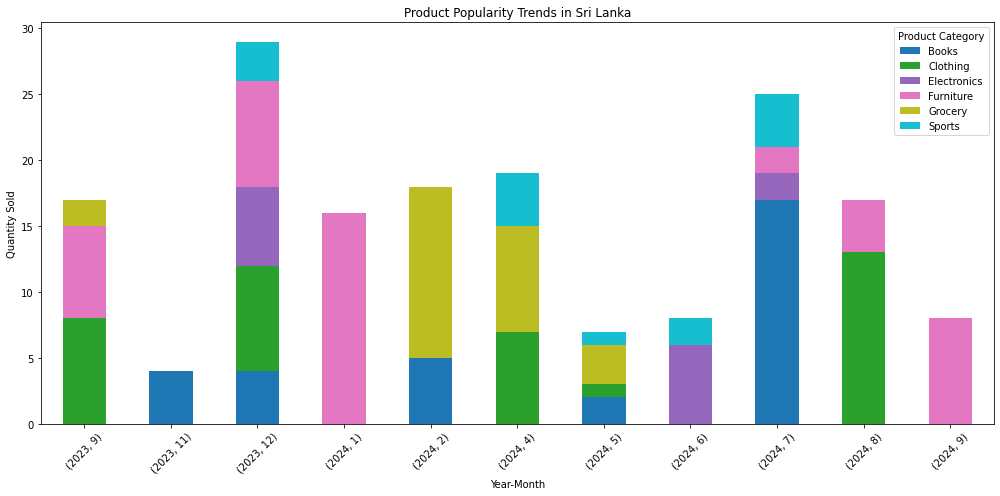

<Figure size 1008x504 with 0 Axes>

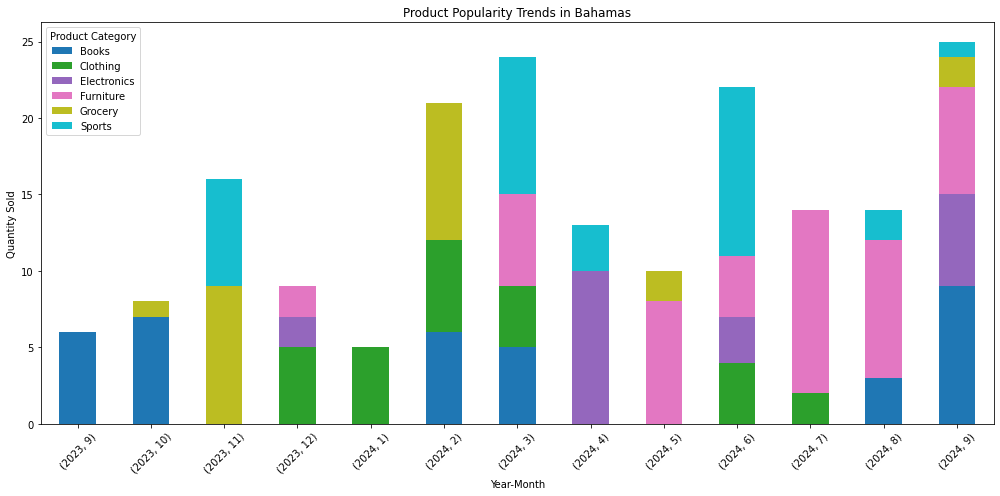

<Figure size 1008x504 with 0 Axes>

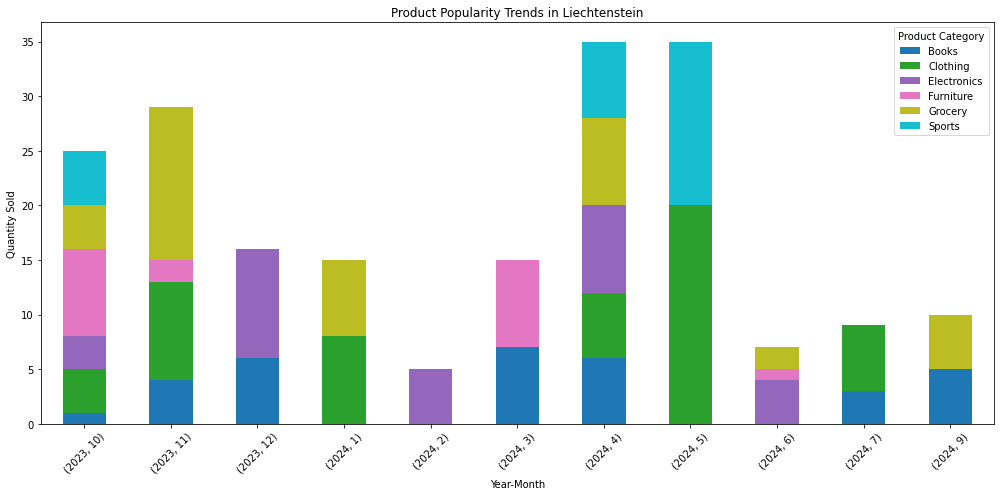

<Figure size 1008x504 with 0 Axes>

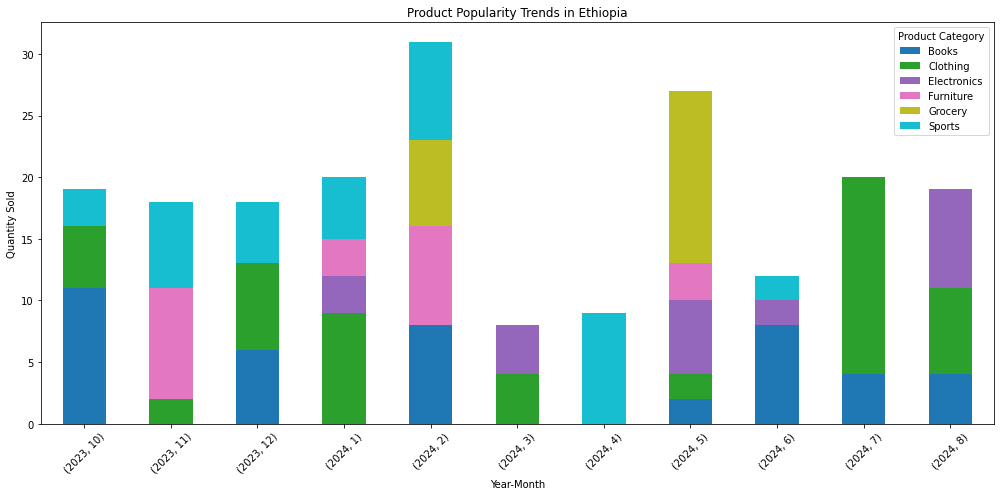

<Figure size 1008x504 with 0 Axes>

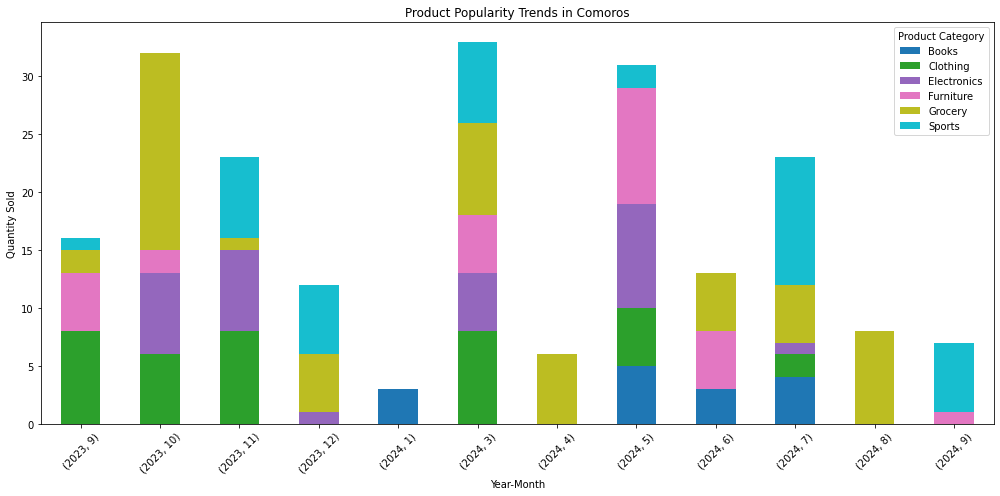

<Figure size 1008x504 with 0 Axes>

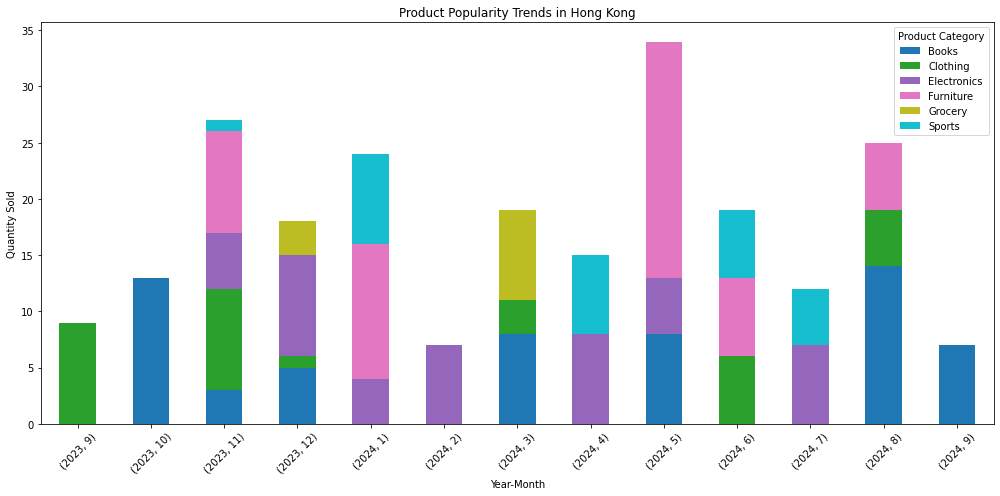

<Figure size 1008x504 with 0 Axes>

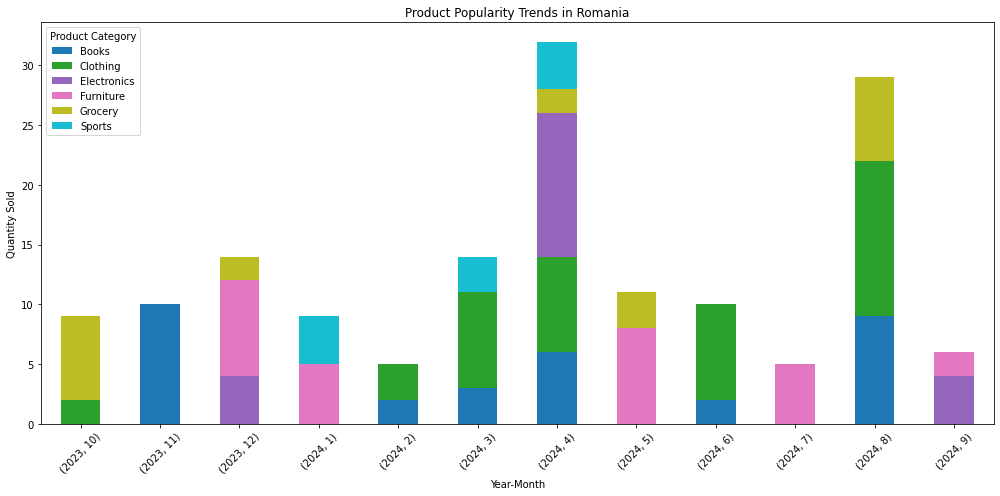

<Figure size 1008x504 with 0 Axes>

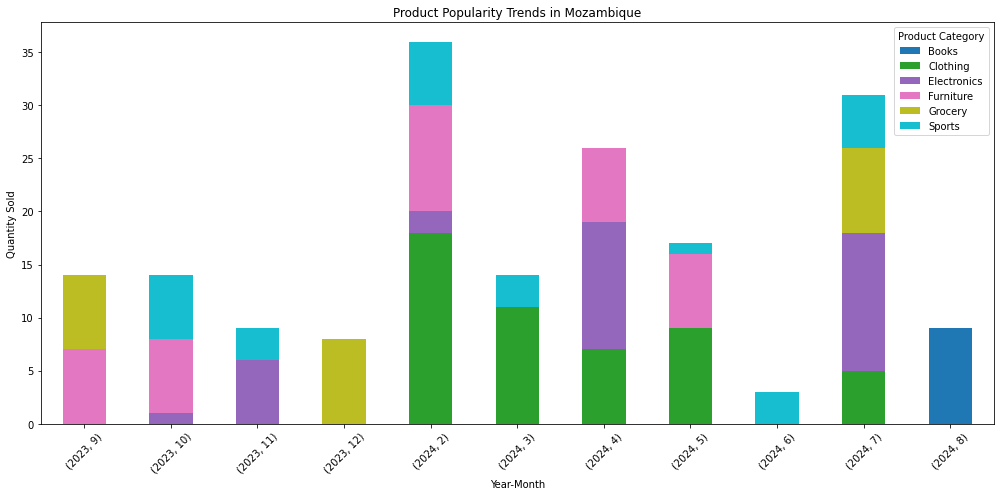

<Figure size 1008x504 with 0 Axes>

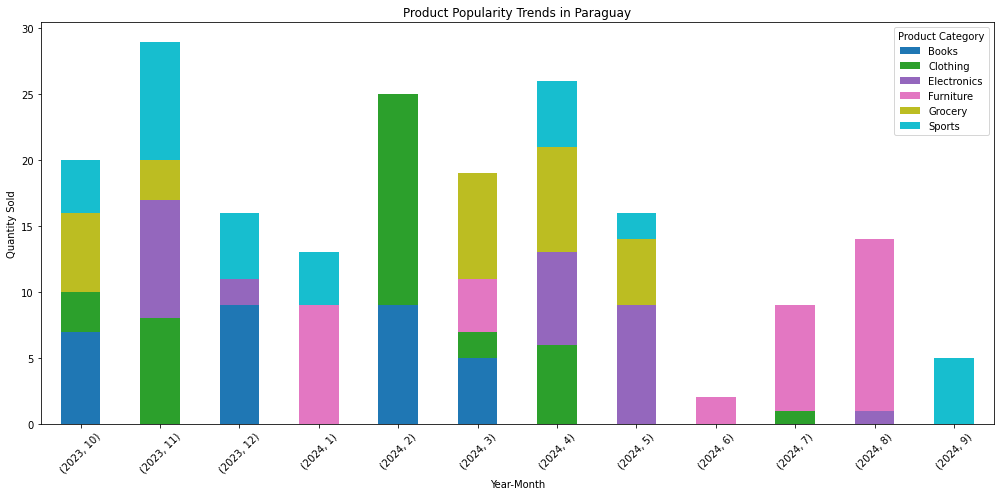

<Figure size 1008x504 with 0 Axes>

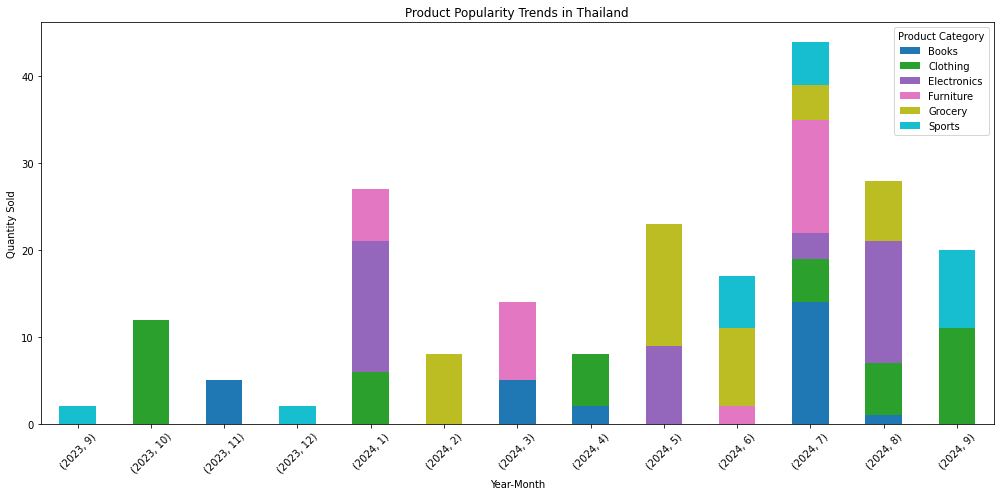

<Figure size 1008x504 with 0 Axes>

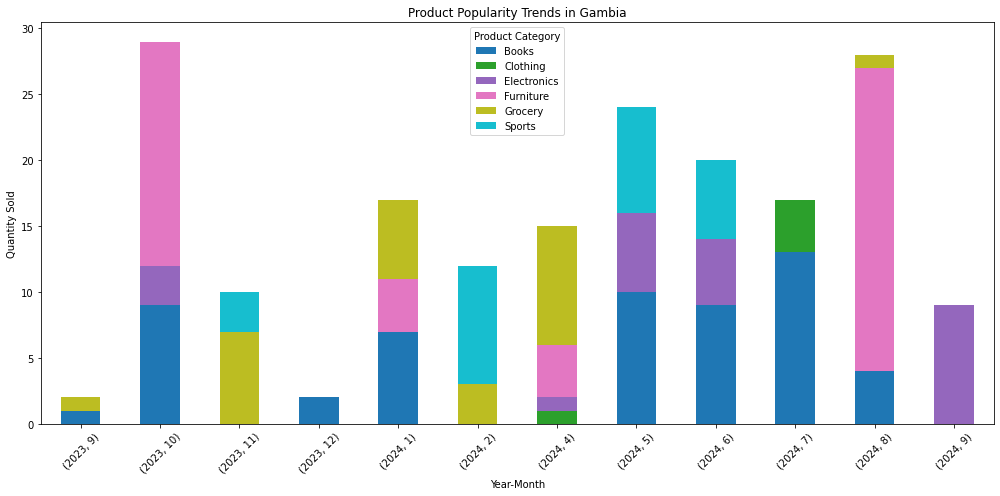

<Figure size 1008x504 with 0 Axes>

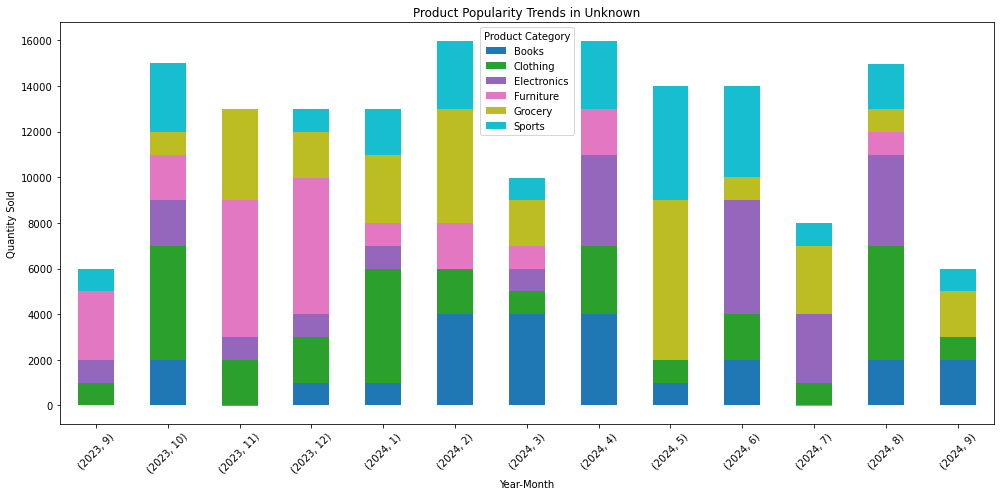

<Figure size 1008x504 with 0 Axes>

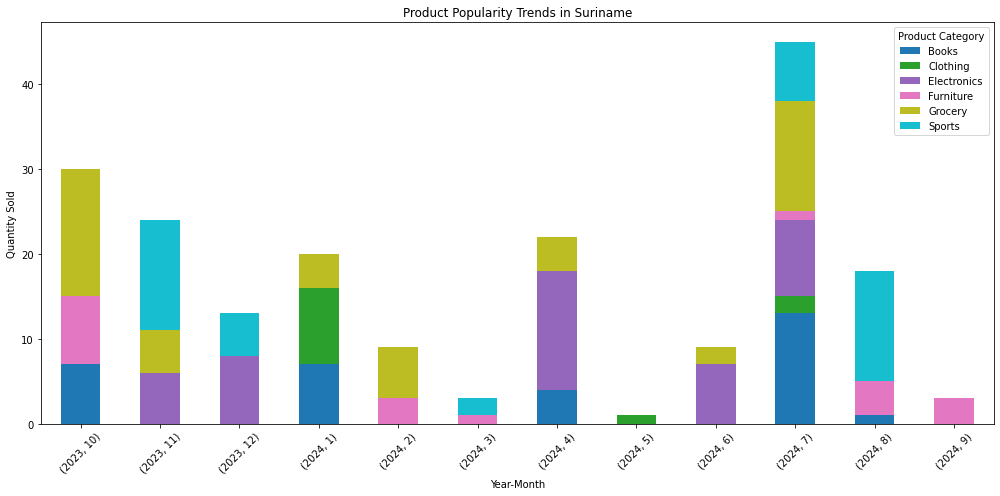

<Figure size 1008x504 with 0 Axes>

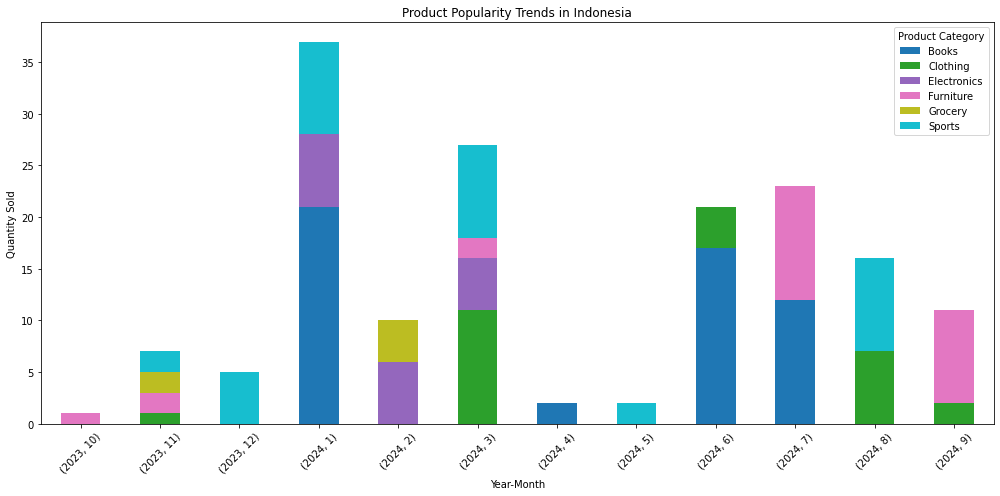

<Figure size 1008x504 with 0 Axes>

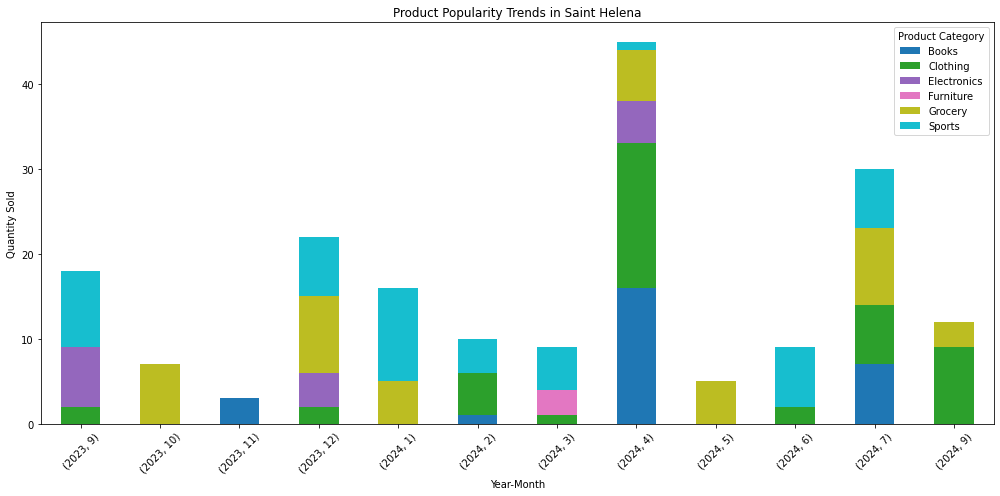

<Figure size 1008x504 with 0 Axes>

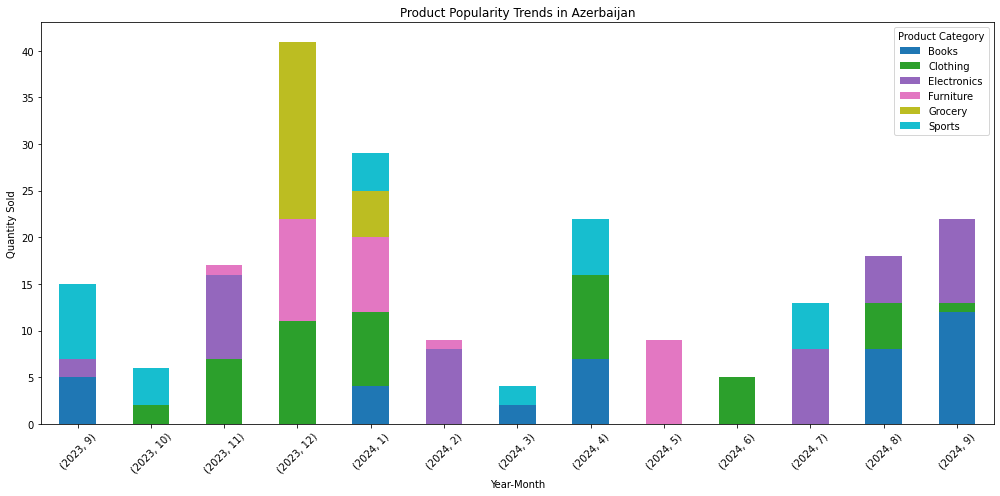

<Figure size 1008x504 with 0 Axes>

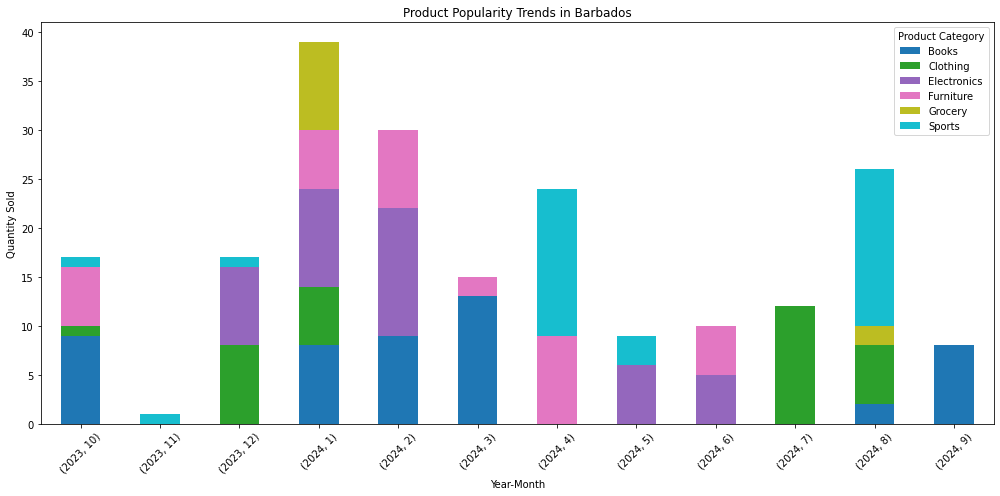

<Figure size 1008x504 with 0 Axes>

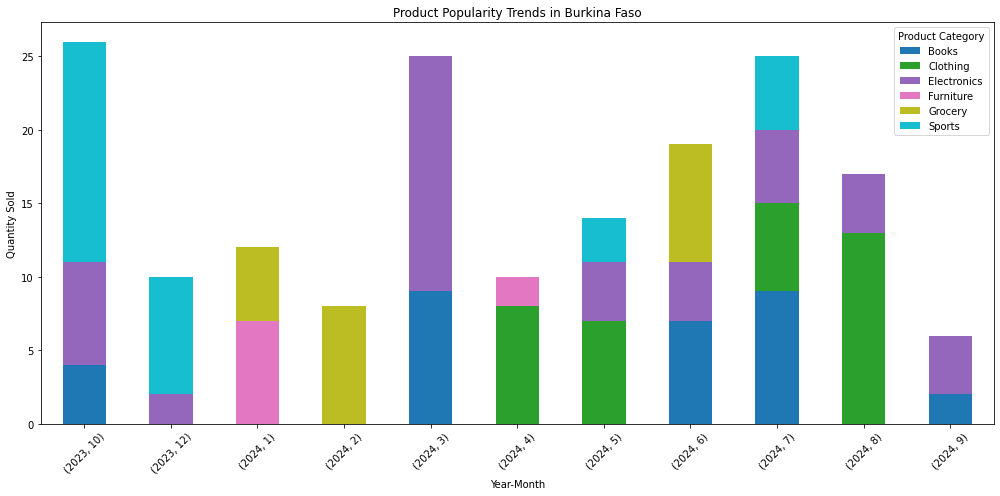

<Figure size 1008x504 with 0 Axes>

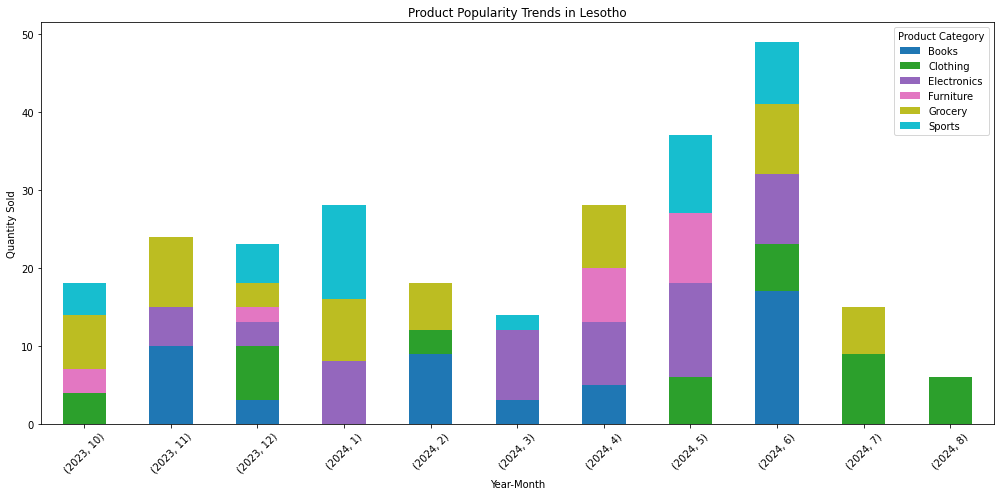

<Figure size 1008x504 with 0 Axes>

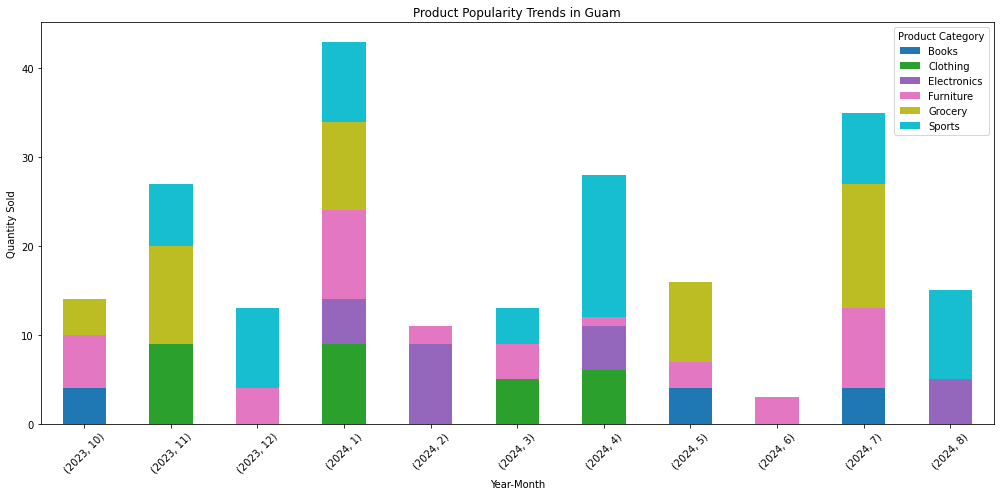

<Figure size 1008x504 with 0 Axes>

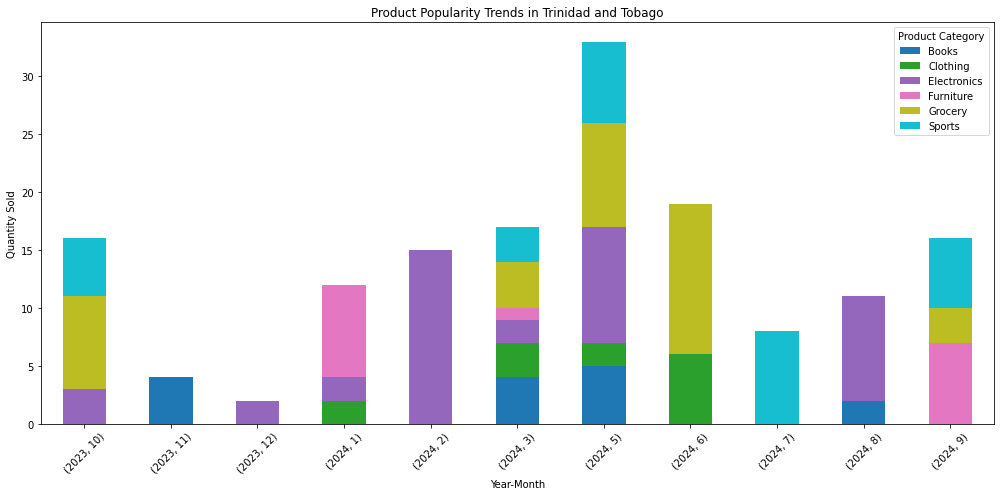

<Figure size 1008x504 with 0 Axes>

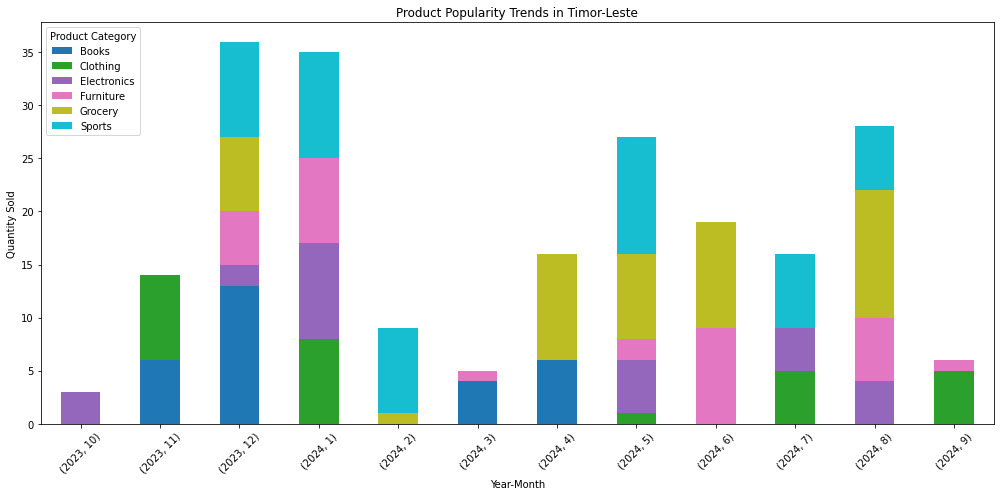

<Figure size 1008x504 with 0 Axes>

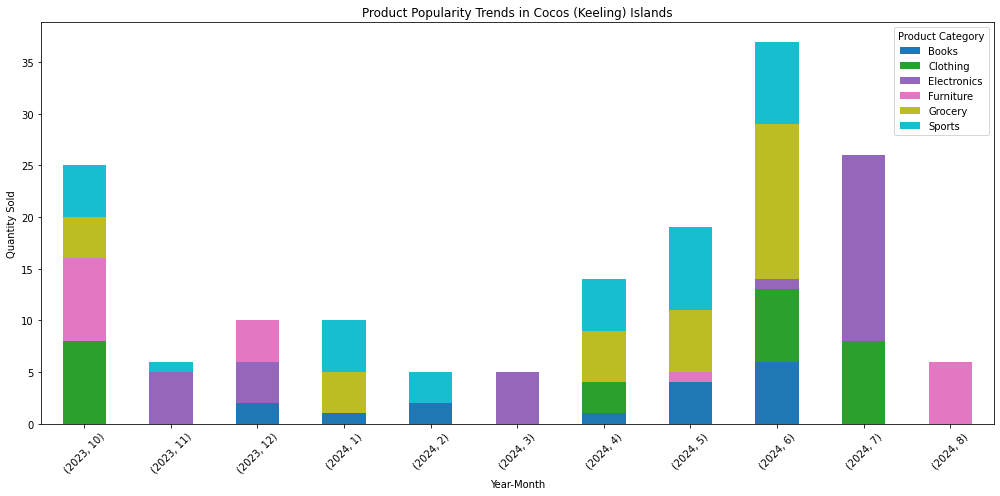

<Figure size 1008x504 with 0 Axes>

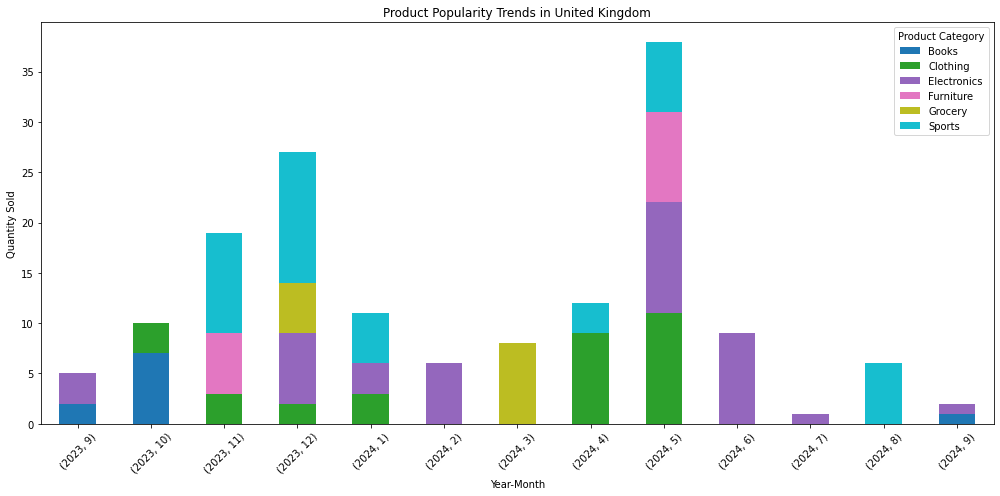

<Figure size 1008x504 with 0 Axes>

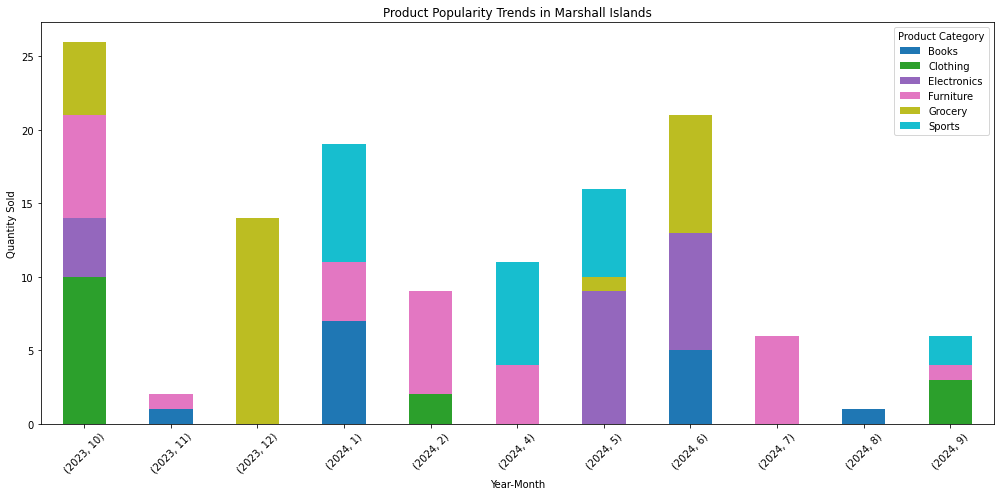

<Figure size 1008x504 with 0 Axes>

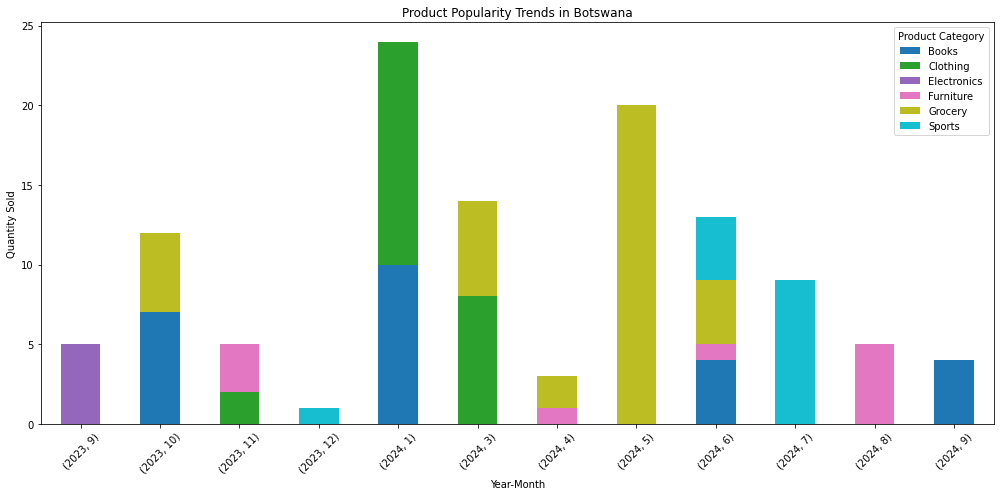

<Figure size 1008x504 with 0 Axes>

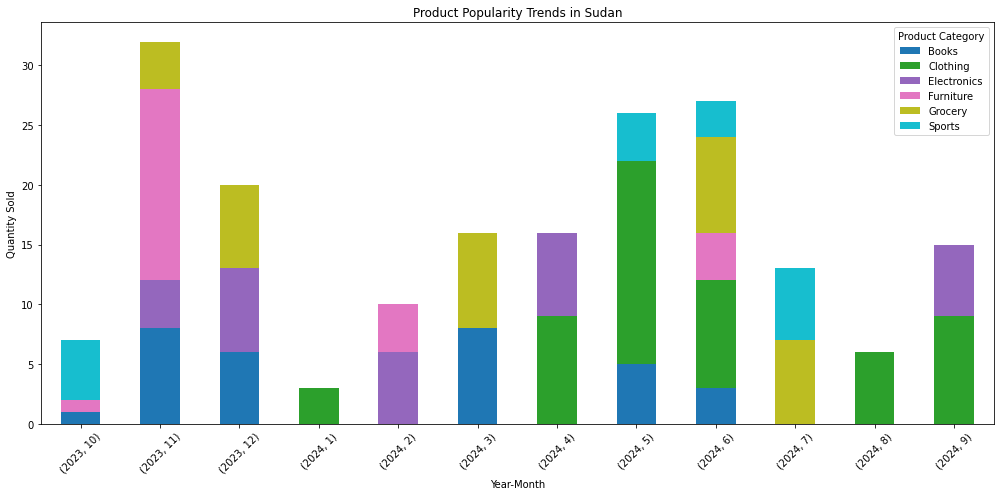

<Figure size 1008x504 with 0 Axes>

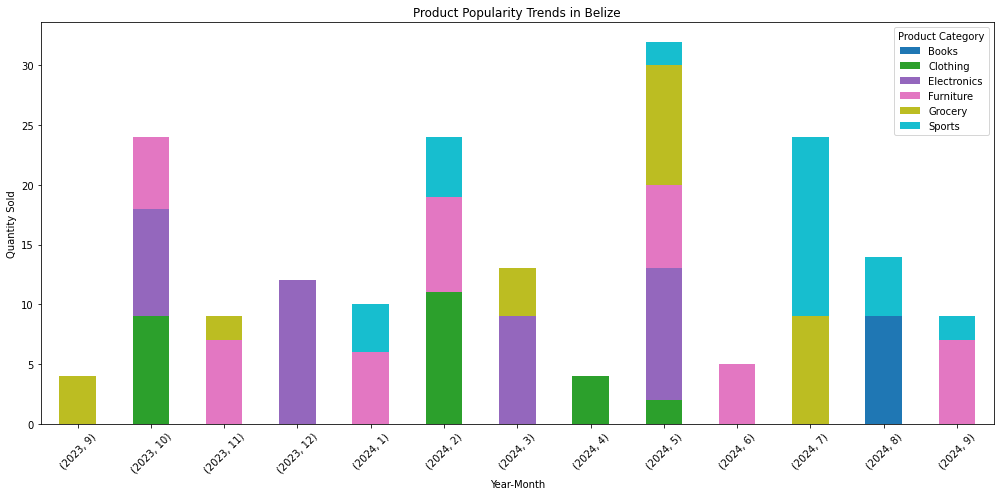

<Figure size 1008x504 with 0 Axes>

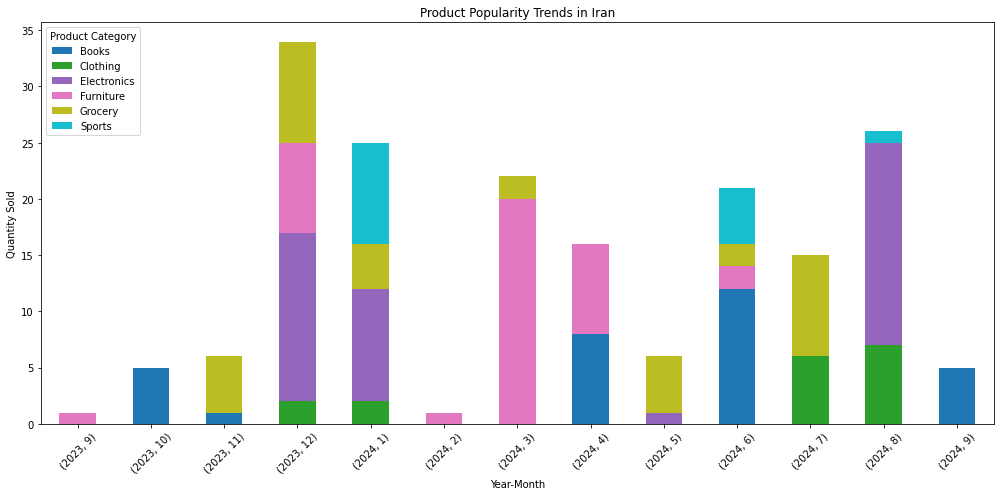

<Figure size 1008x504 with 0 Axes>

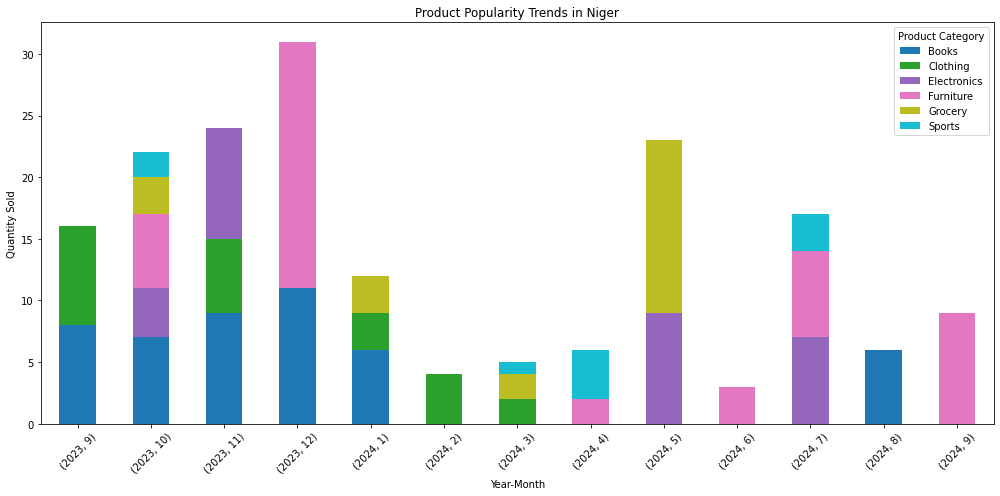

<Figure size 1008x504 with 0 Axes>

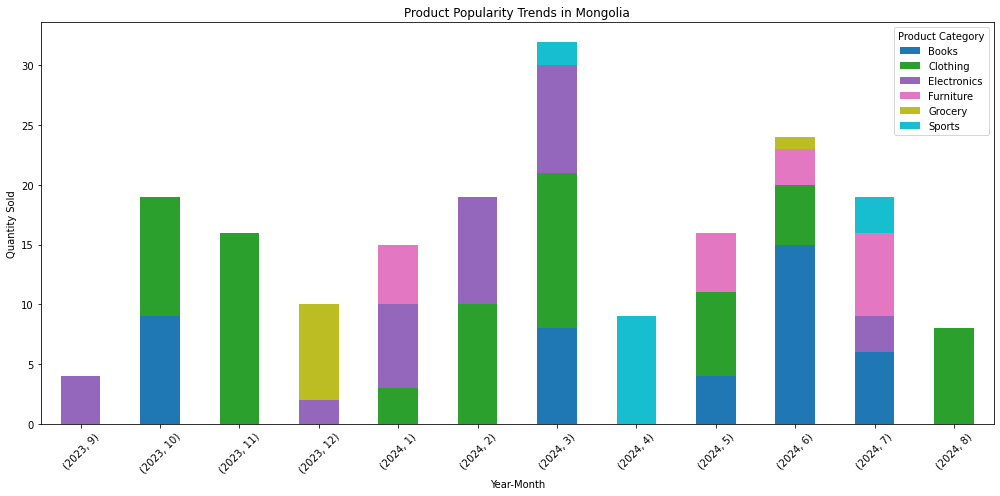

<Figure size 1008x504 with 0 Axes>

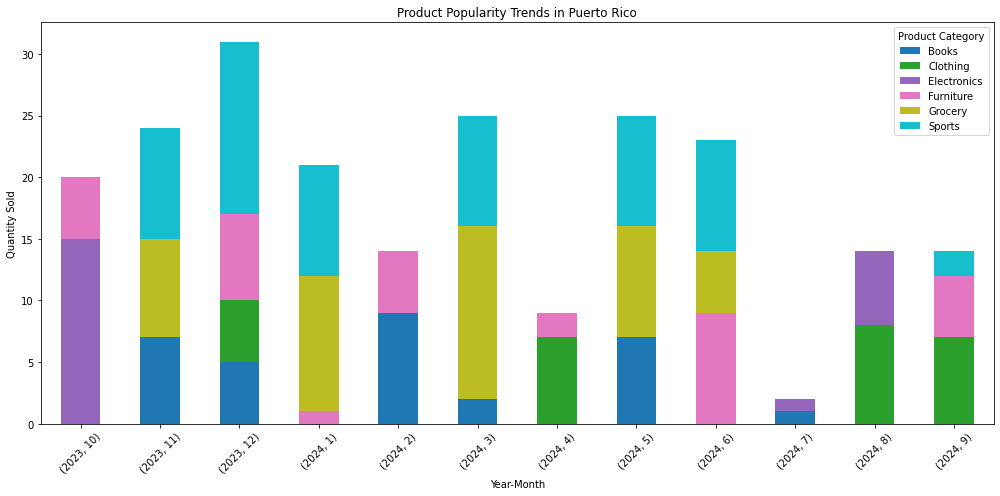

<Figure size 1008x504 with 0 Axes>

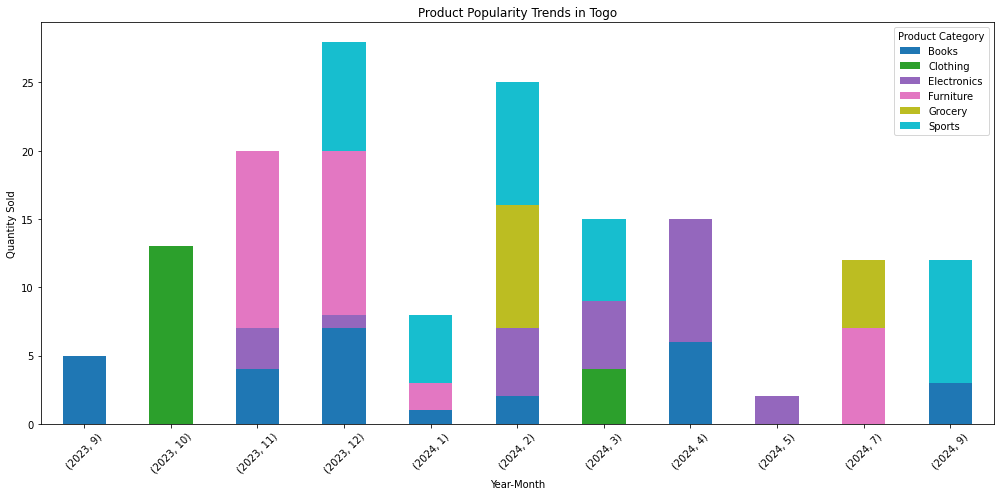

<Figure size 1008x504 with 0 Axes>

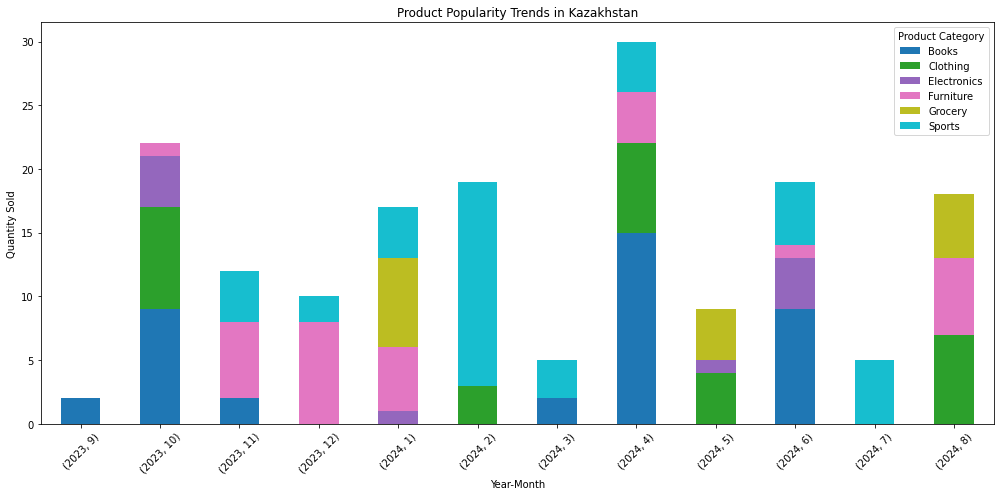

<Figure size 1008x504 with 0 Axes>

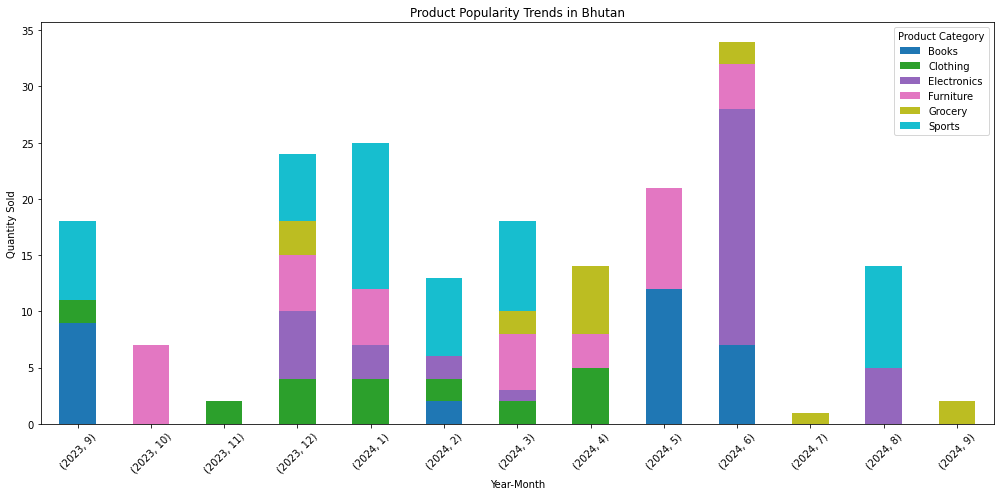

<Figure size 1008x504 with 0 Axes>

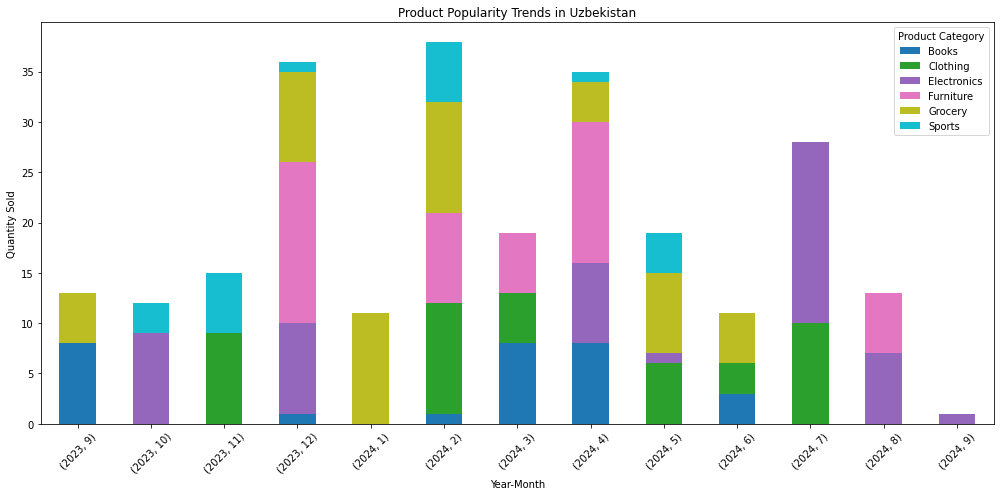

<Figure size 1008x504 with 0 Axes>

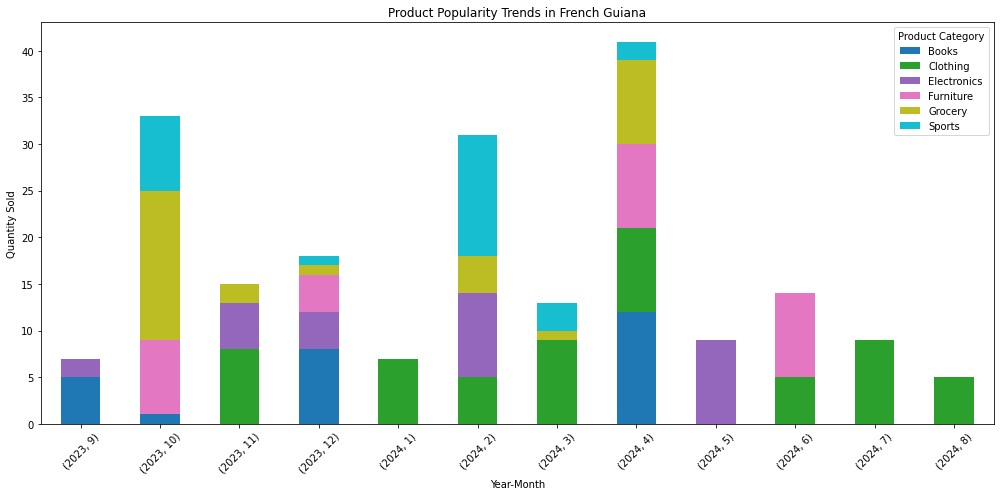

<Figure size 1008x504 with 0 Axes>

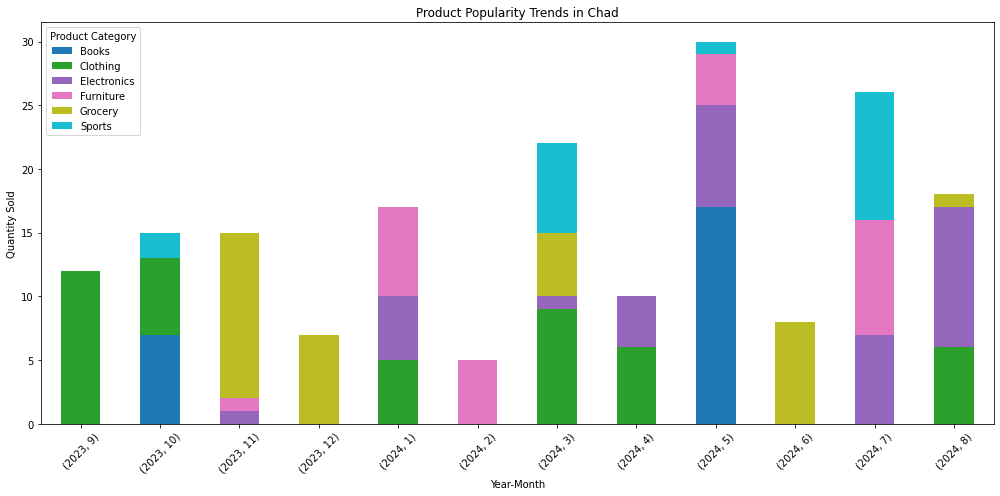

<Figure size 1008x504 with 0 Axes>

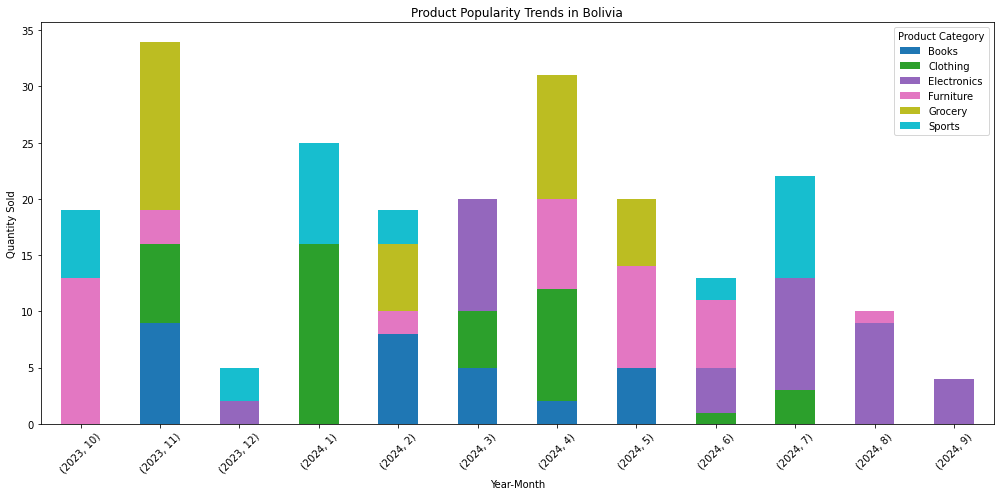

<Figure size 1008x504 with 0 Axes>

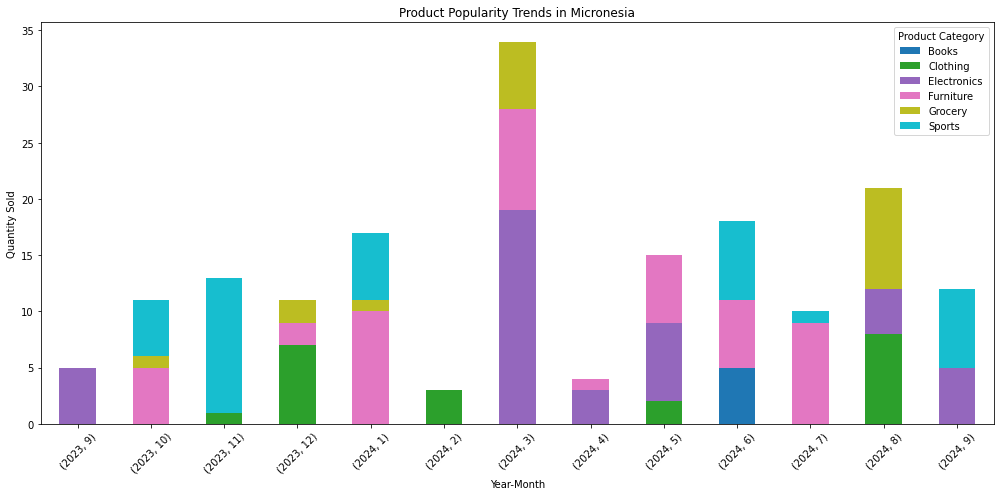

<Figure size 1008x504 with 0 Axes>

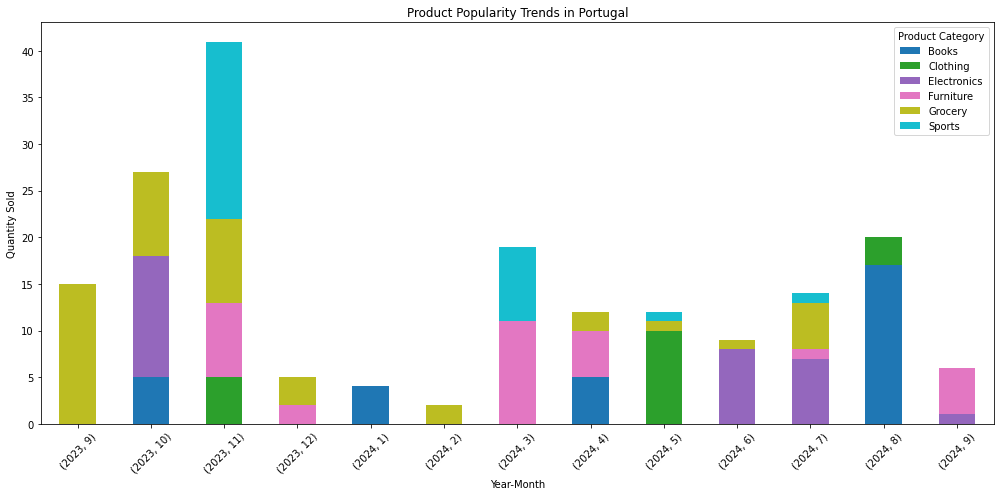

<Figure size 1008x504 with 0 Axes>

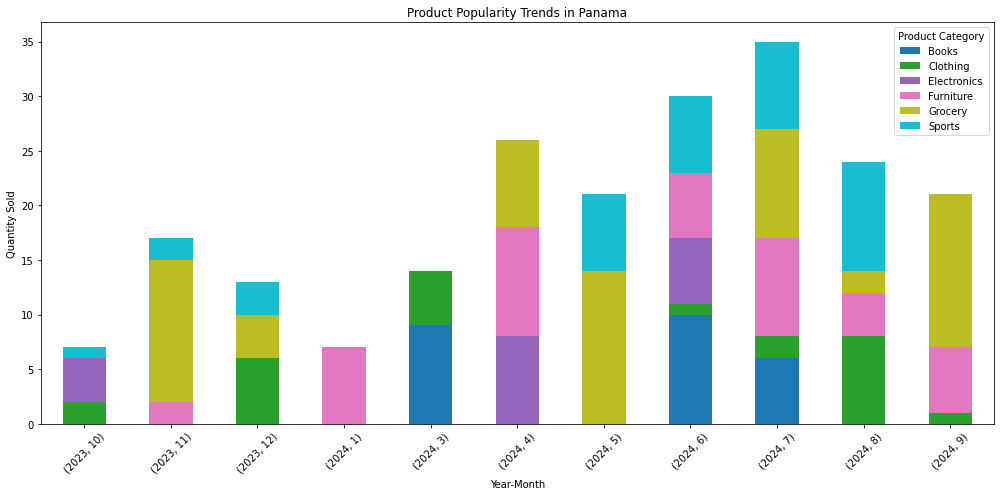

<Figure size 1008x504 with 0 Axes>

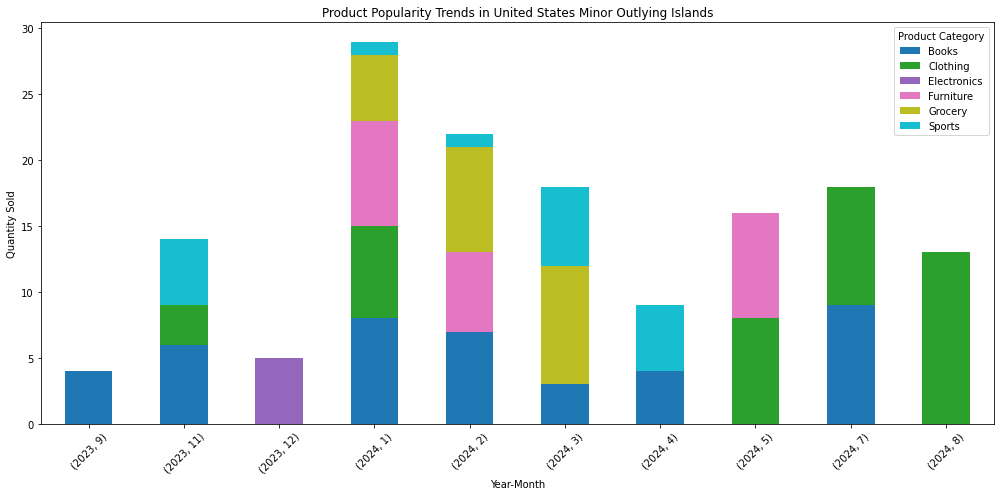

<Figure size 1008x504 with 0 Axes>

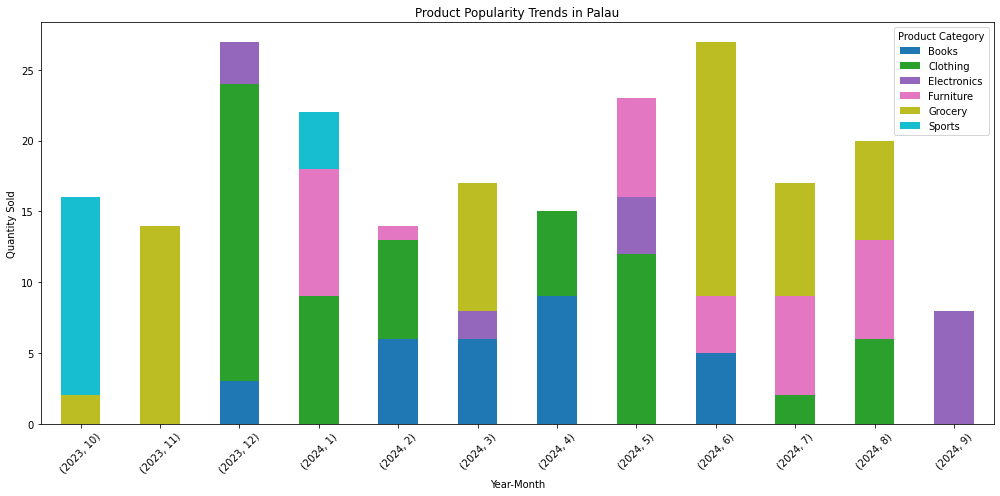

<Figure size 1008x504 with 0 Axes>

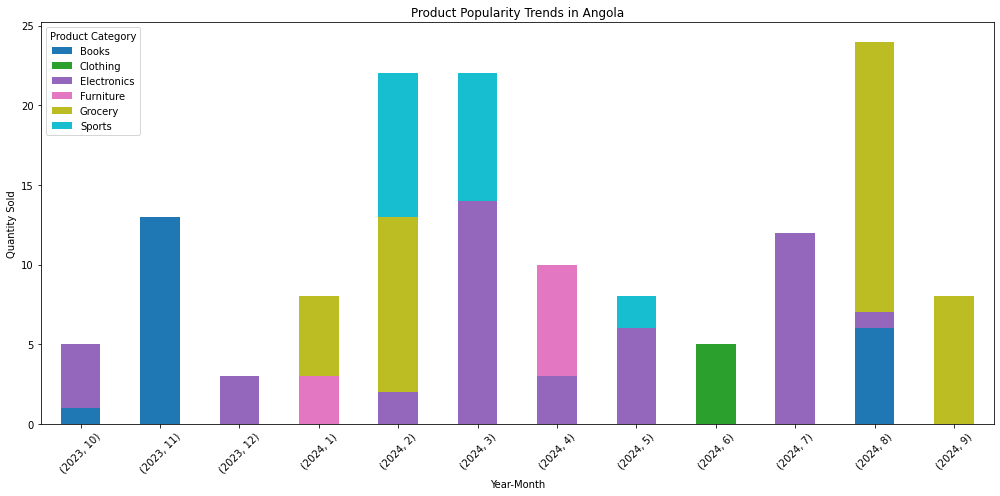

<Figure size 1008x504 with 0 Axes>

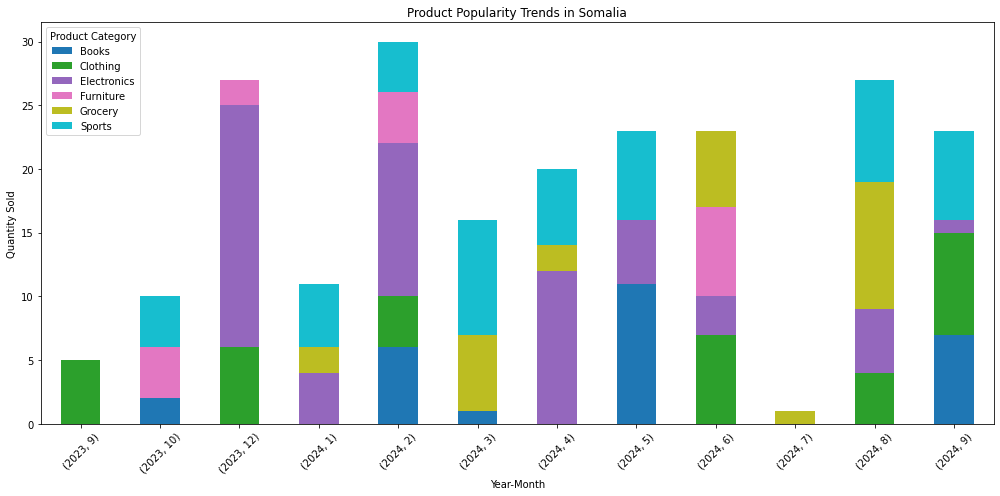

<Figure size 1008x504 with 0 Axes>

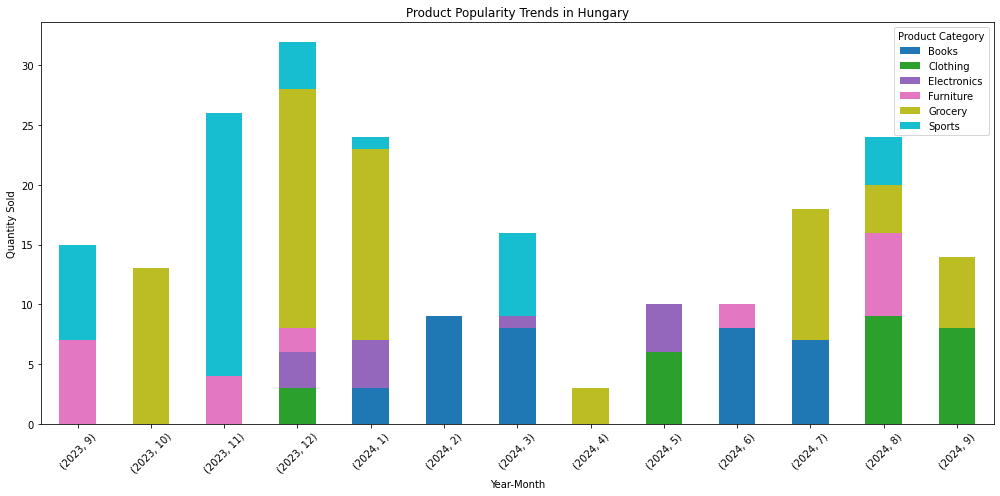

<Figure size 1008x504 with 0 Axes>

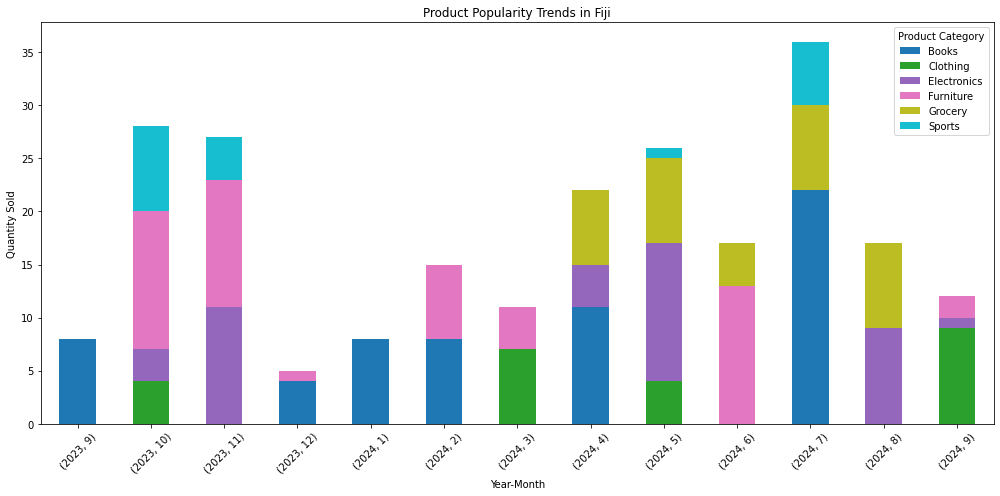

<Figure size 1008x504 with 0 Axes>

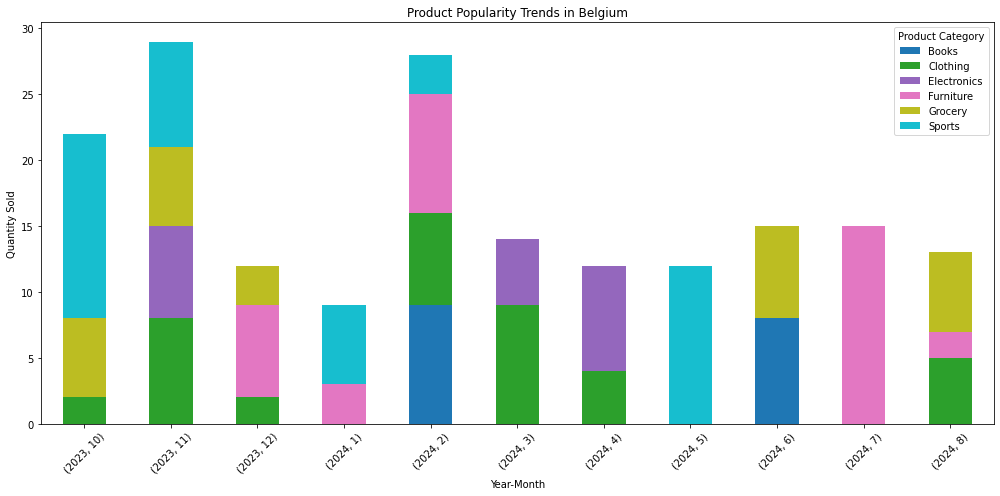

<Figure size 1008x504 with 0 Axes>

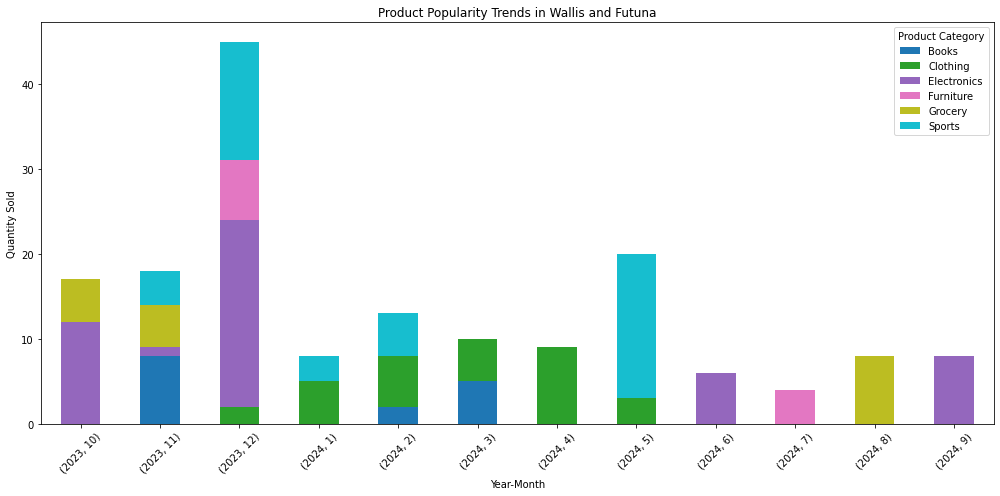

<Figure size 1008x504 with 0 Axes>

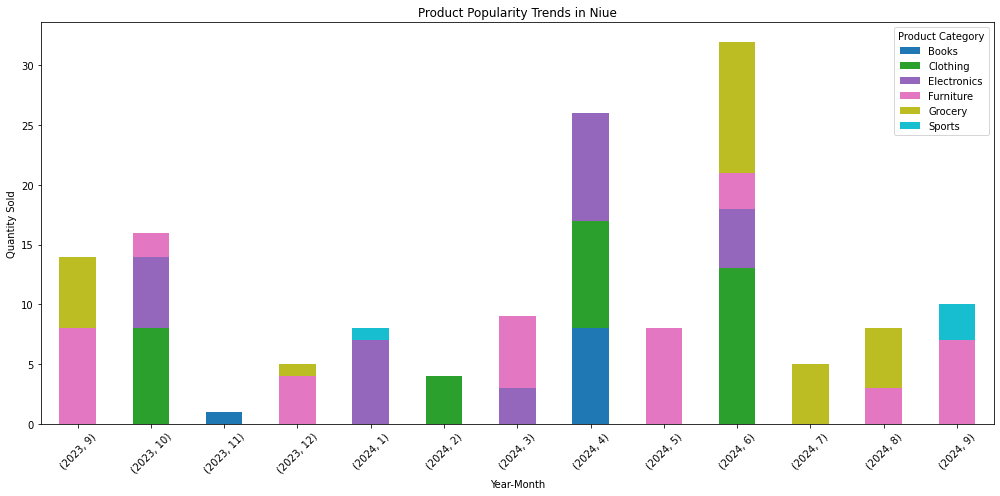

<Figure size 1008x504 with 0 Axes>

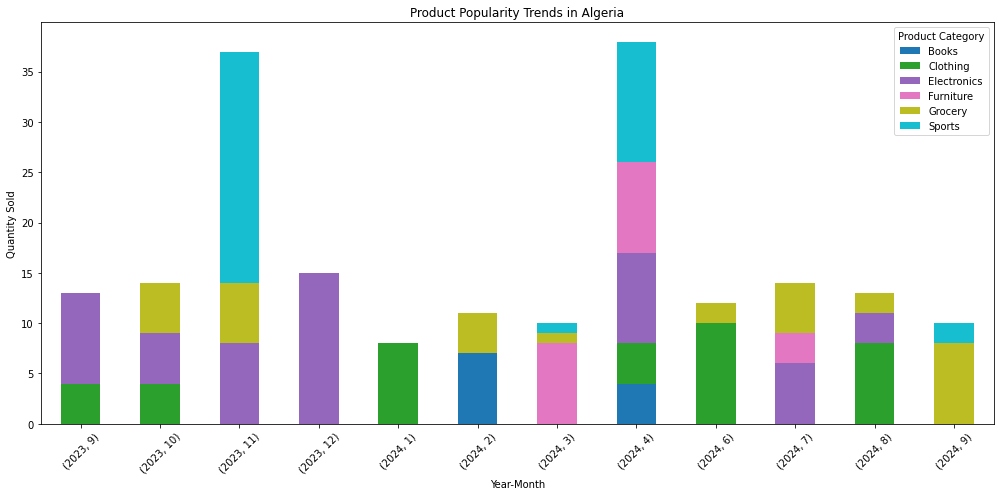

<Figure size 1008x504 with 0 Axes>

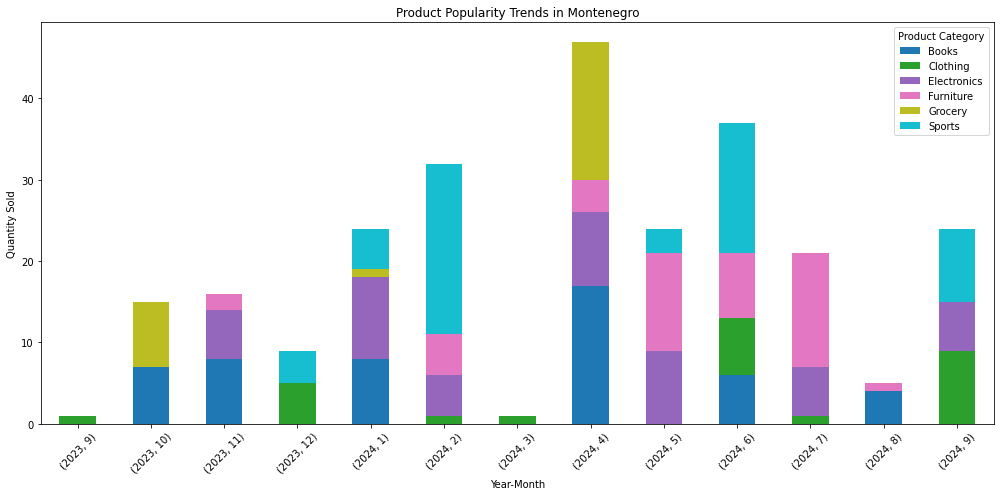

<Figure size 1008x504 with 0 Axes>

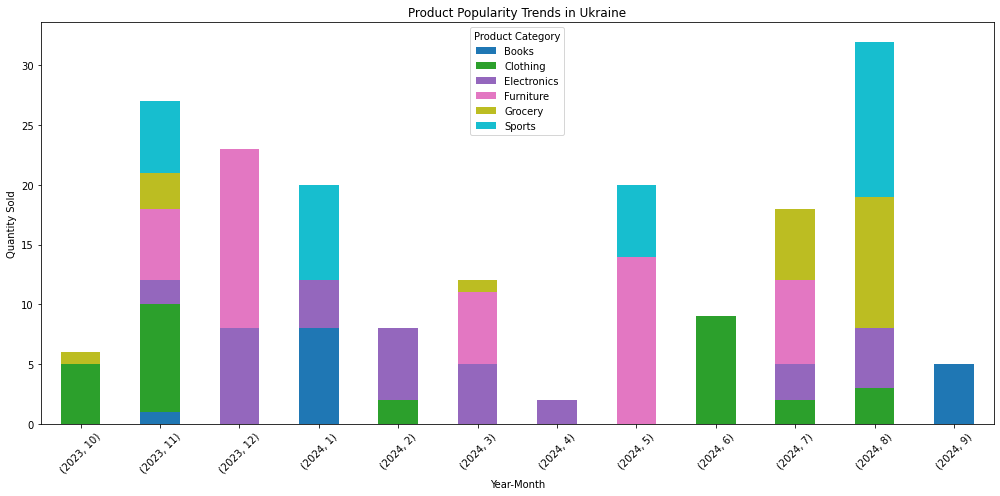

<Figure size 1008x504 with 0 Axes>

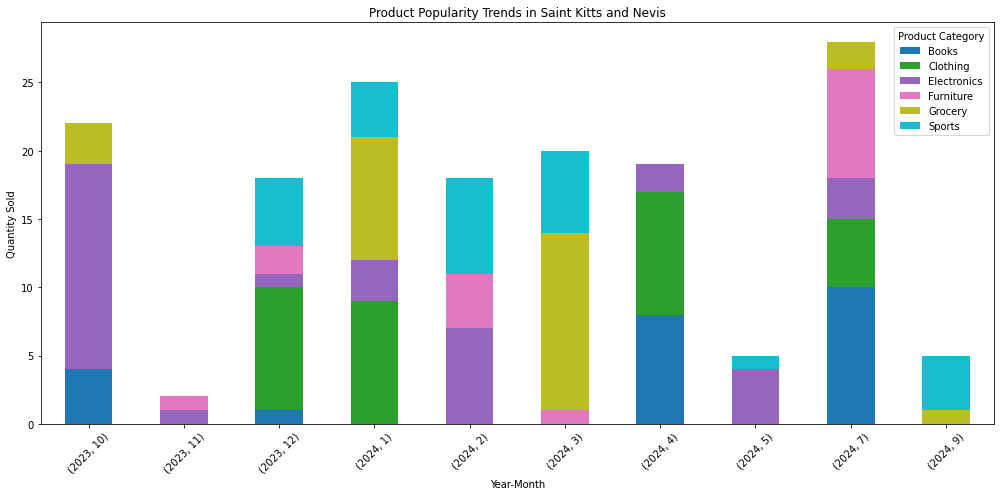

<Figure size 1008x504 with 0 Axes>

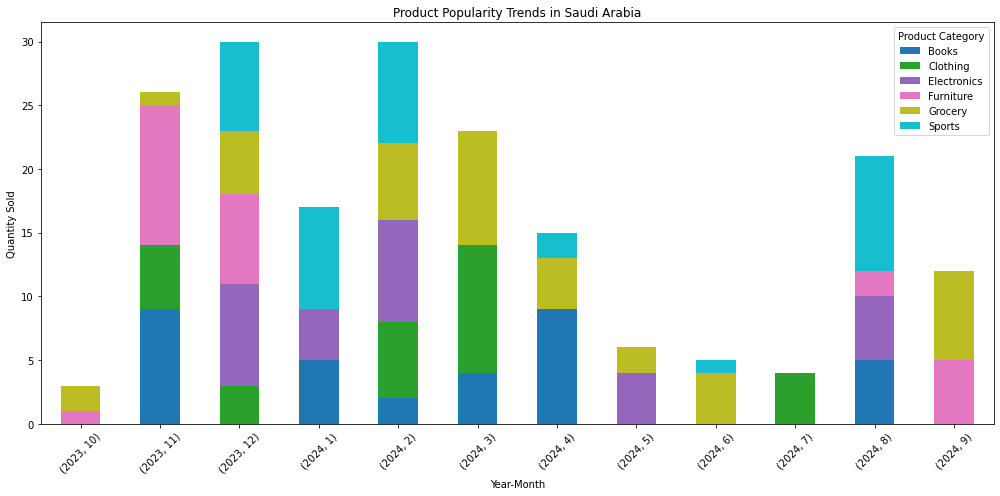

<Figure size 1008x504 with 0 Axes>

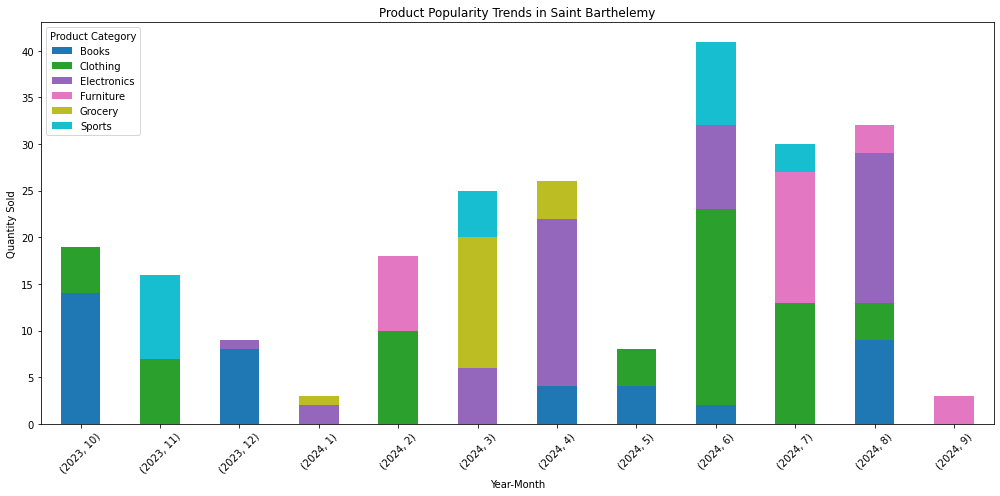

<Figure size 1008x504 with 0 Axes>

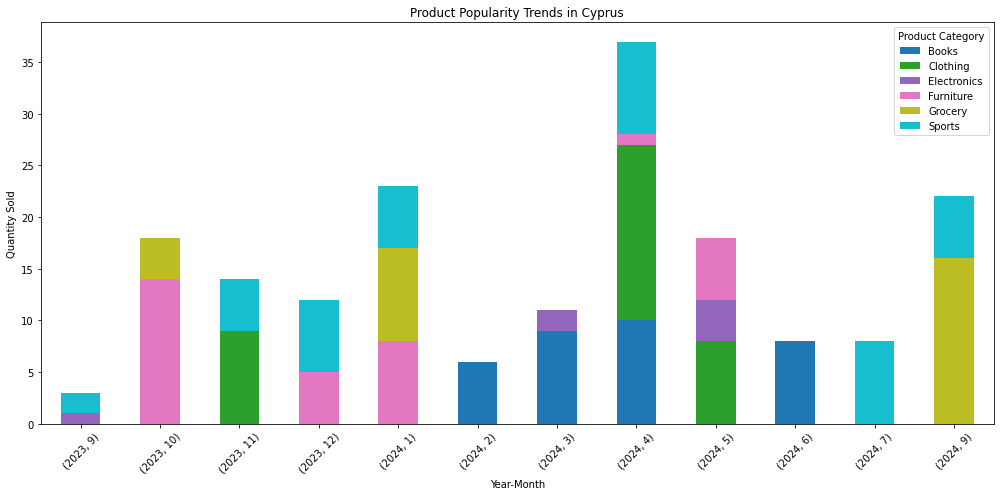

<Figure size 1008x504 with 0 Axes>

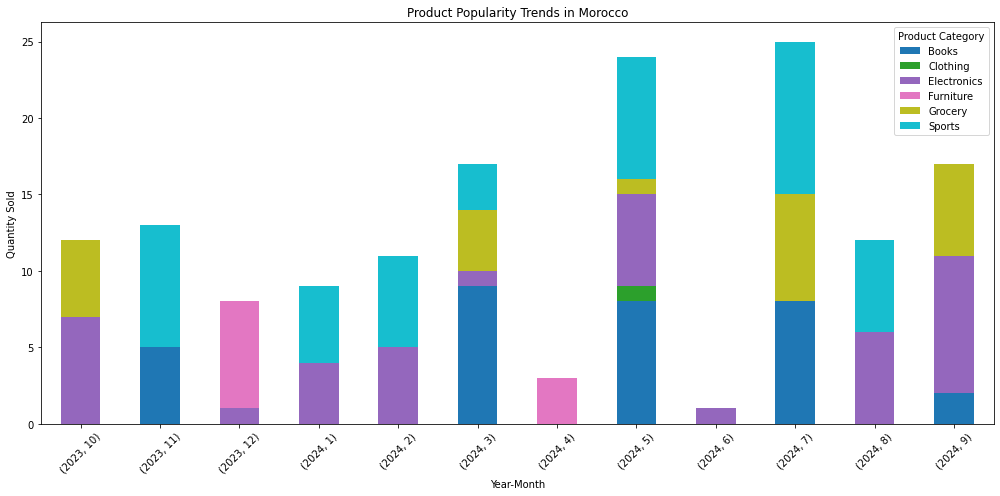

<Figure size 1008x504 with 0 Axes>

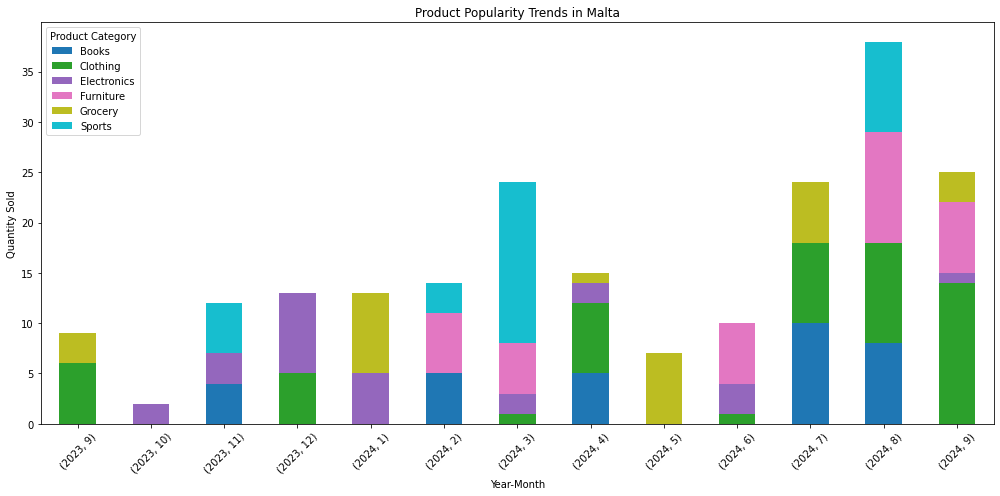

<Figure size 1008x504 with 0 Axes>

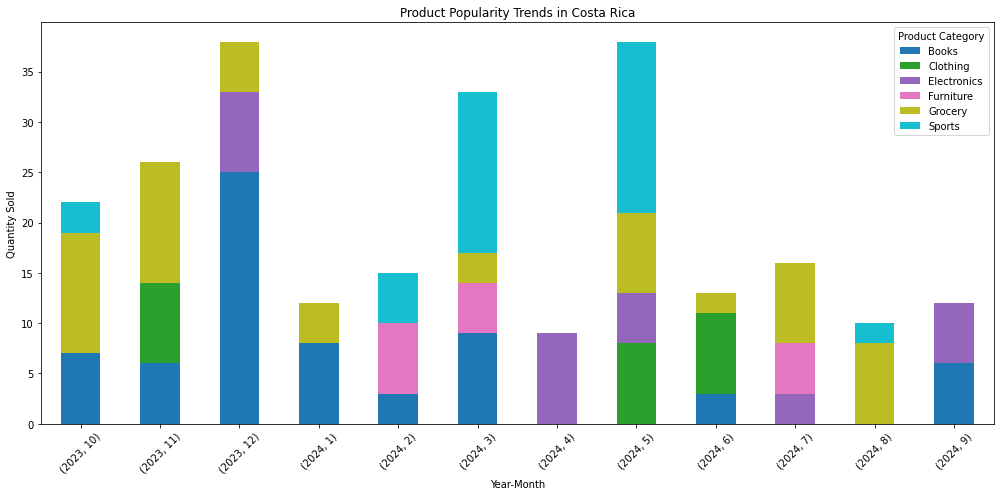

<Figure size 1008x504 with 0 Axes>

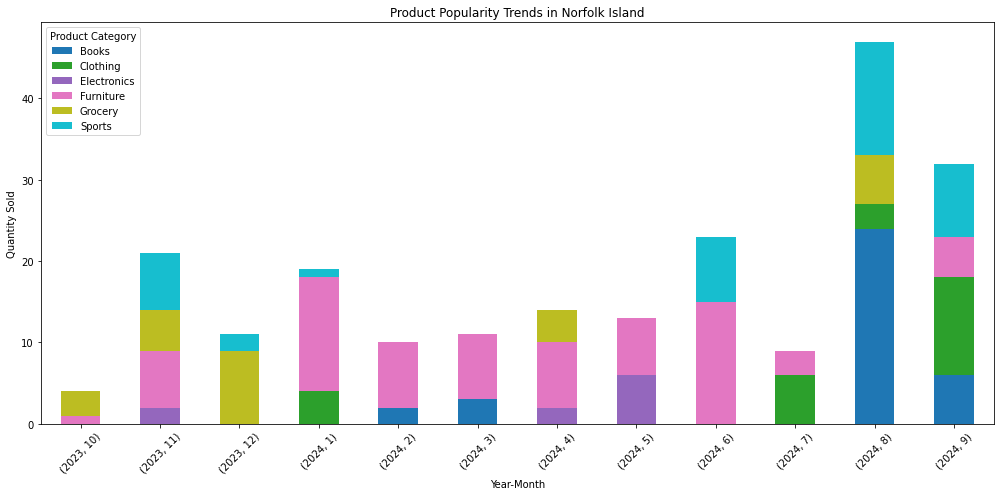

<Figure size 1008x504 with 0 Axes>

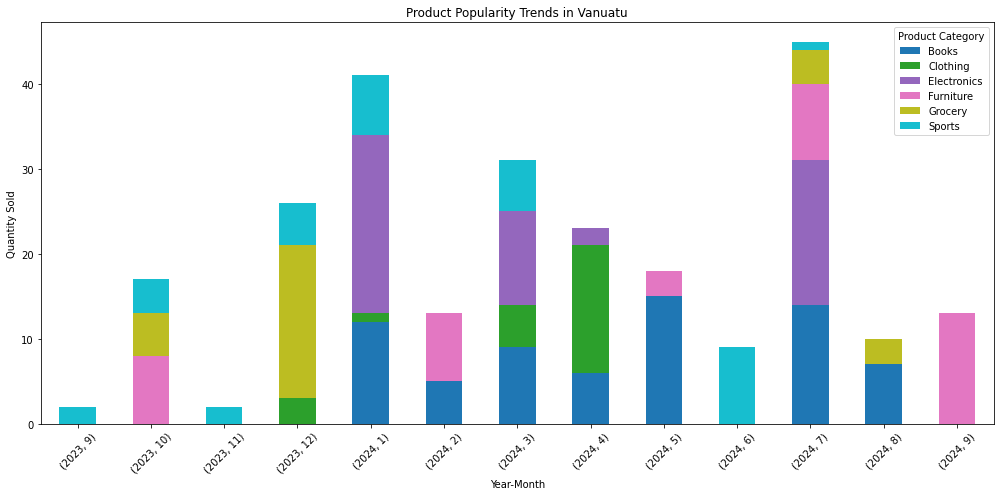

<Figure size 1008x504 with 0 Axes>

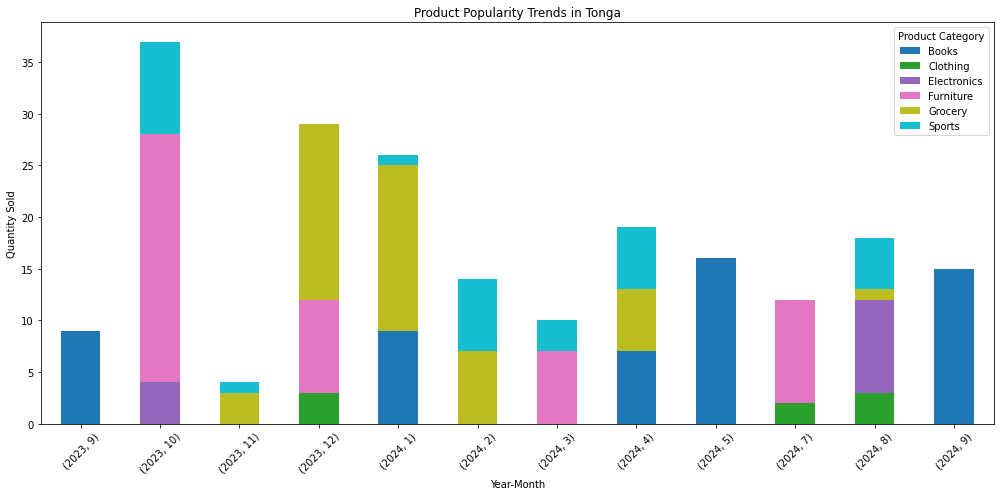

<Figure size 1008x504 with 0 Axes>

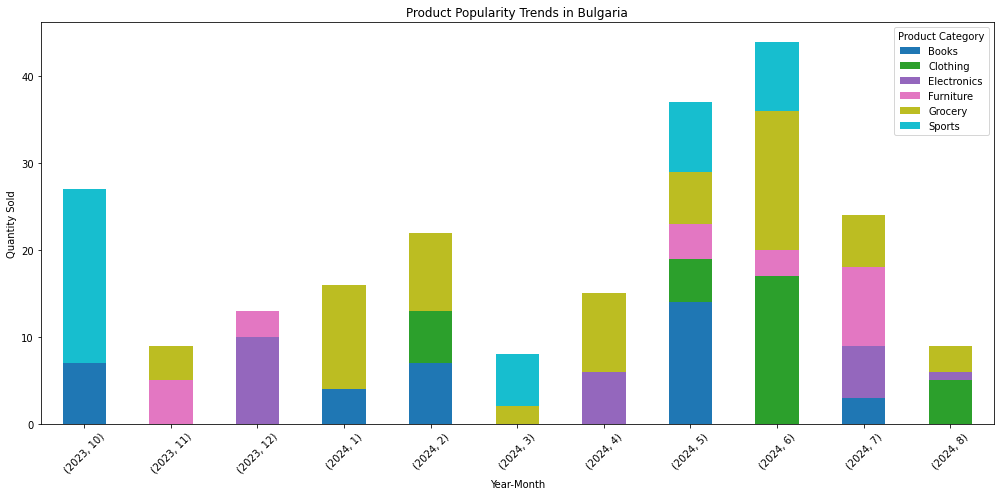

<Figure size 1008x504 with 0 Axes>

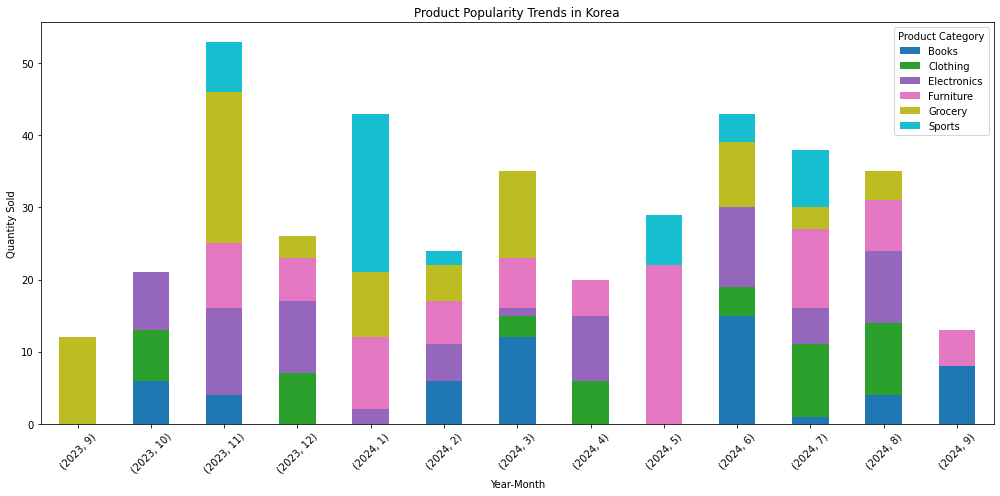

<Figure size 1008x504 with 0 Axes>

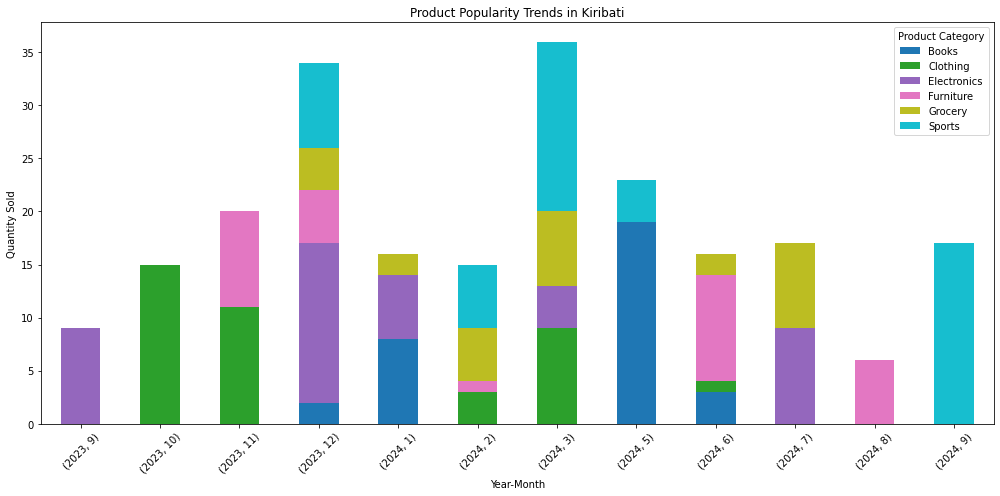

<Figure size 1008x504 with 0 Axes>

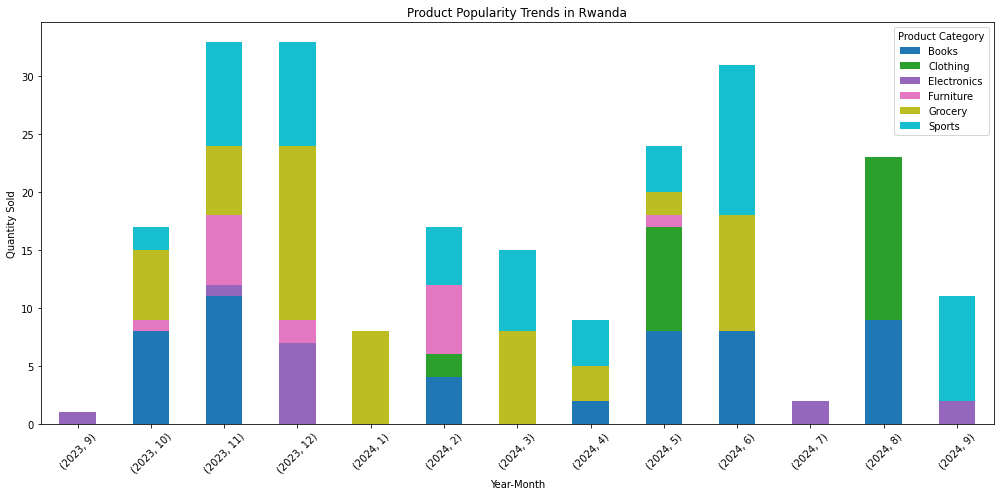

<Figure size 1008x504 with 0 Axes>

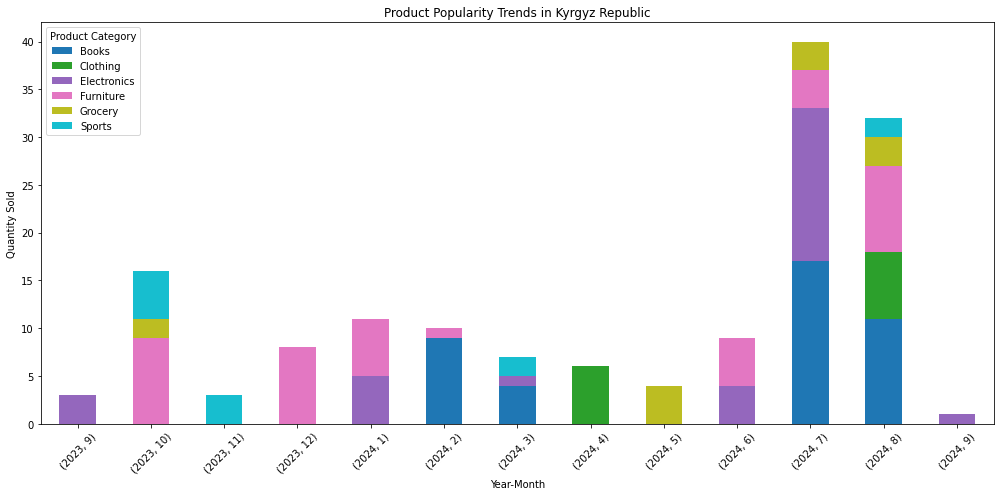

<Figure size 1008x504 with 0 Axes>

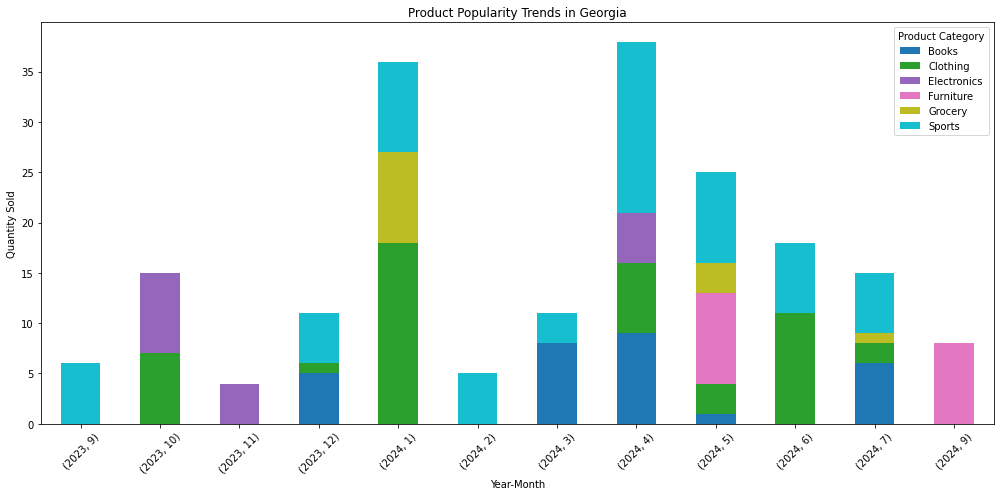

<Figure size 1008x504 with 0 Axes>

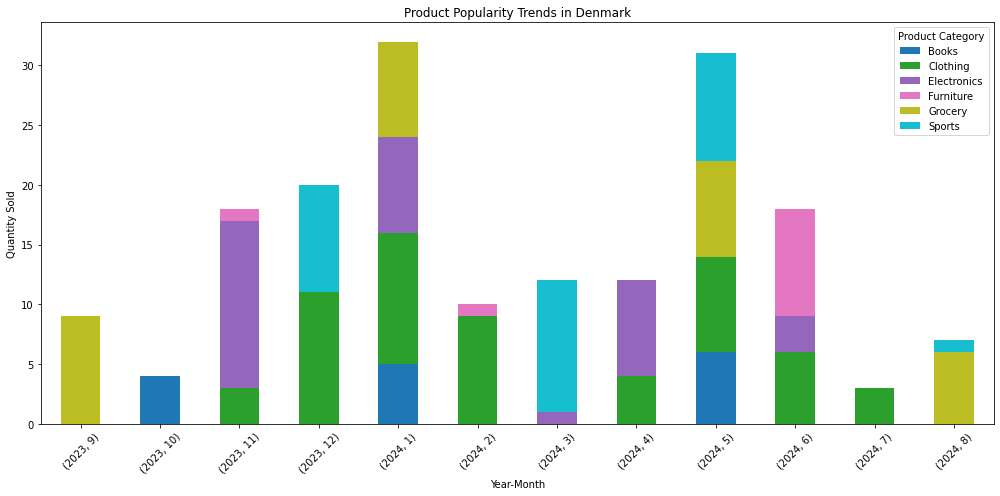

<Figure size 1008x504 with 0 Axes>

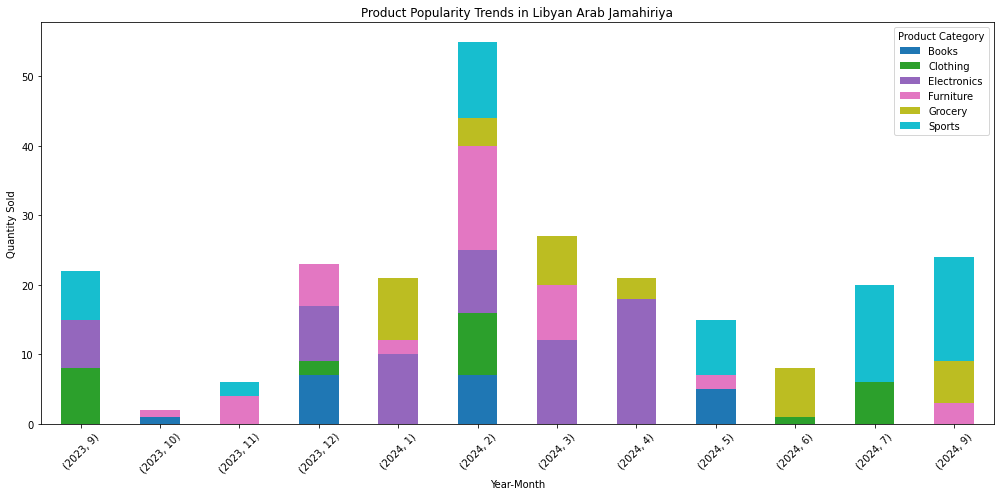

<Figure size 1008x504 with 0 Axes>

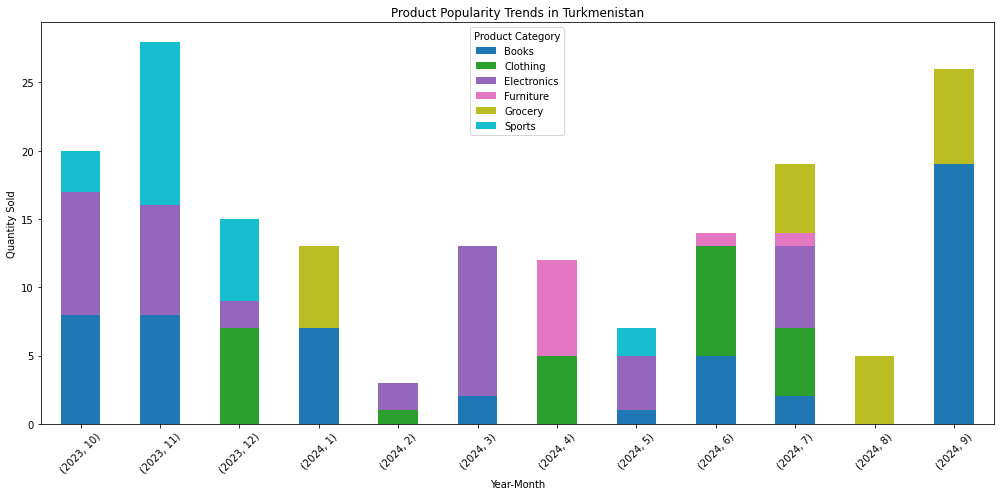

<Figure size 1008x504 with 0 Axes>

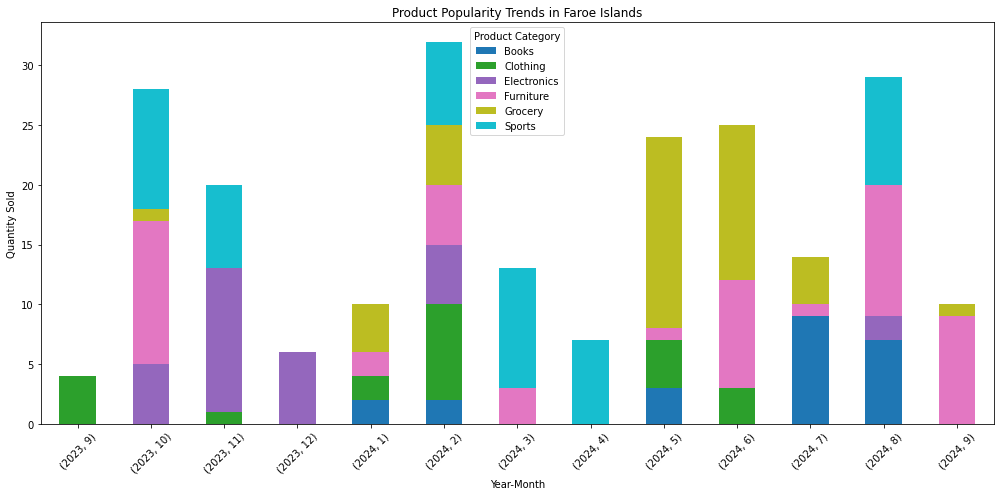

<Figure size 1008x504 with 0 Axes>

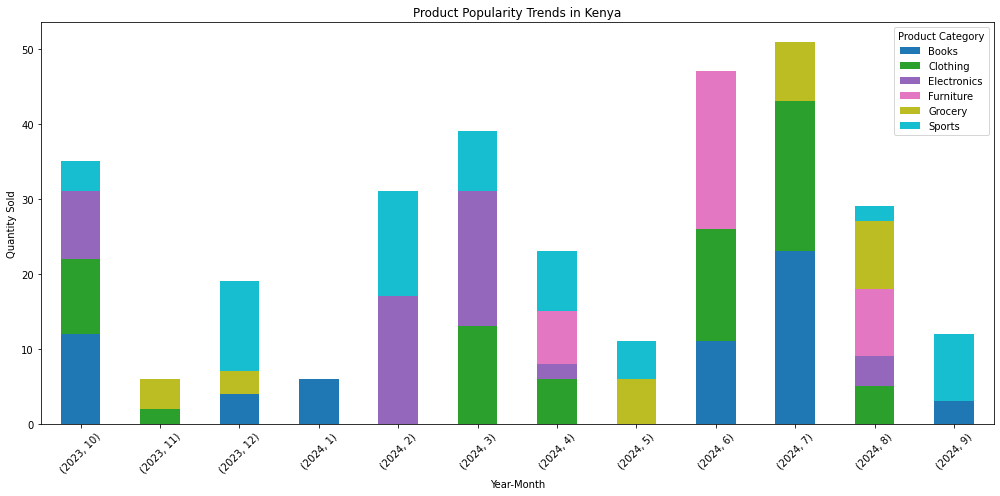

<Figure size 1008x504 with 0 Axes>

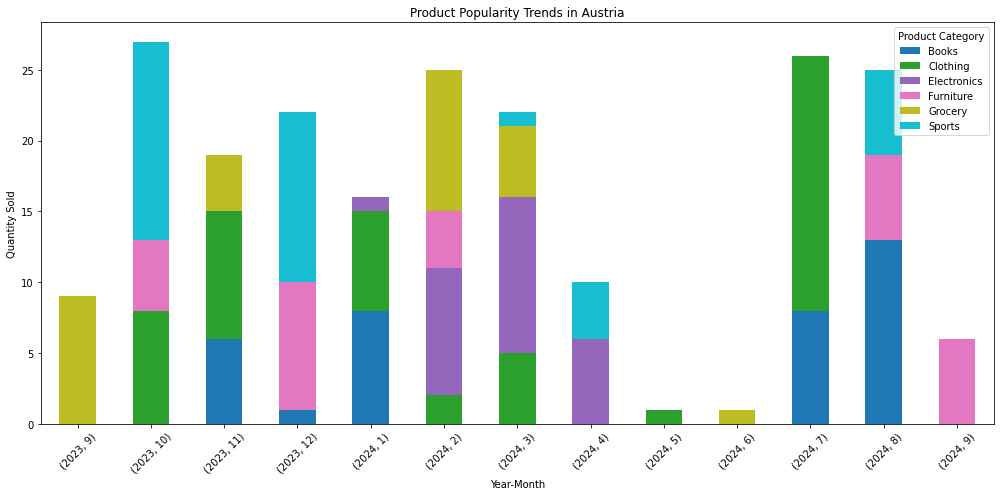

<Figure size 1008x504 with 0 Axes>

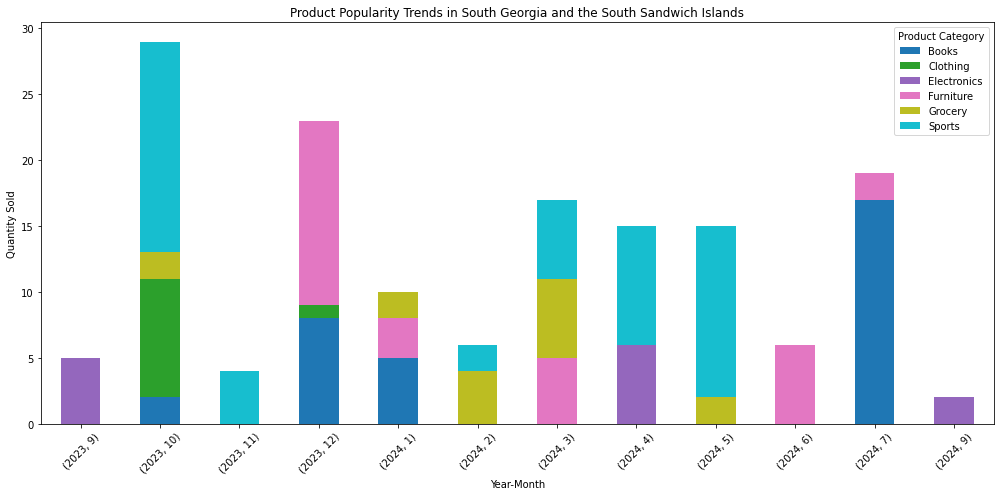

<Figure size 1008x504 with 0 Axes>

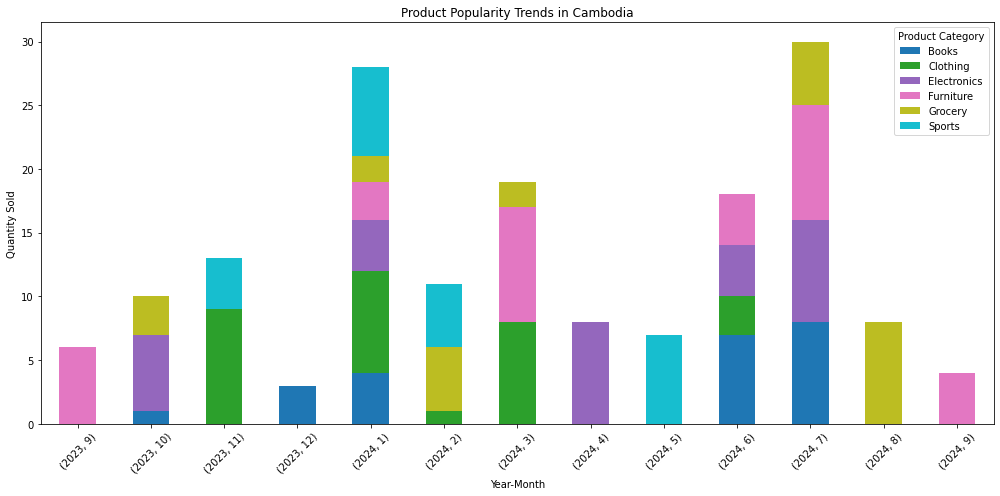

<Figure size 1008x504 with 0 Axes>

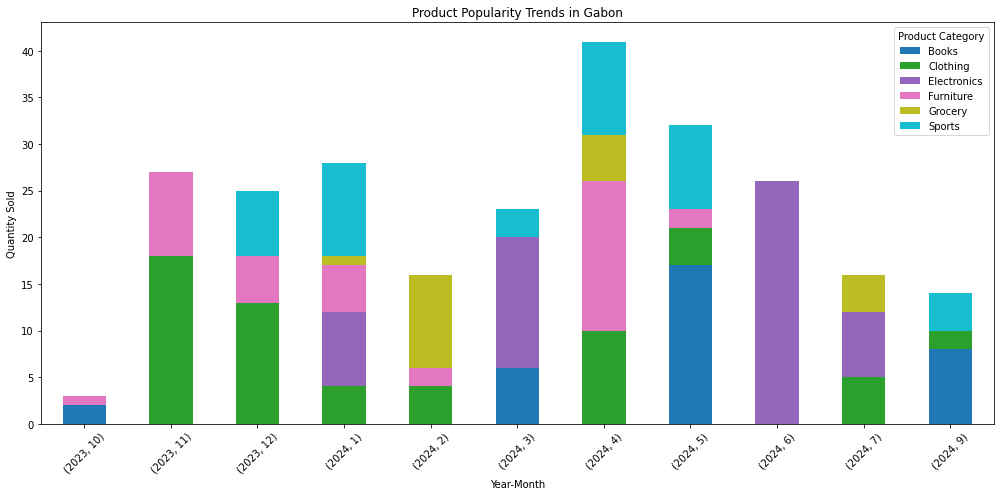

<Figure size 1008x504 with 0 Axes>

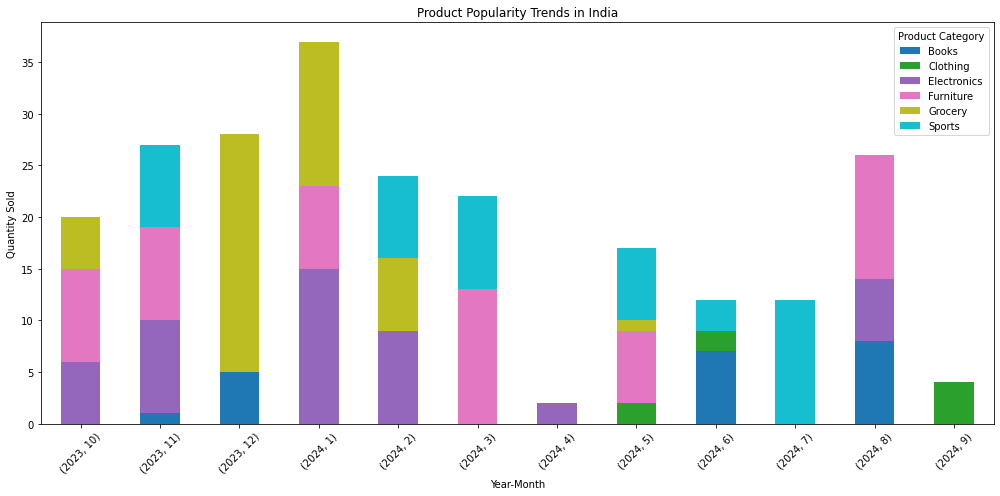

<Figure size 1008x504 with 0 Axes>

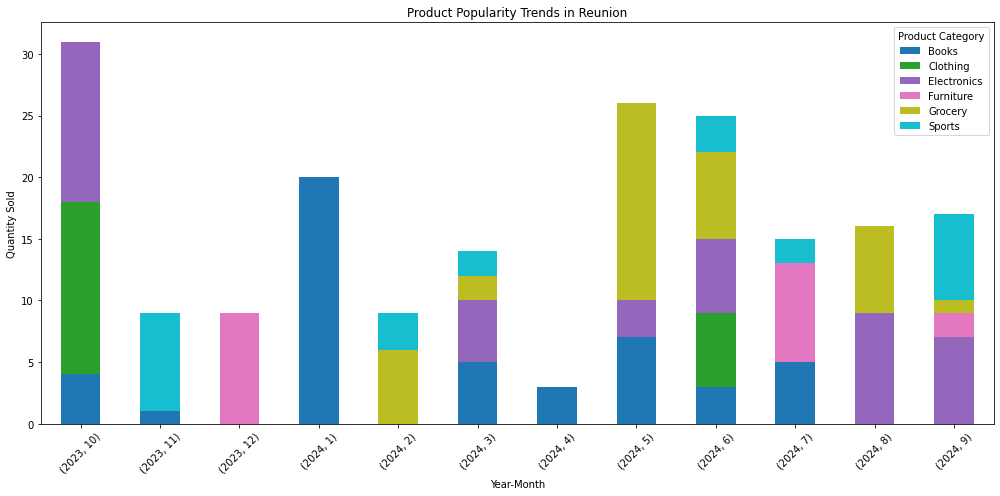

<Figure size 1008x504 with 0 Axes>

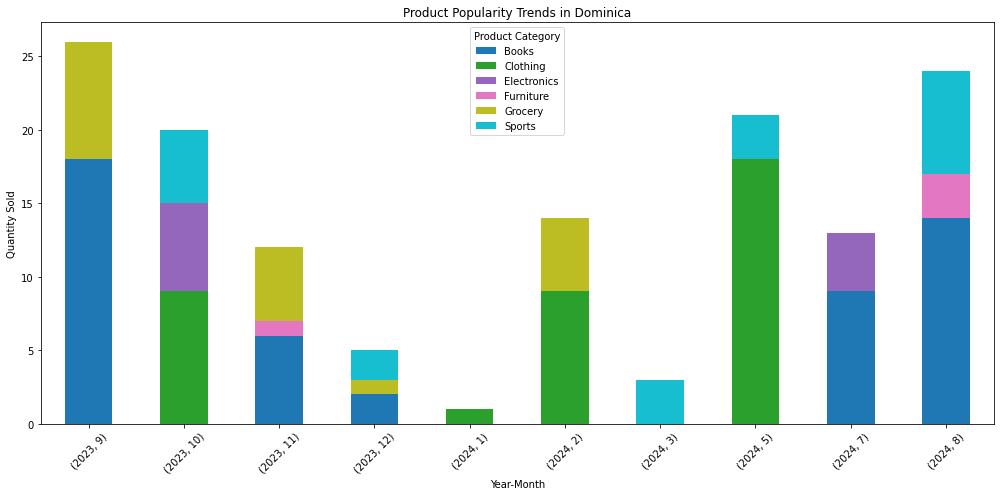

<Figure size 1008x504 with 0 Axes>

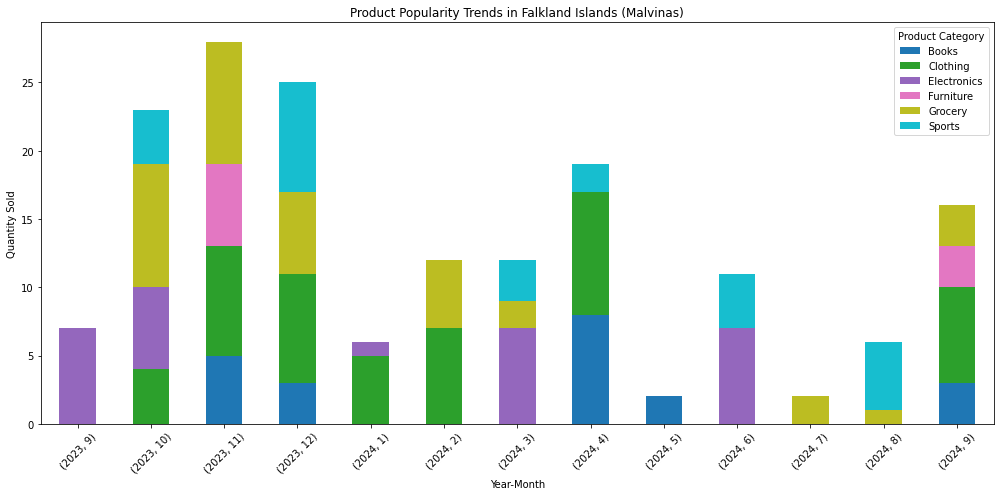

<Figure size 1008x504 with 0 Axes>

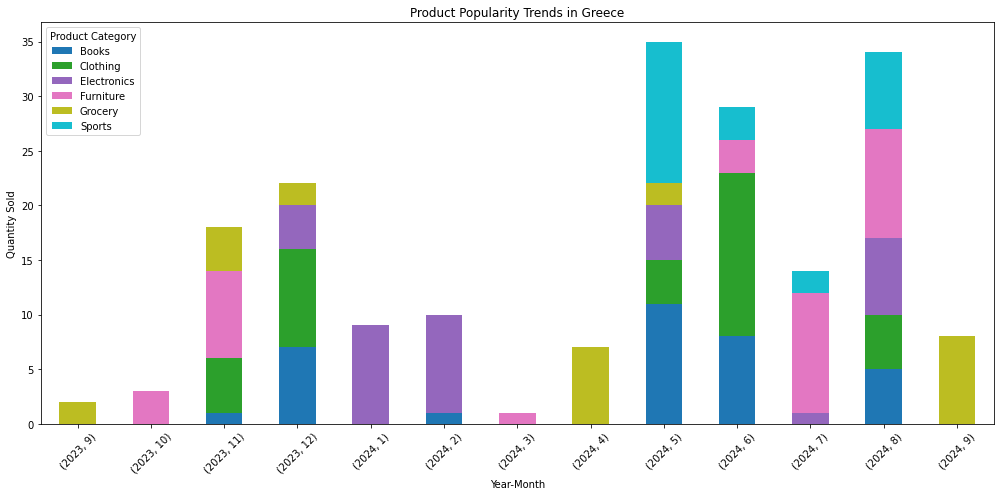

<Figure size 1008x504 with 0 Axes>

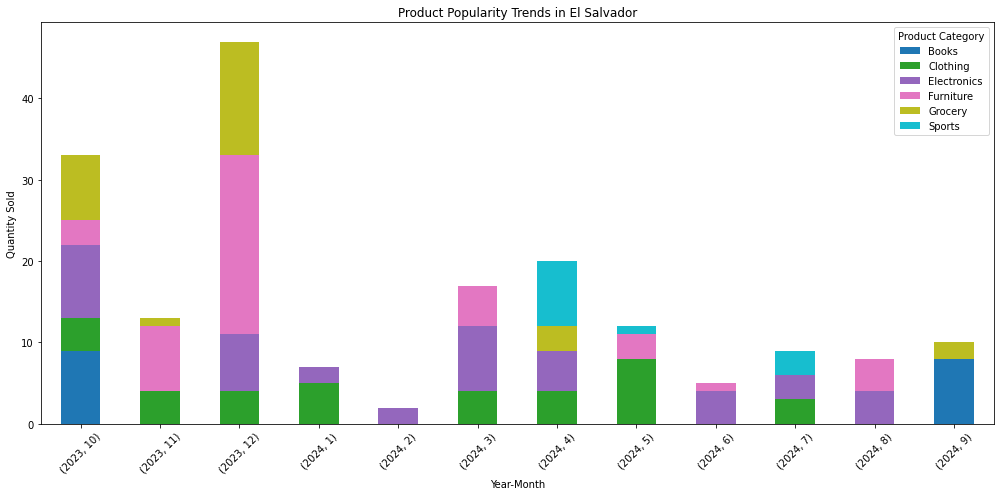

<Figure size 1008x504 with 0 Axes>

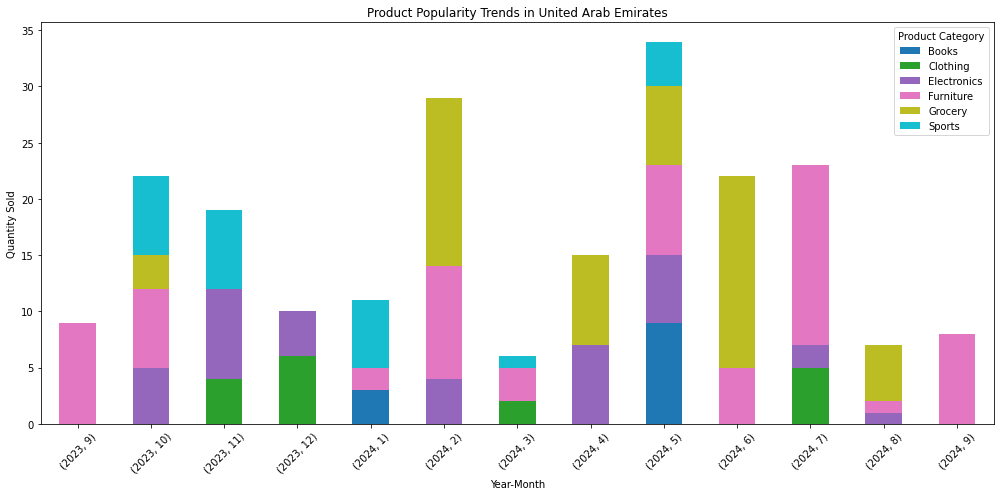

<Figure size 1008x504 with 0 Axes>

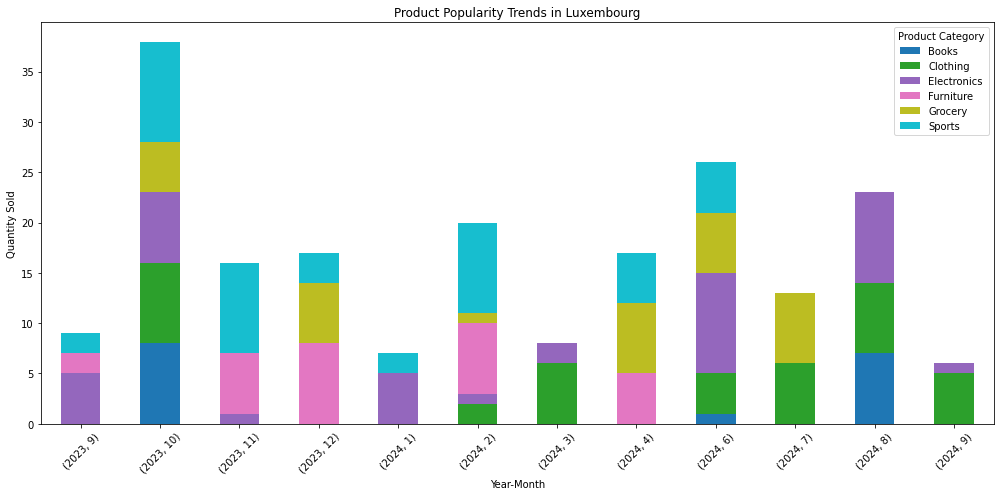

<Figure size 1008x504 with 0 Axes>

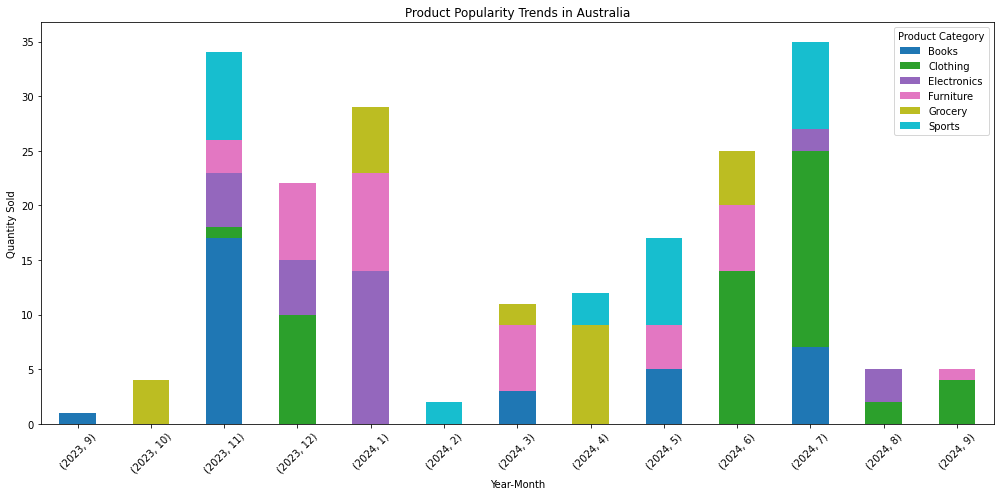

<Figure size 1008x504 with 0 Axes>

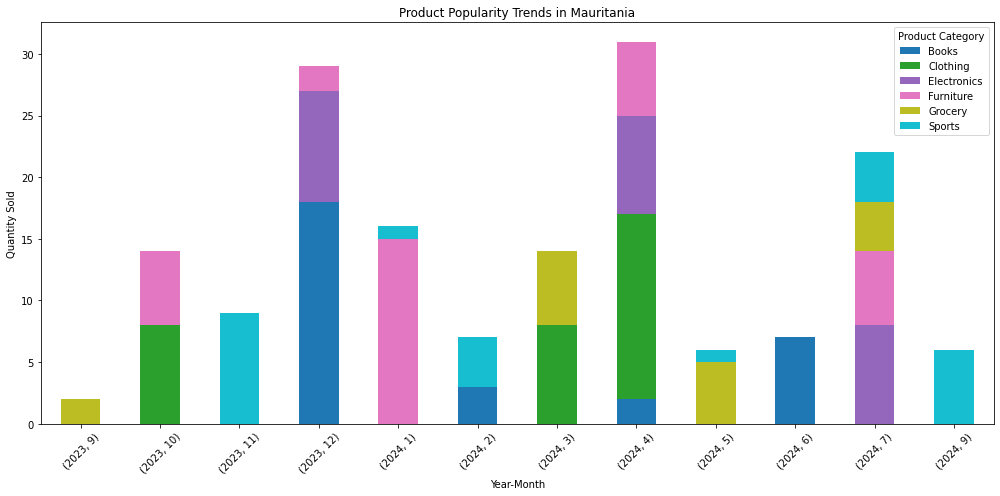

<Figure size 1008x504 with 0 Axes>

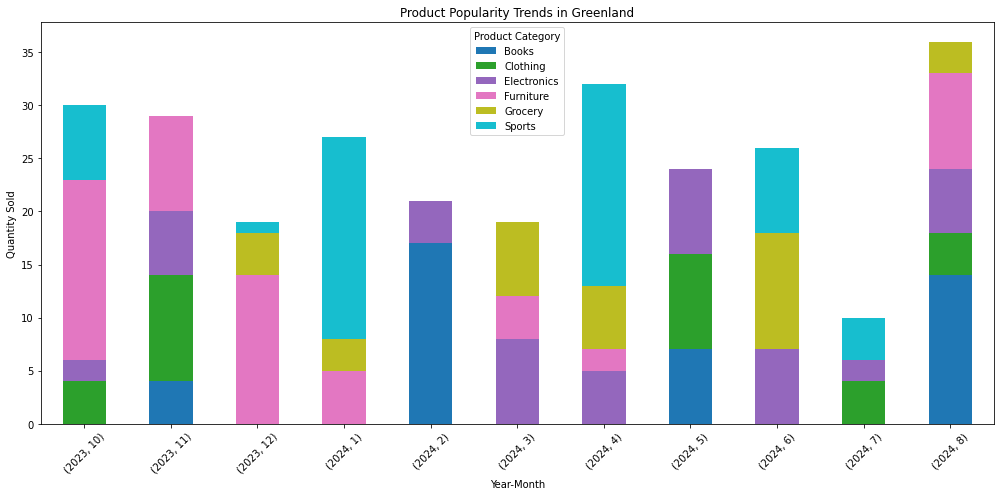

<Figure size 1008x504 with 0 Axes>

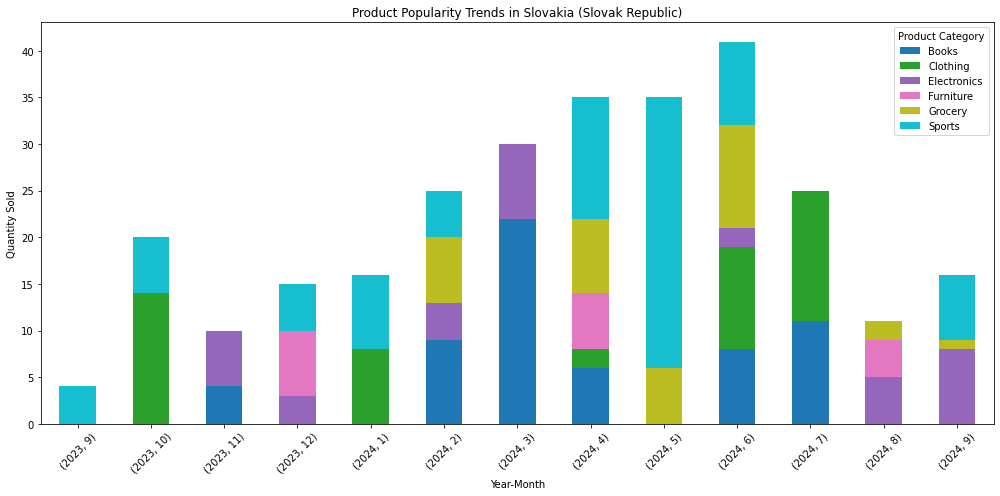

<Figure size 1008x504 with 0 Axes>

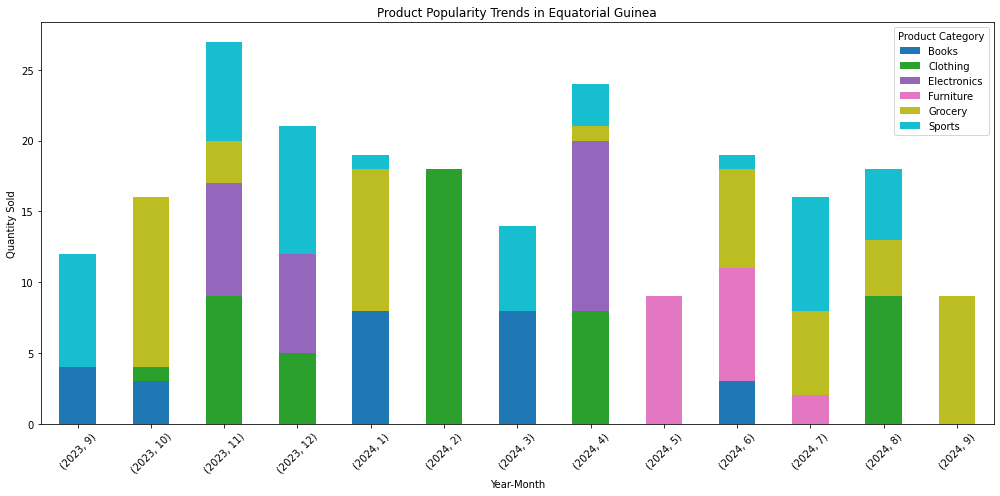

<Figure size 1008x504 with 0 Axes>

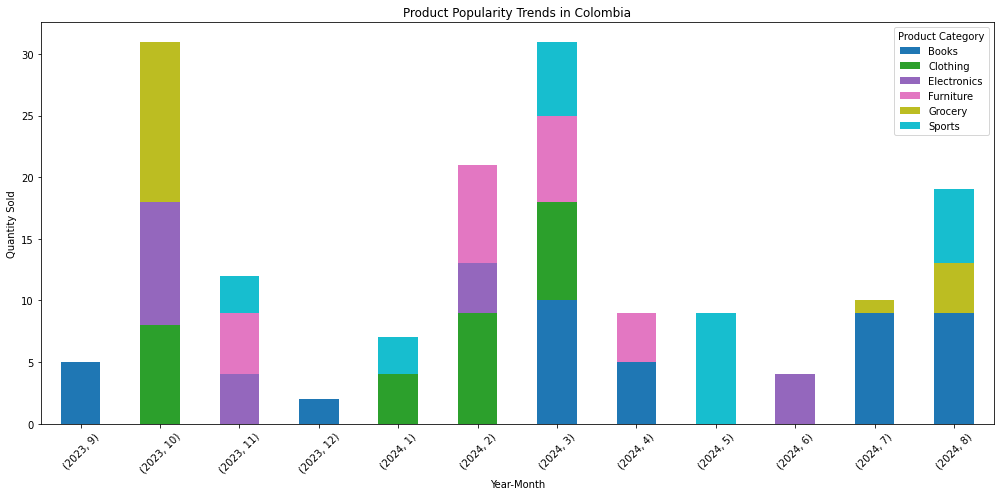

<Figure size 1008x504 with 0 Axes>

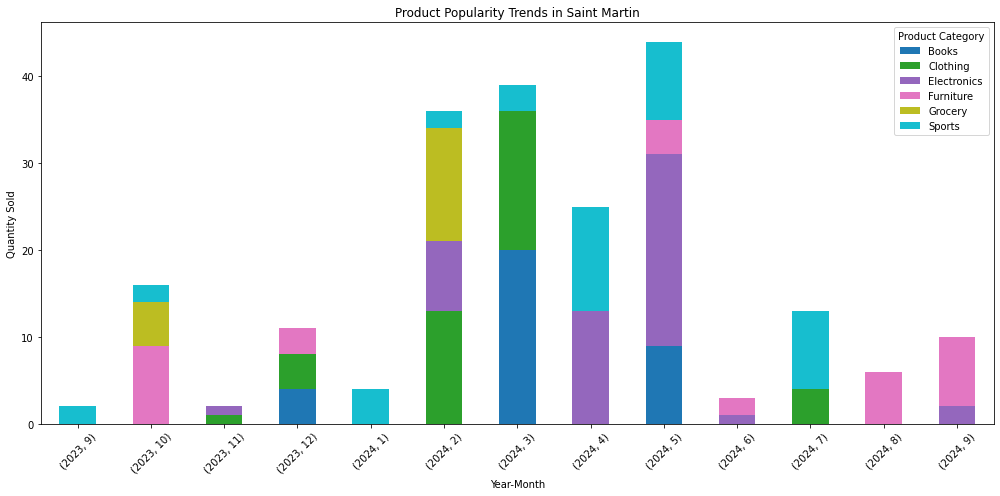

<Figure size 1008x504 with 0 Axes>

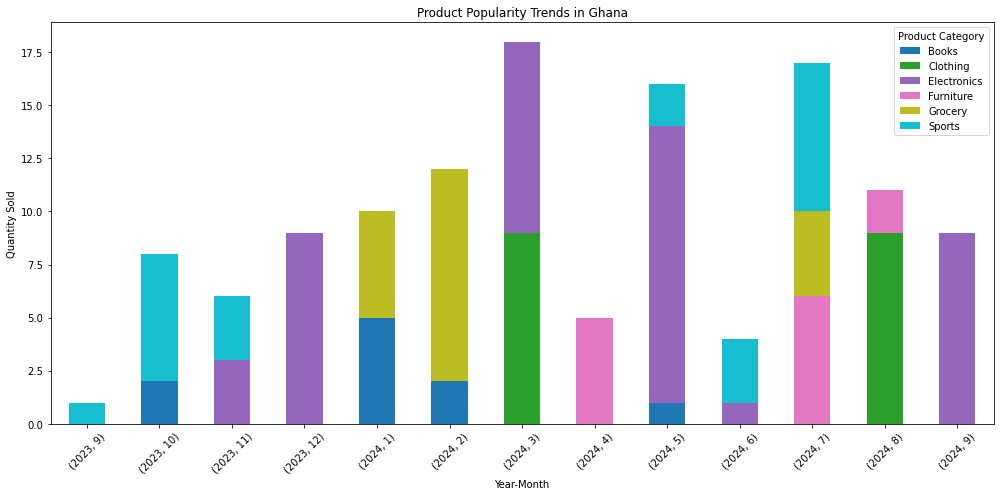

<Figure size 1008x504 with 0 Axes>

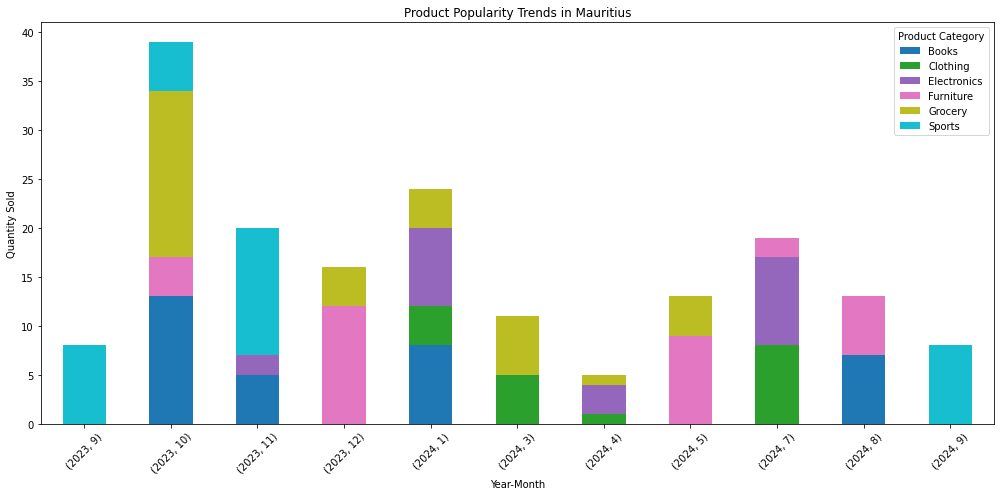

<Figure size 1008x504 with 0 Axes>

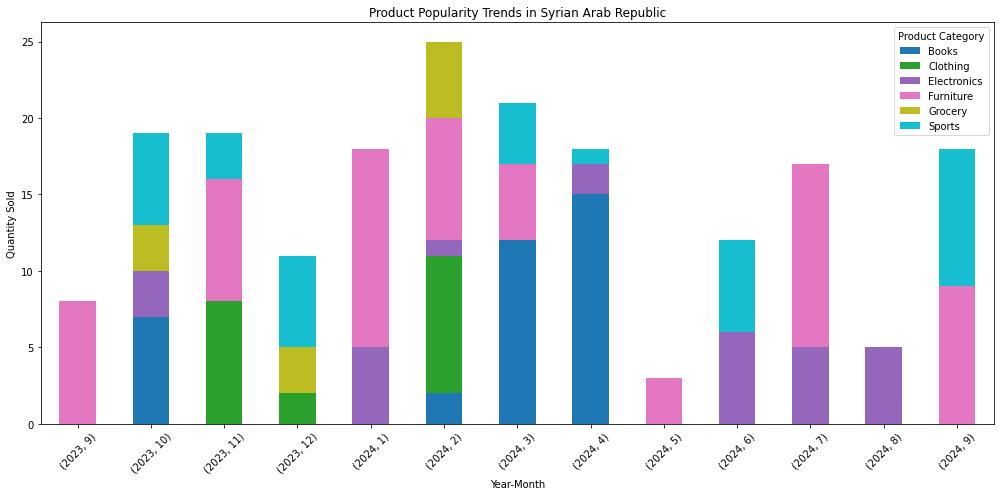

<Figure size 1008x504 with 0 Axes>

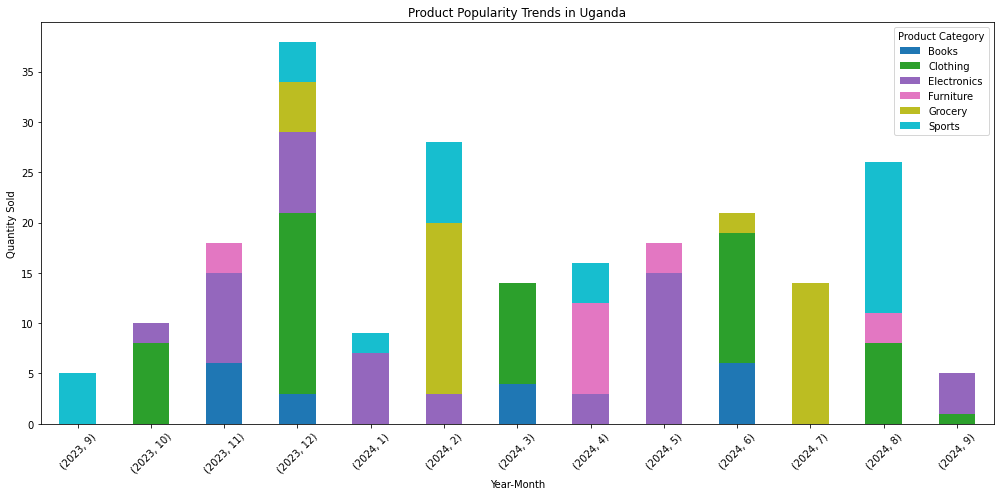

<Figure size 1008x504 with 0 Axes>

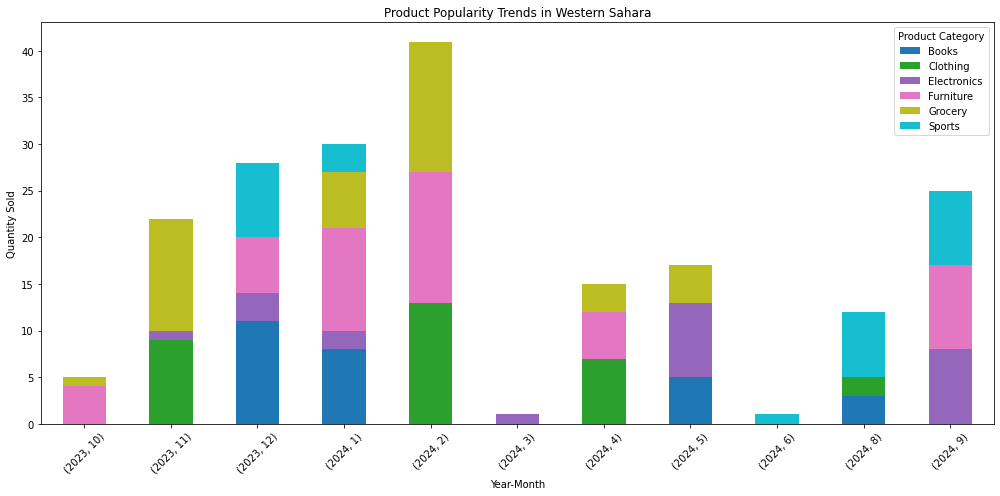

<Figure size 1008x504 with 0 Axes>

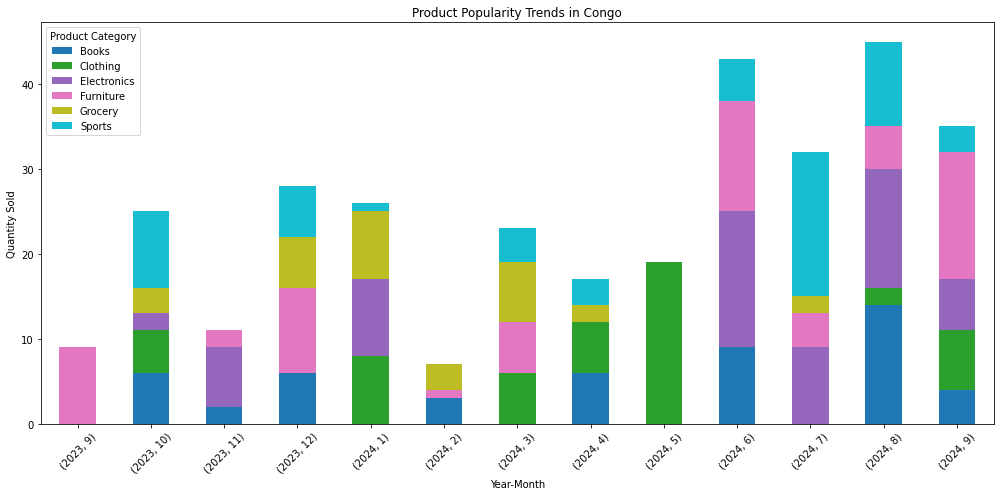

<Figure size 1008x504 with 0 Axes>

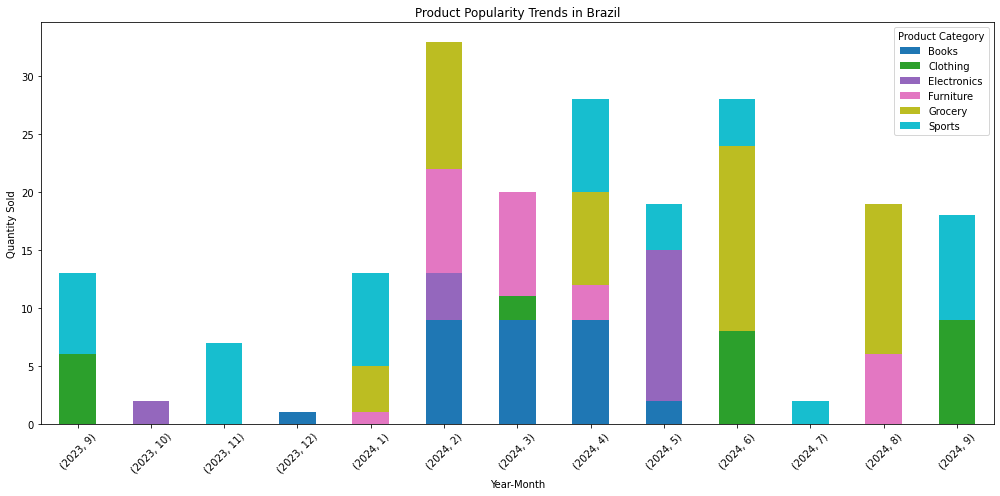

<Figure size 1008x504 with 0 Axes>

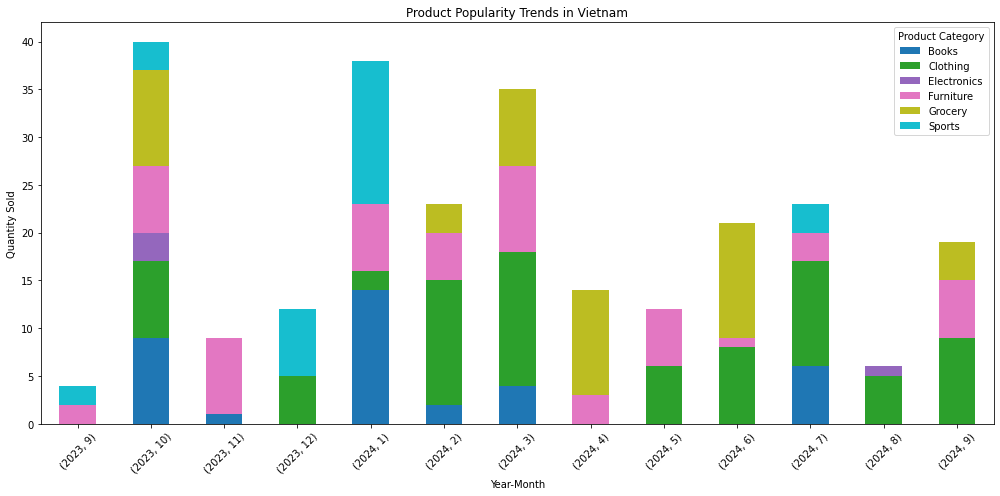

<Figure size 1008x504 with 0 Axes>

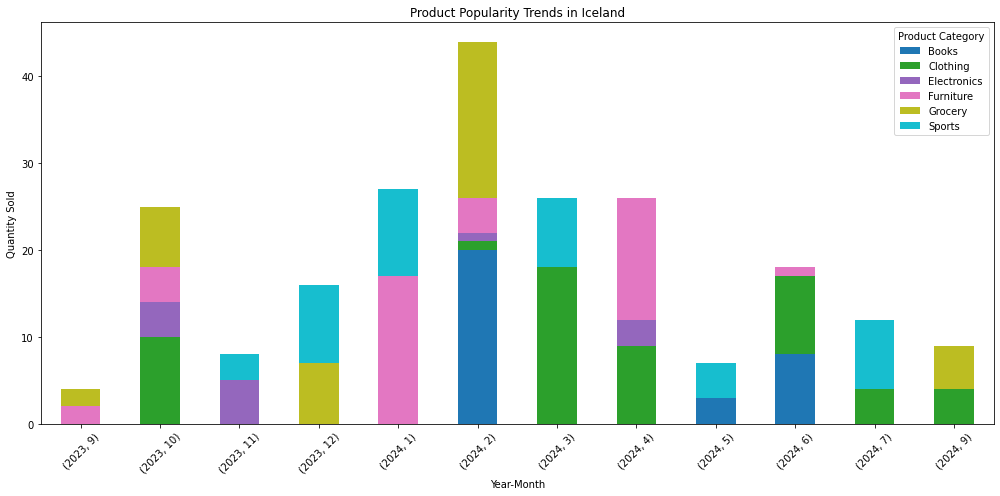

<Figure size 1008x504 with 0 Axes>

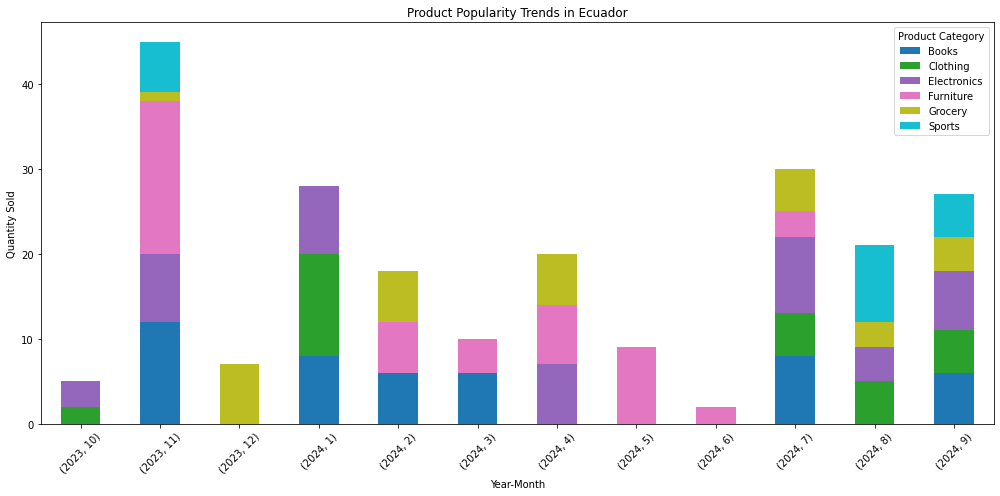

<Figure size 1008x504 with 0 Axes>

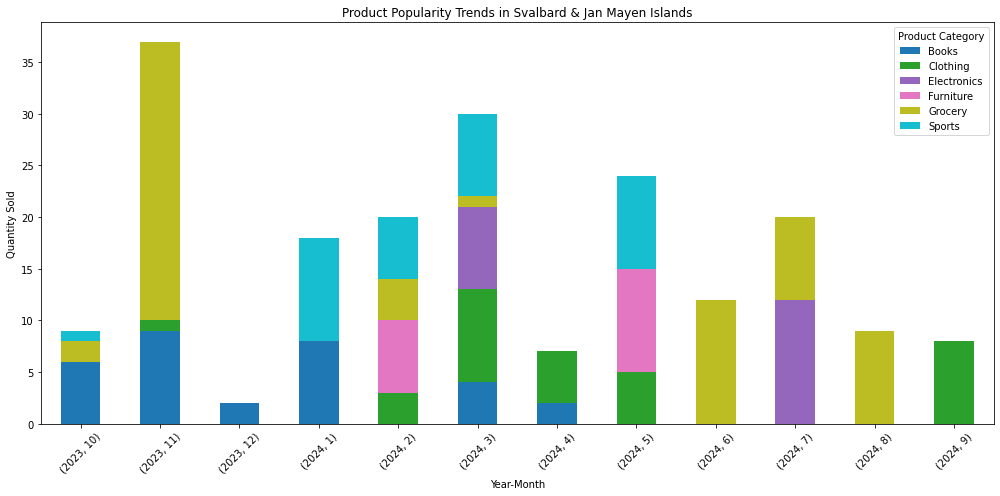

<Figure size 1008x504 with 0 Axes>

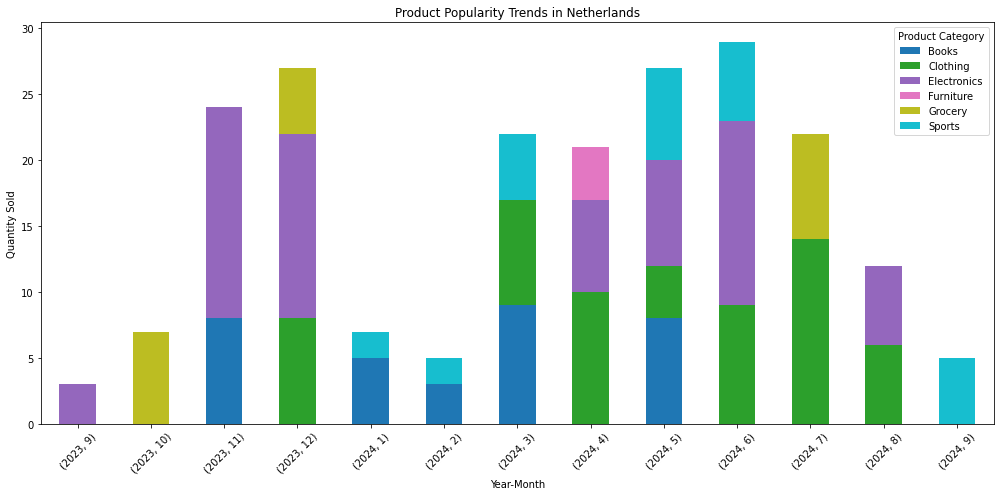

<Figure size 1008x504 with 0 Axes>

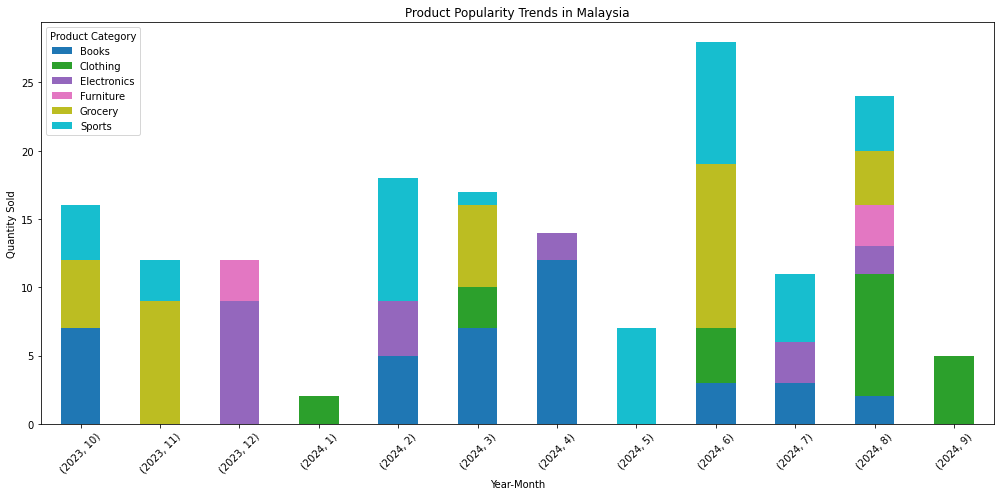

<Figure size 1008x504 with 0 Axes>

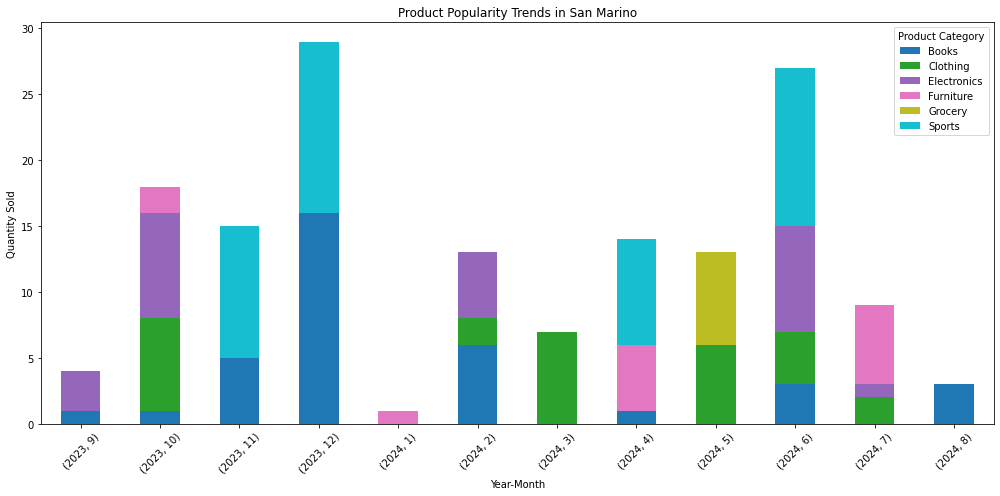

<Figure size 1008x504 with 0 Axes>

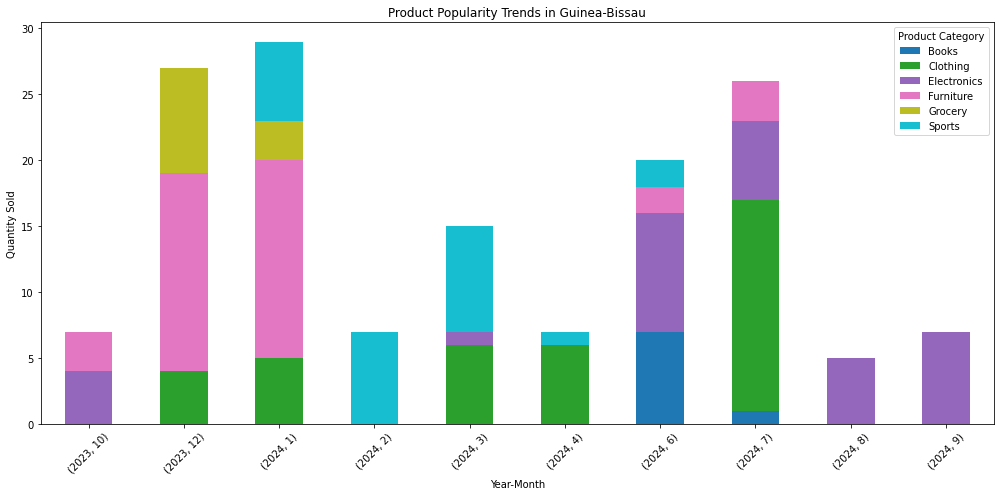

<Figure size 1008x504 with 0 Axes>

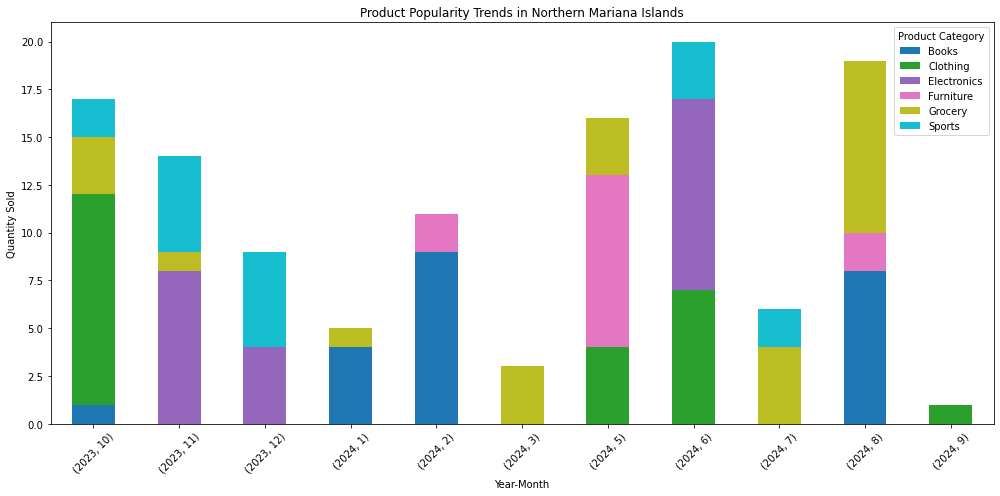

<Figure size 1008x504 with 0 Axes>

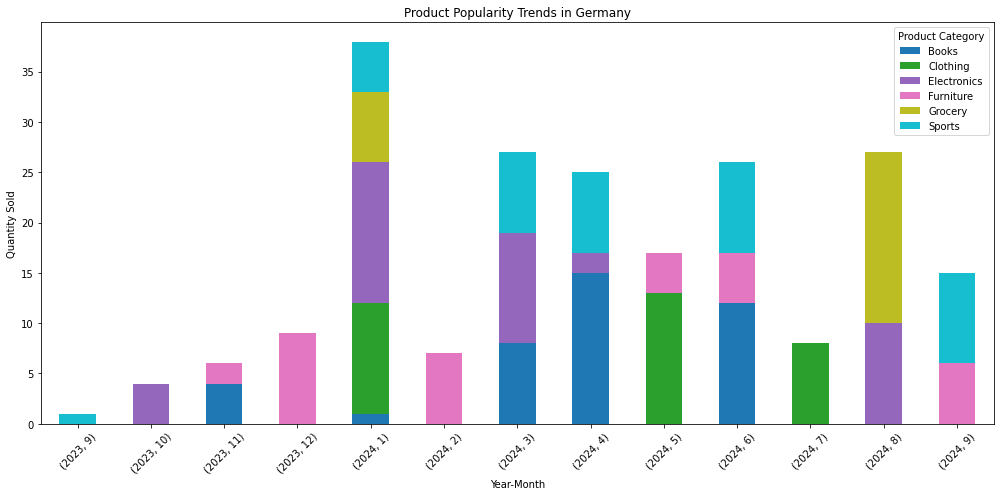

<Figure size 1008x504 with 0 Axes>

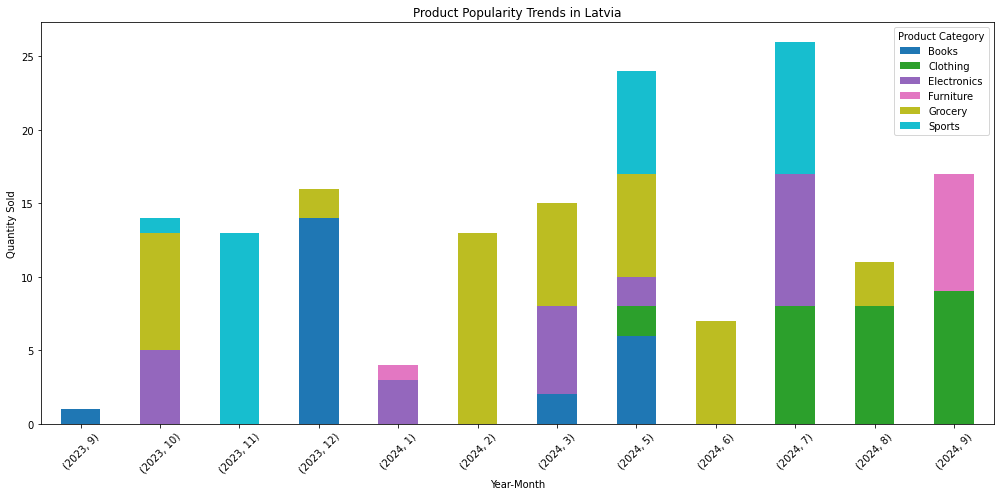

<Figure size 1008x504 with 0 Axes>

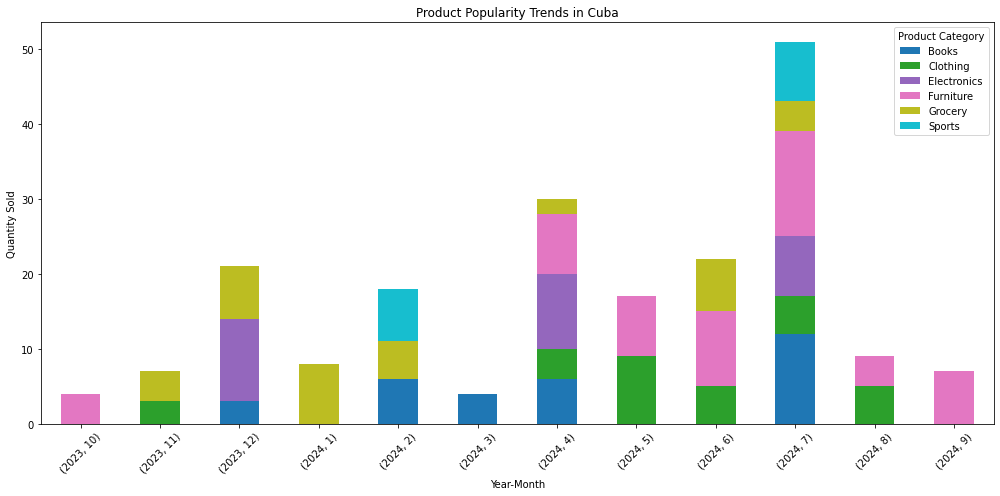

<Figure size 1008x504 with 0 Axes>

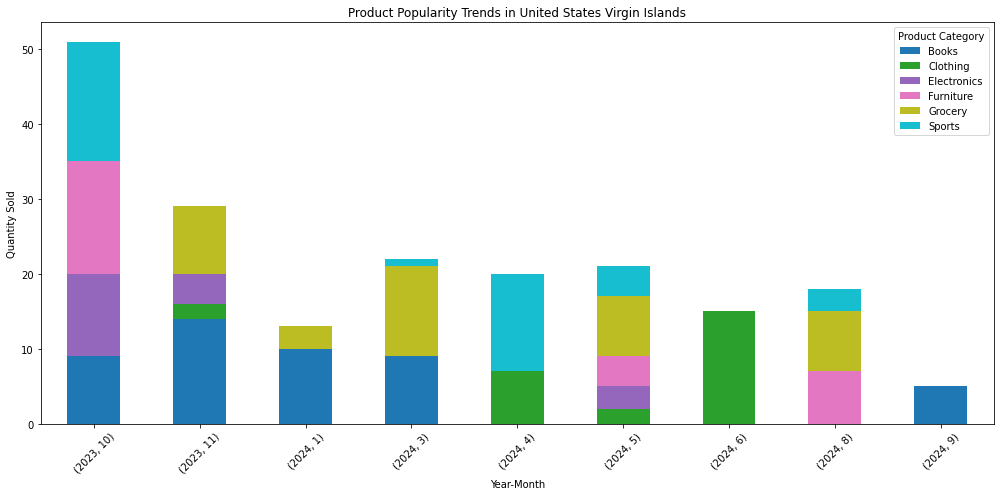

<Figure size 1008x504 with 0 Axes>

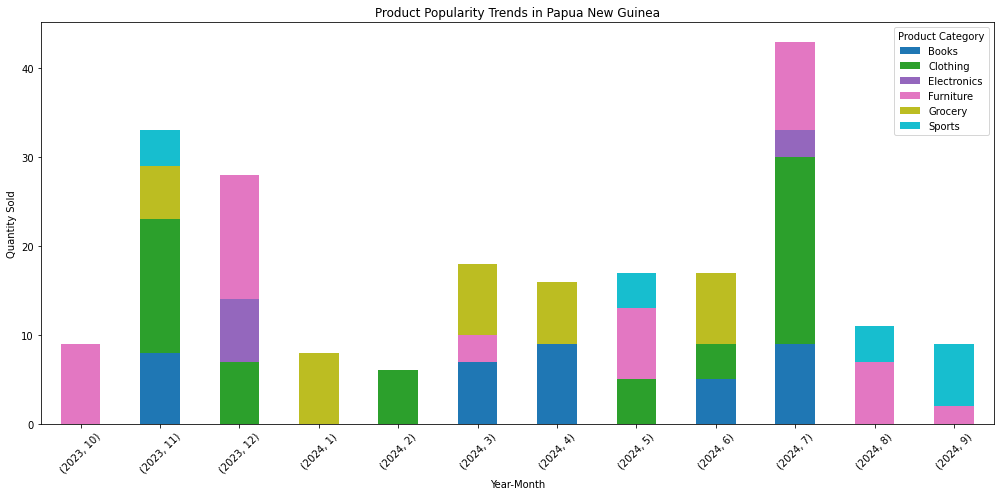

<Figure size 1008x504 with 0 Axes>

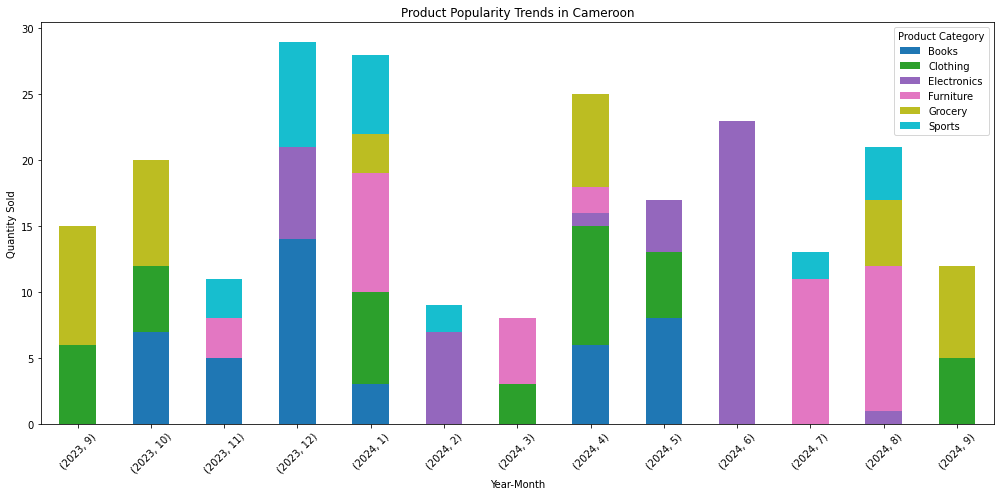

<Figure size 1008x504 with 0 Axes>

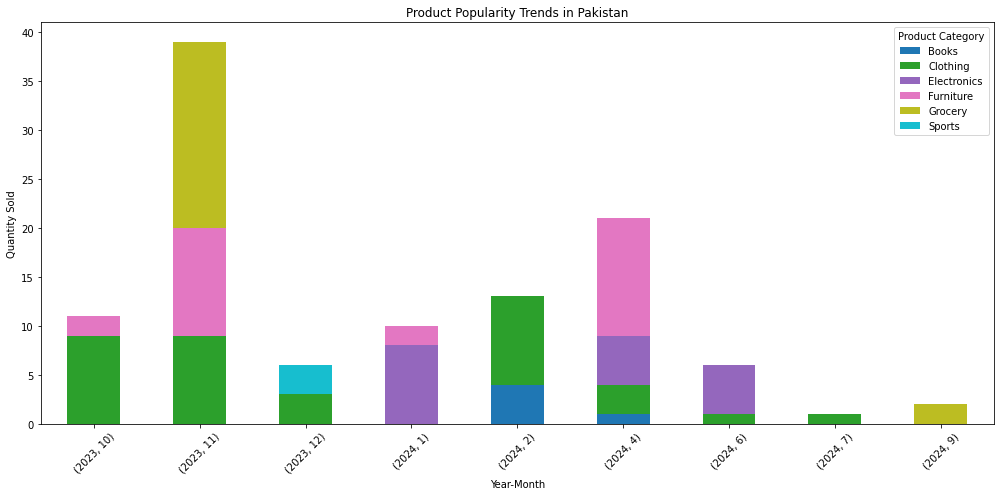

<Figure size 1008x504 with 0 Axes>

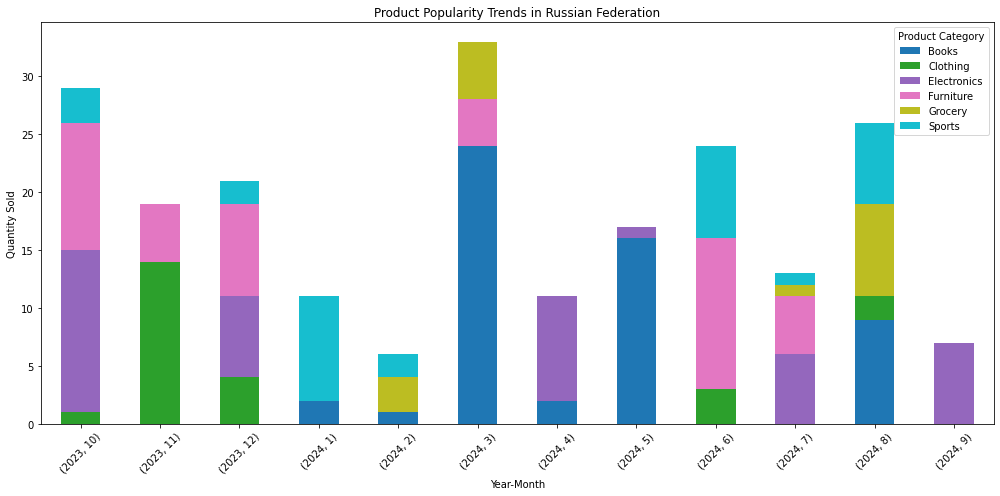

<Figure size 1008x504 with 0 Axes>

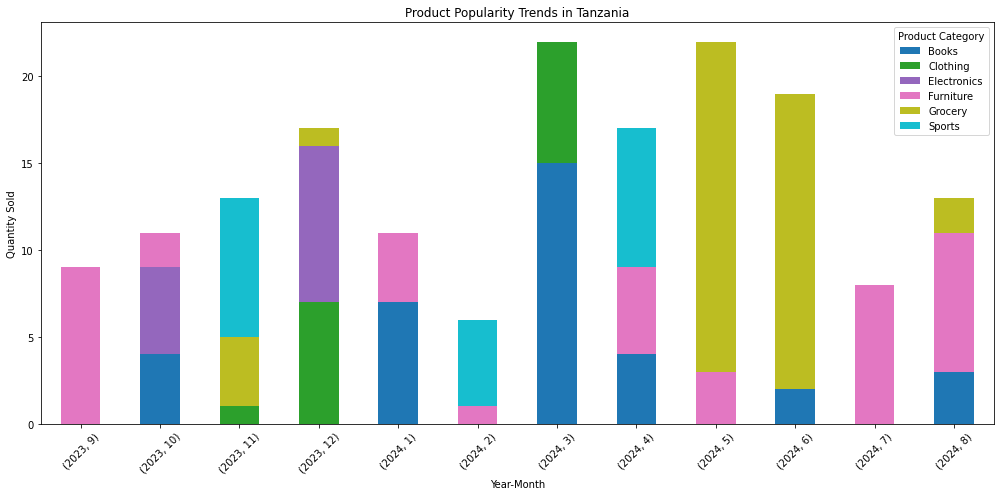

<Figure size 1008x504 with 0 Axes>

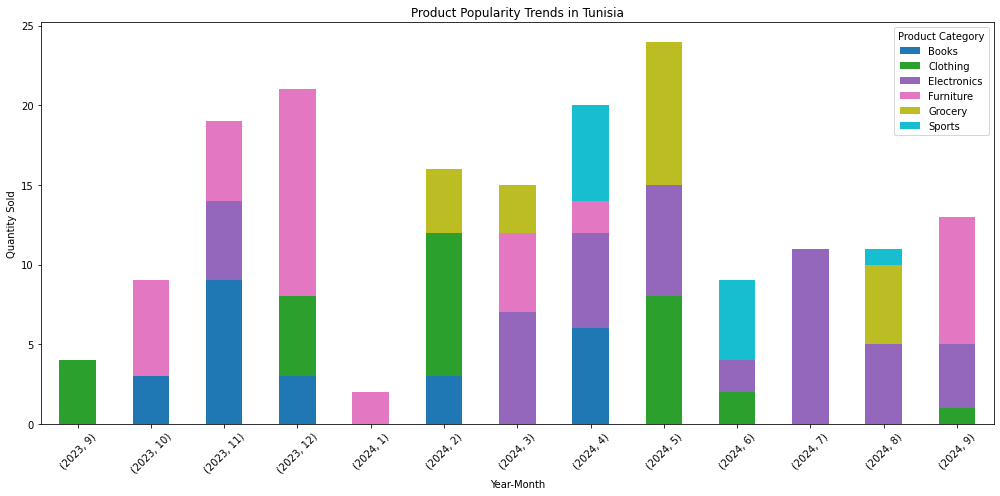

<Figure size 1008x504 with 0 Axes>

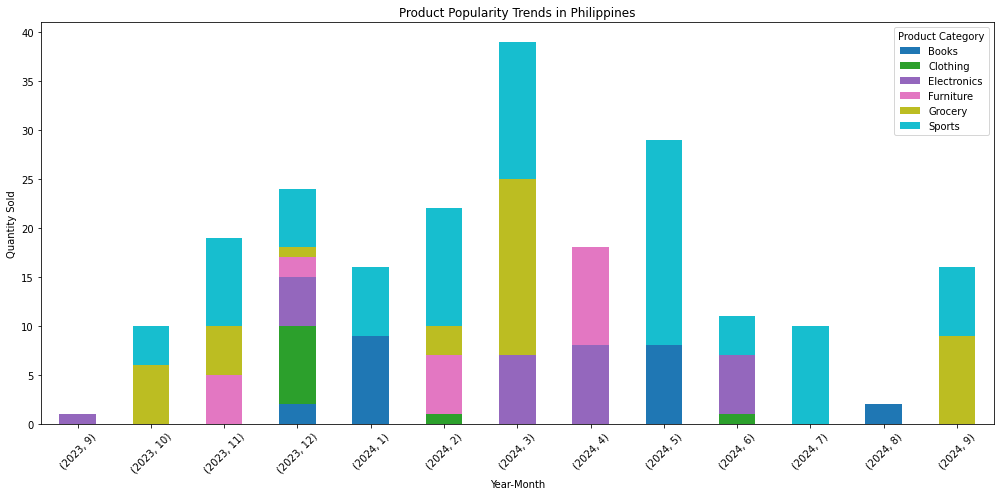

<Figure size 1008x504 with 0 Axes>

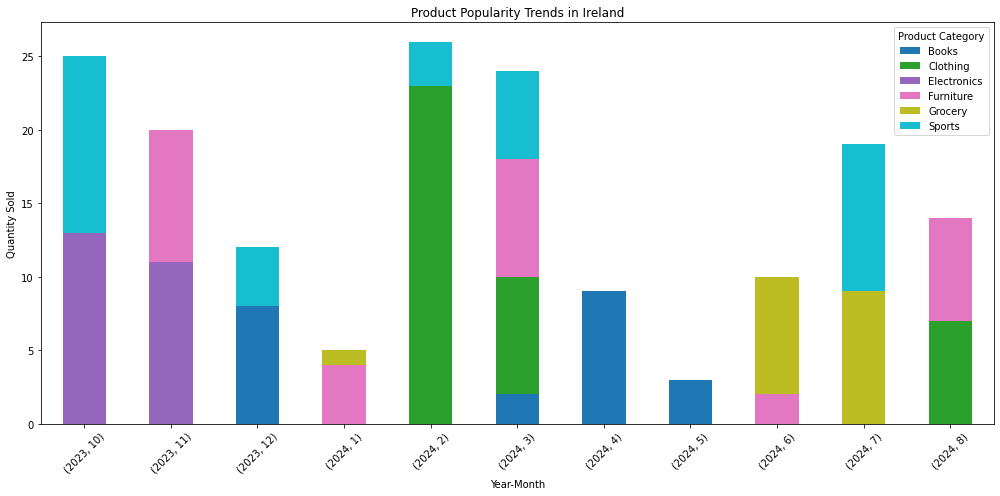

<Figure size 1008x504 with 0 Axes>

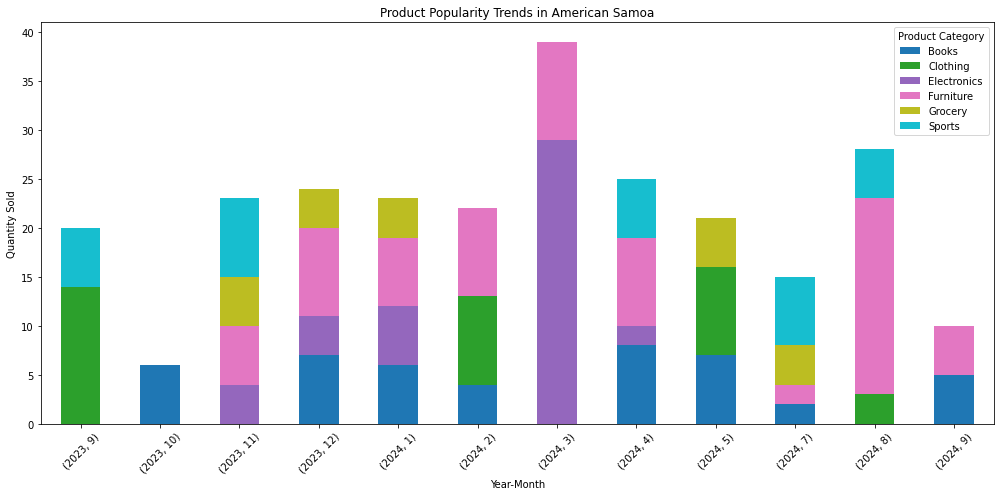

<Figure size 1008x504 with 0 Axes>

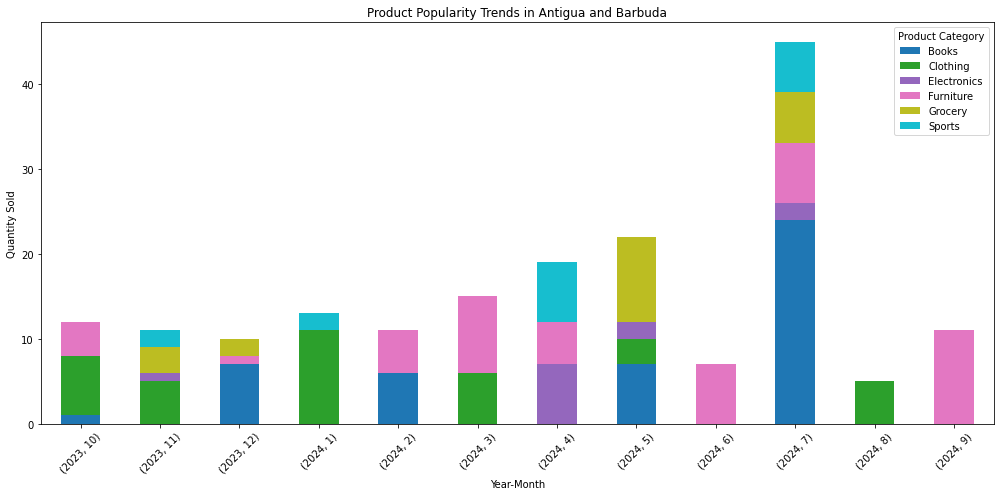

<Figure size 1008x504 with 0 Axes>

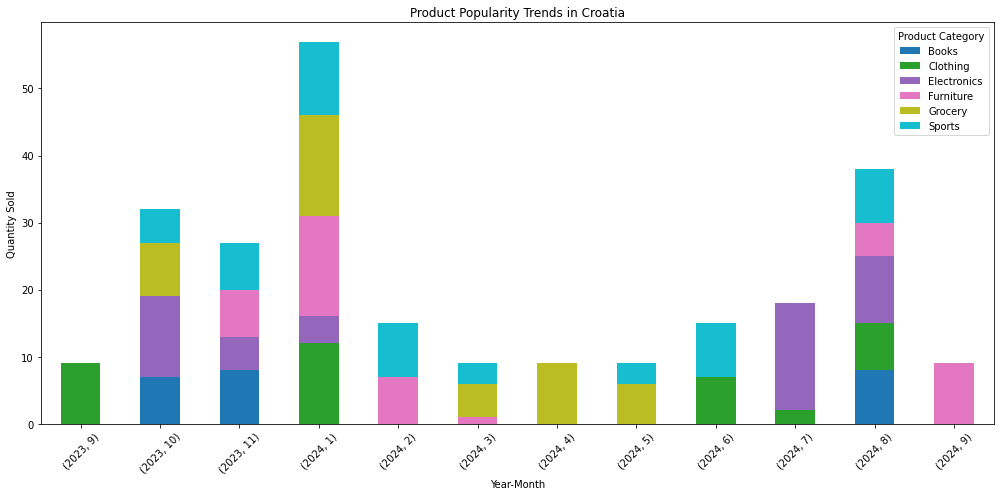

<Figure size 1008x504 with 0 Axes>

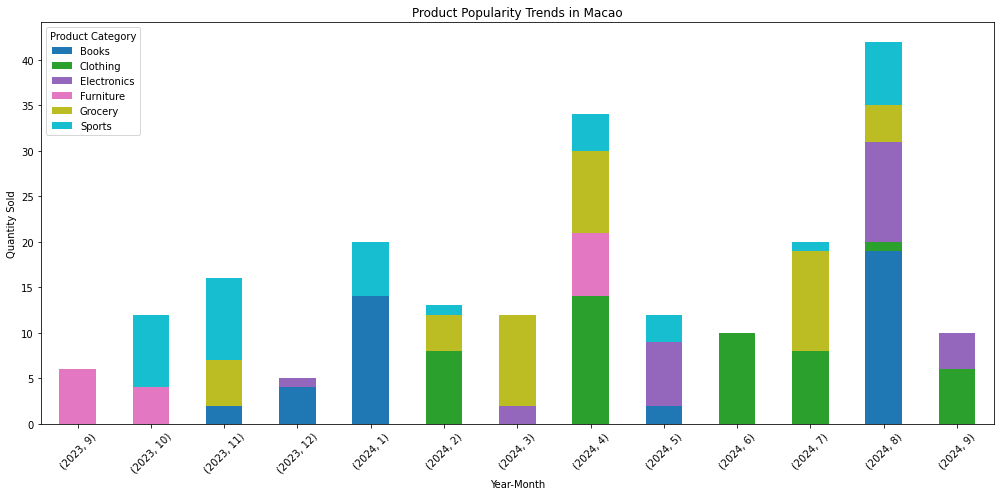

<Figure size 1008x504 with 0 Axes>

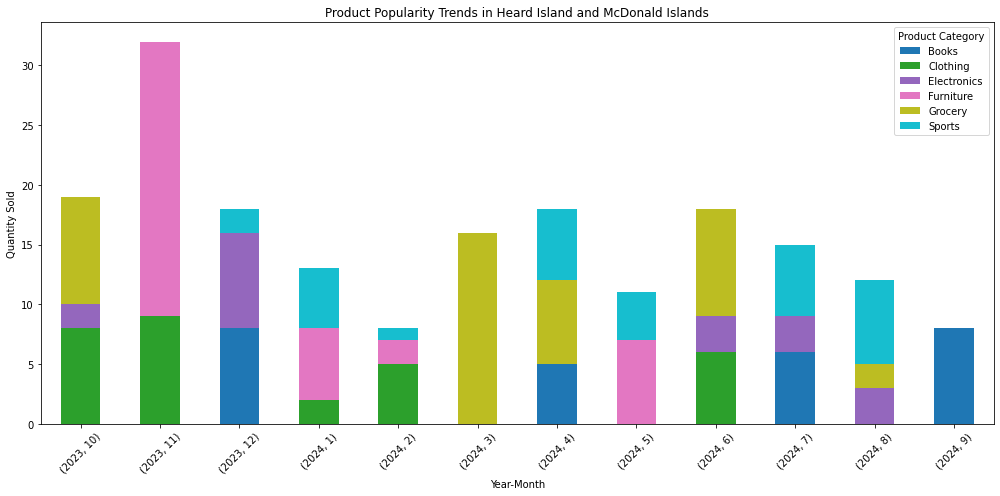

<Figure size 1008x504 with 0 Axes>

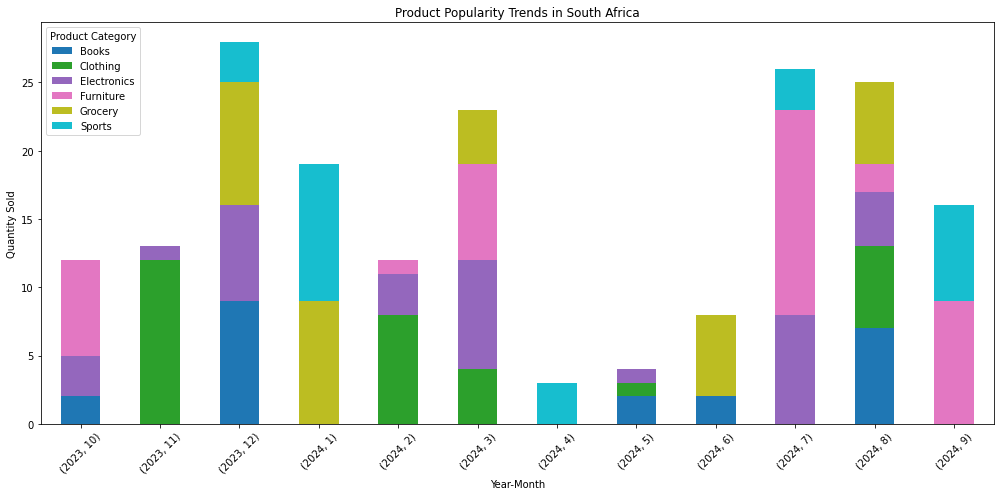

<Figure size 1008x504 with 0 Axes>

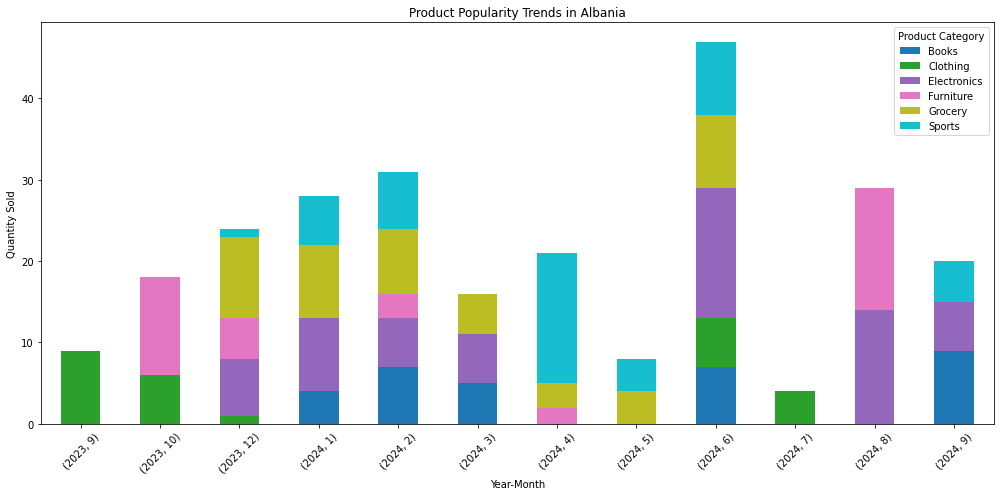

<Figure size 1008x504 with 0 Axes>

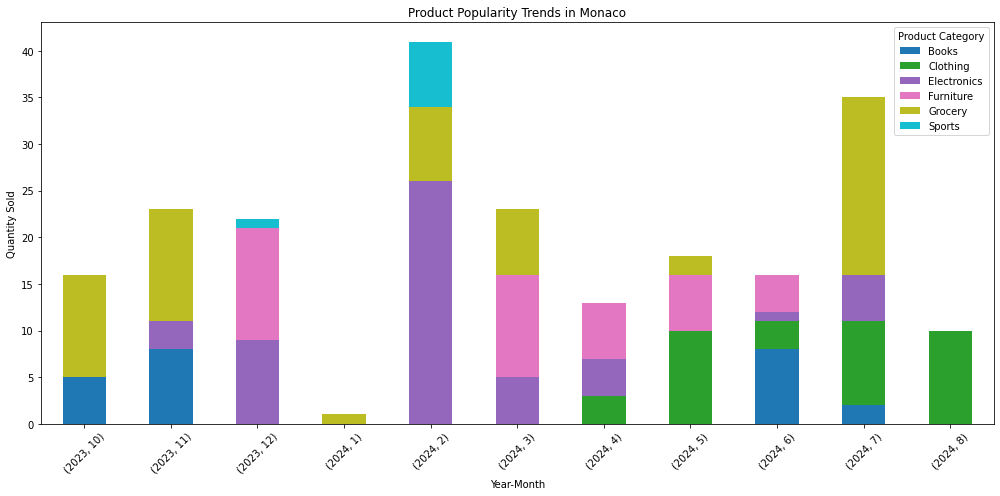

<Figure size 1008x504 with 0 Axes>

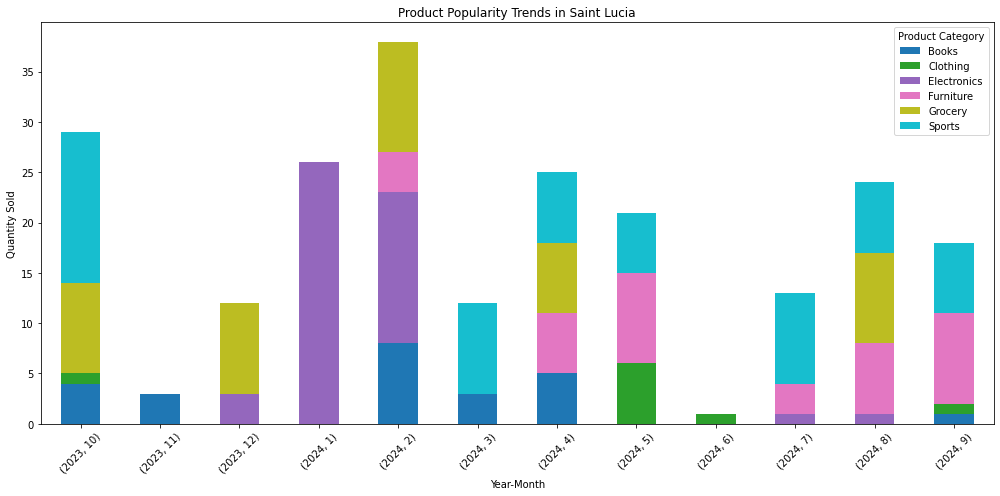

<Figure size 1008x504 with 0 Axes>

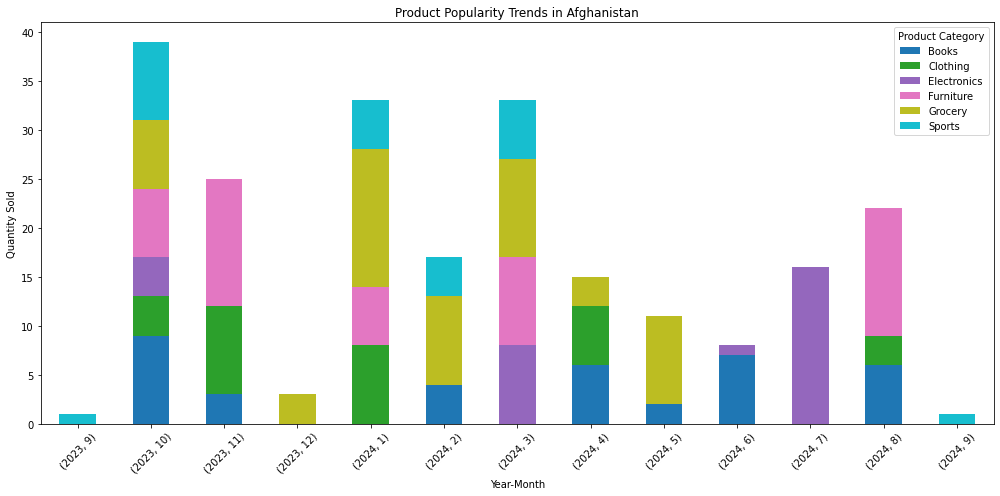

<Figure size 1008x504 with 0 Axes>

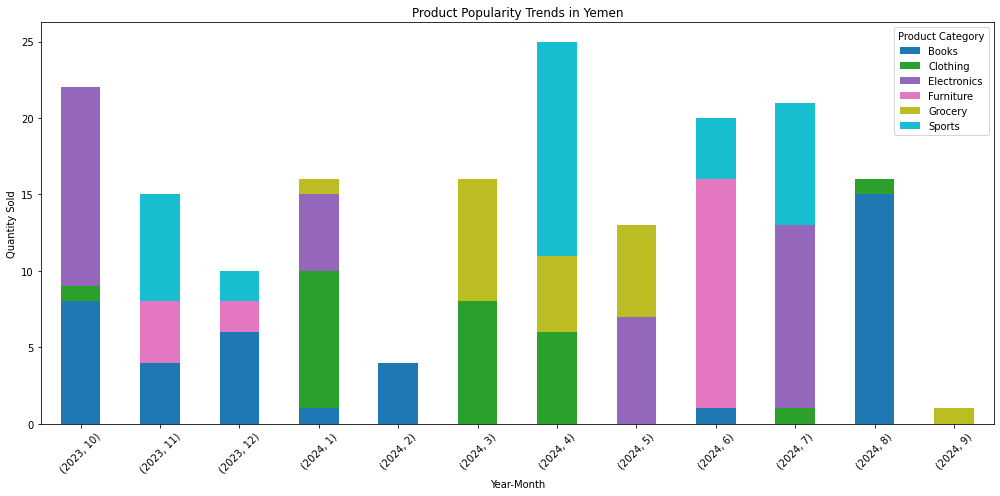

<Figure size 1008x504 with 0 Axes>

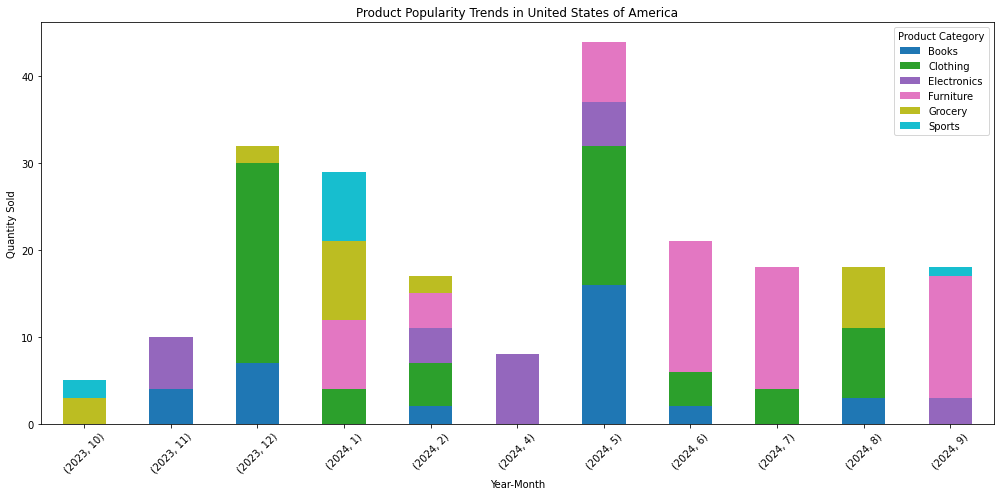

<Figure size 1008x504 with 0 Axes>

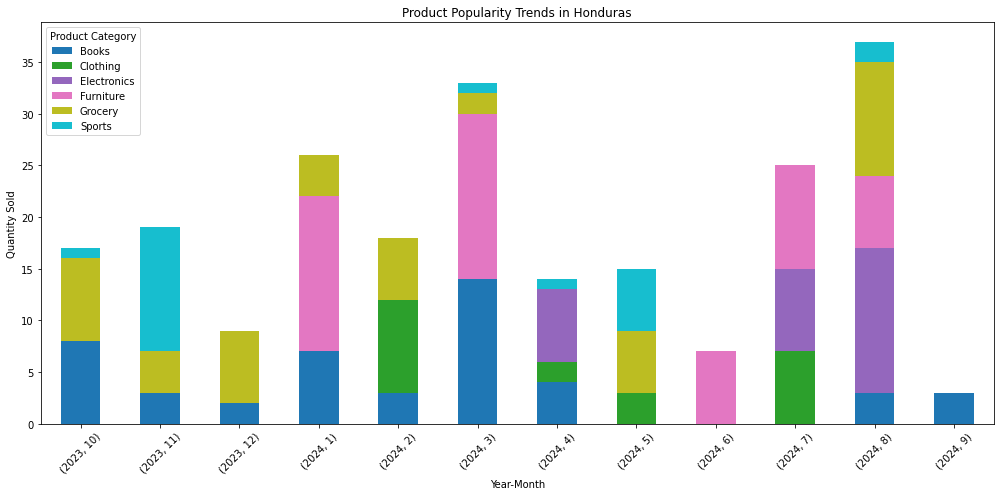

<Figure size 1008x504 with 0 Axes>

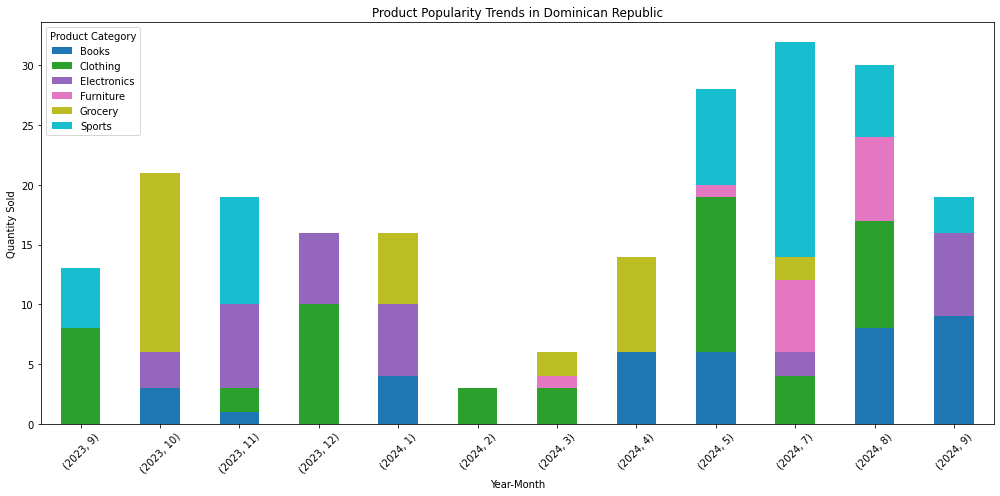

<Figure size 1008x504 with 0 Axes>

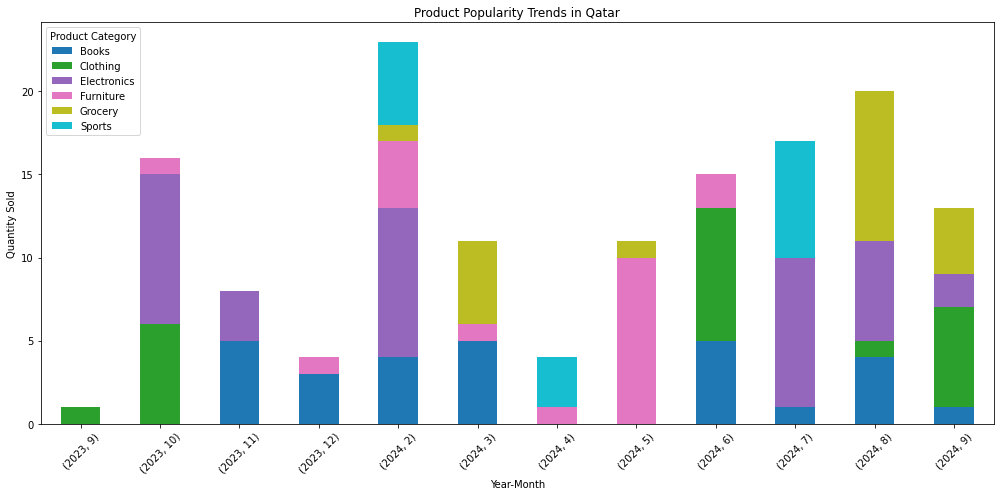

<Figure size 1008x504 with 0 Axes>

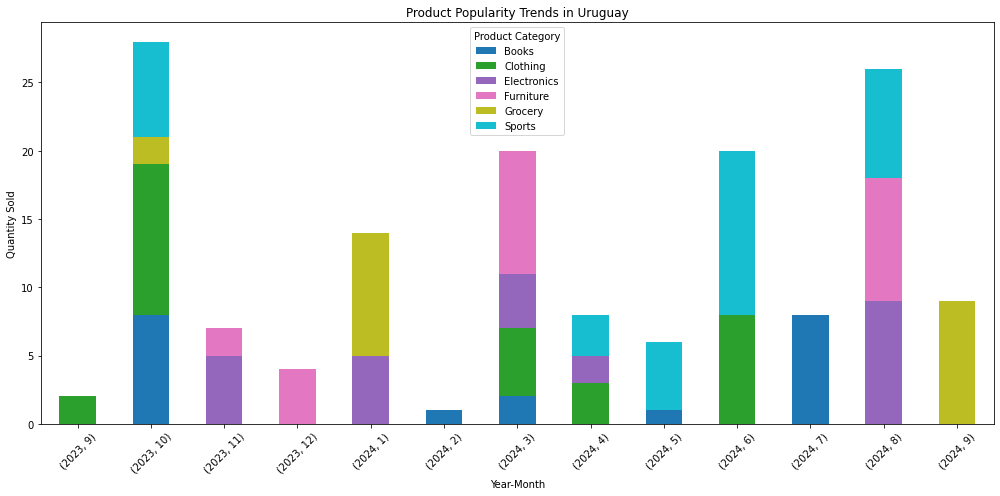

<Figure size 1008x504 with 0 Axes>

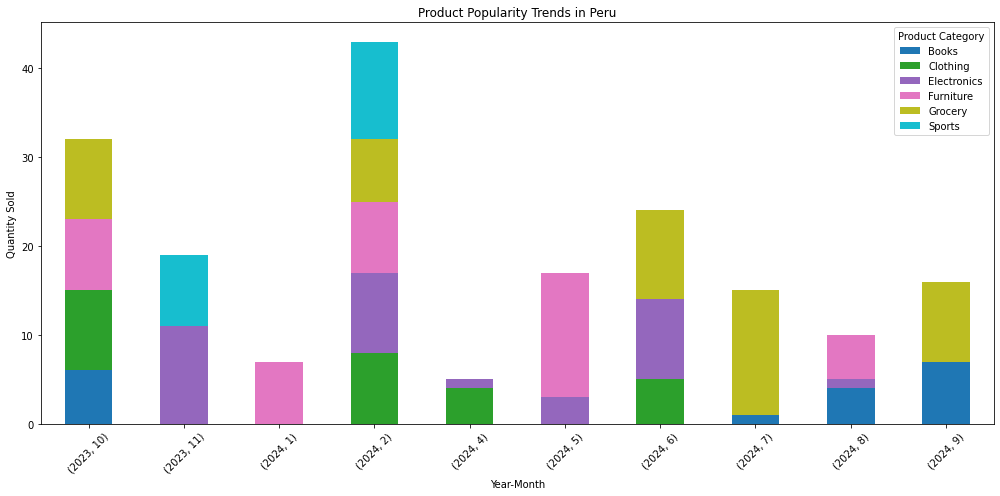

<Figure size 1008x504 with 0 Axes>

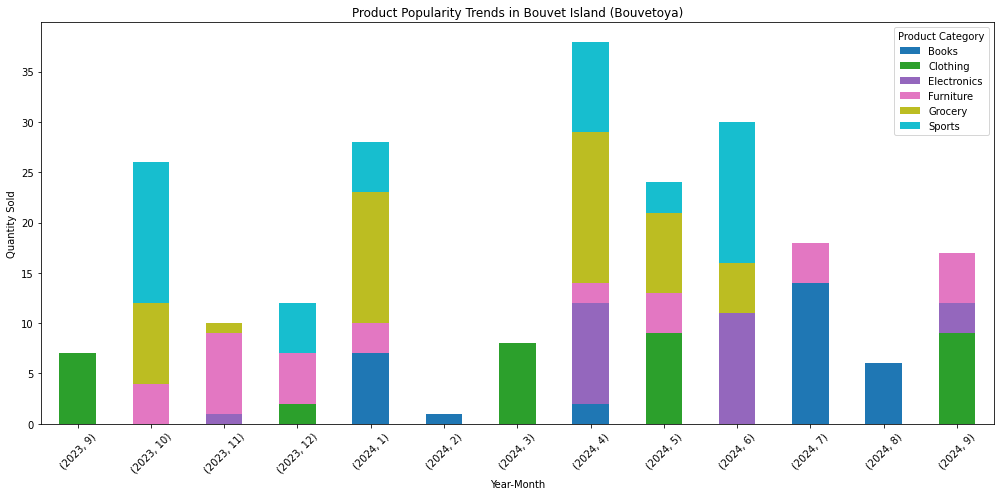

<Figure size 1008x504 with 0 Axes>

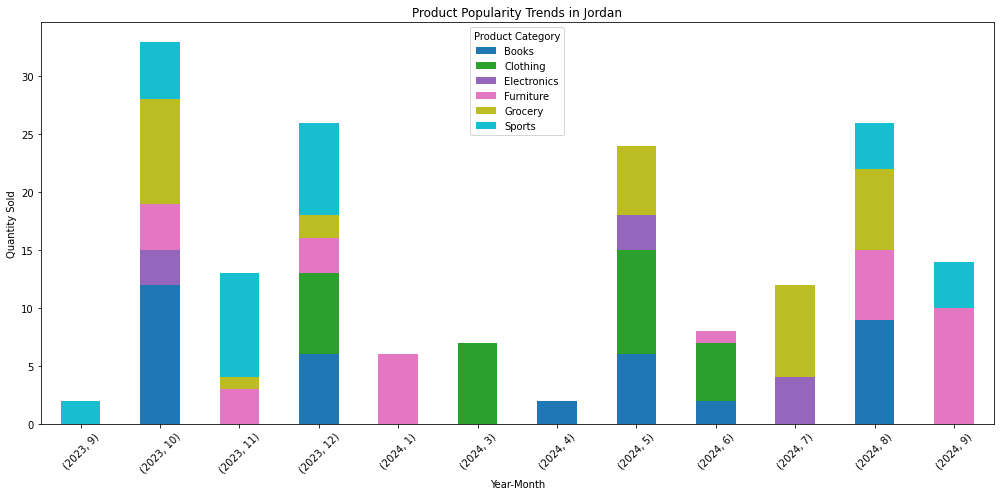

<Figure size 1008x504 with 0 Axes>

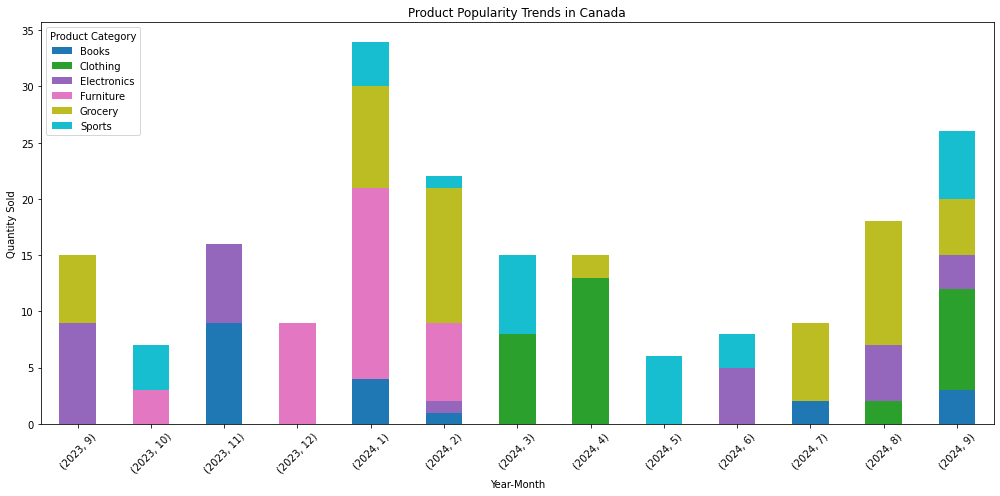

<Figure size 1008x504 with 0 Axes>

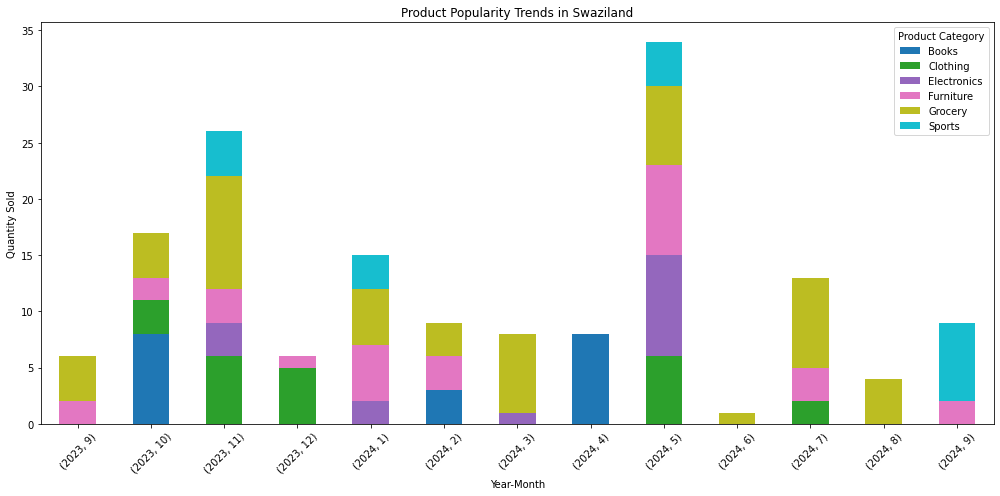

<Figure size 1008x504 with 0 Axes>

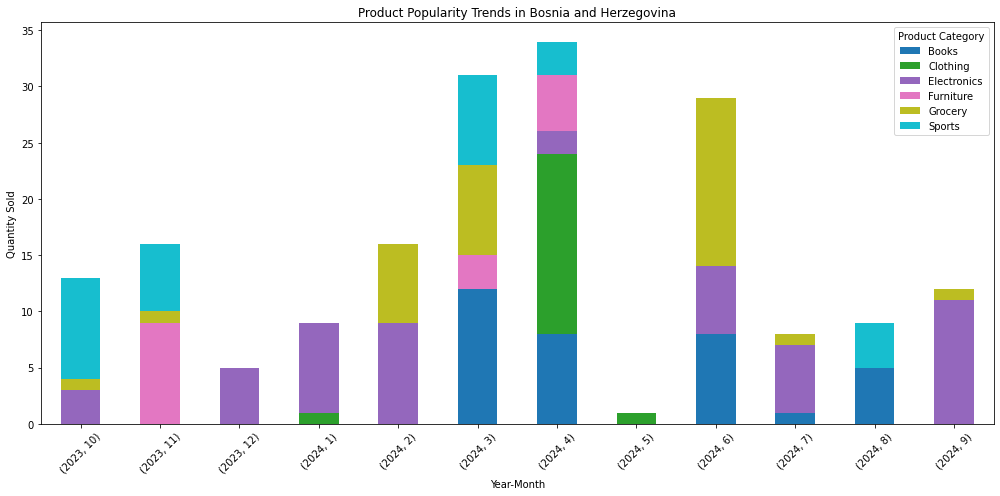

<Figure size 1008x504 with 0 Axes>

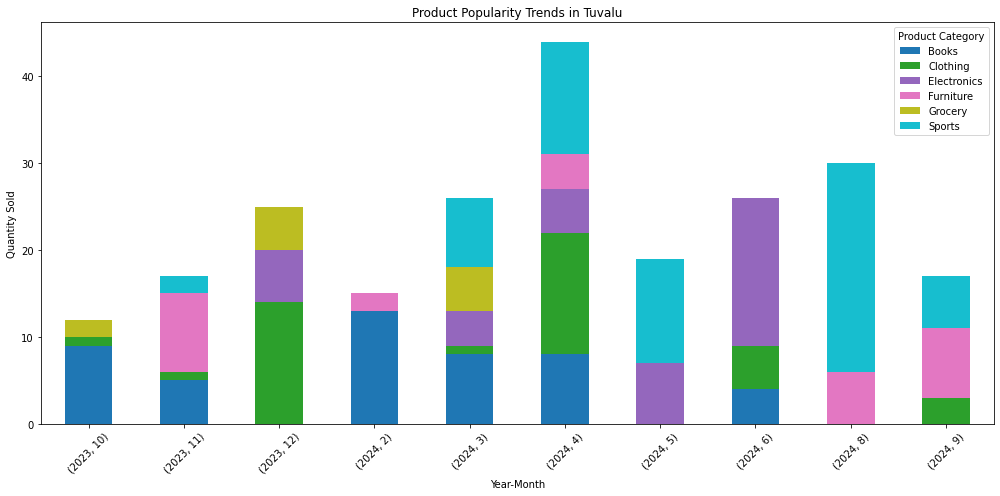

<Figure size 1008x504 with 0 Axes>

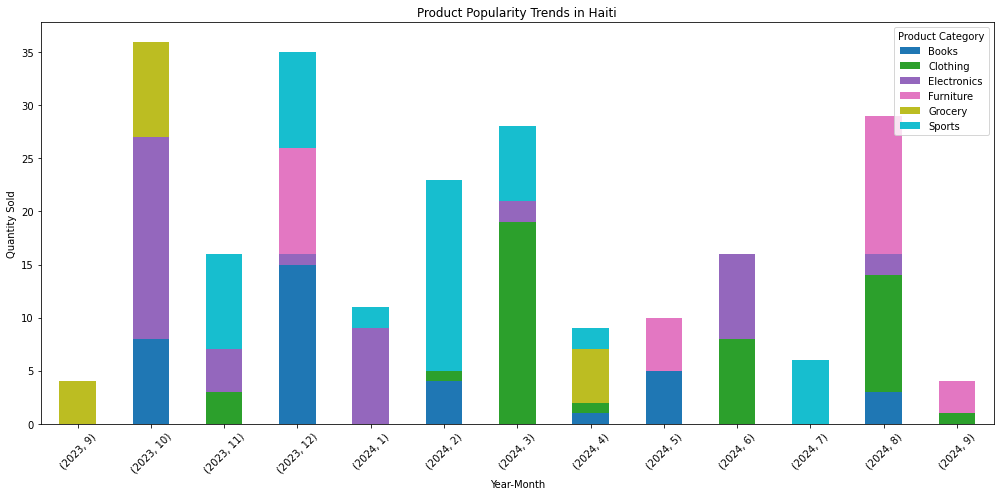

<Figure size 1008x504 with 0 Axes>

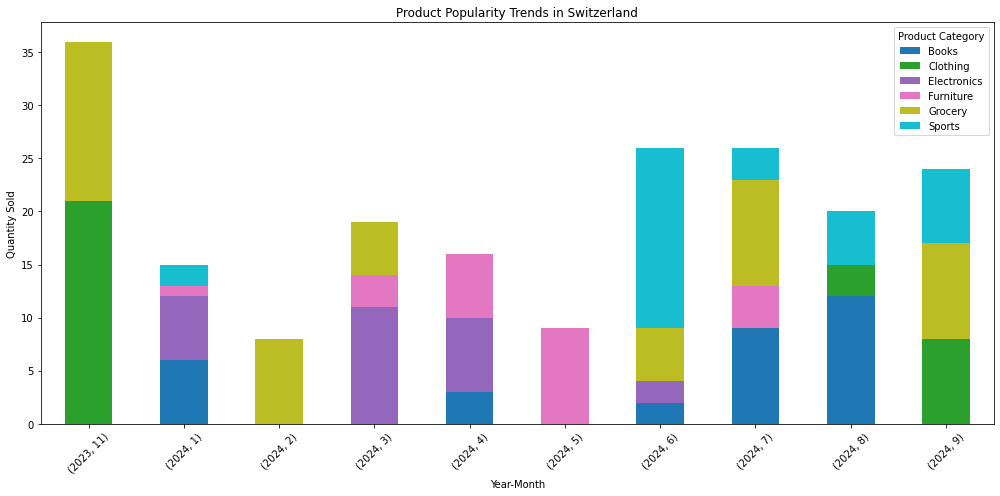

<Figure size 1008x504 with 0 Axes>

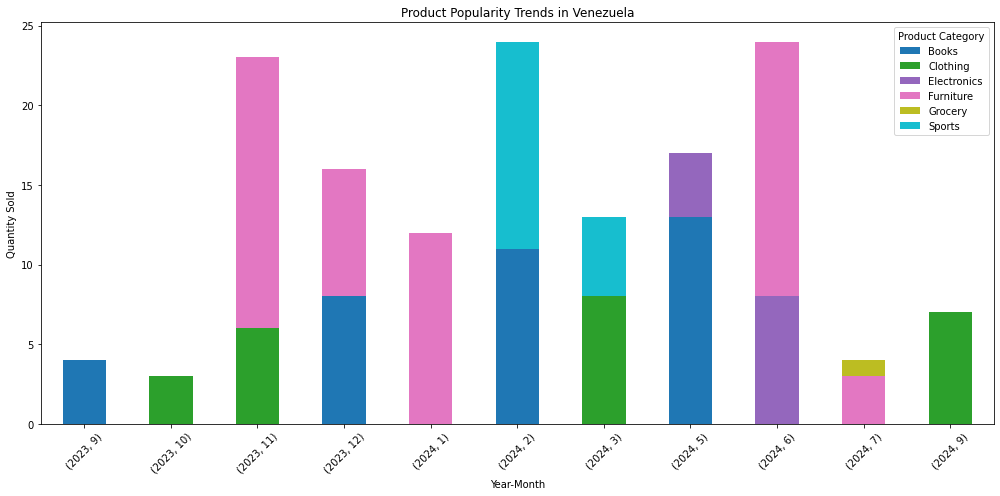

<Figure size 1008x504 with 0 Axes>

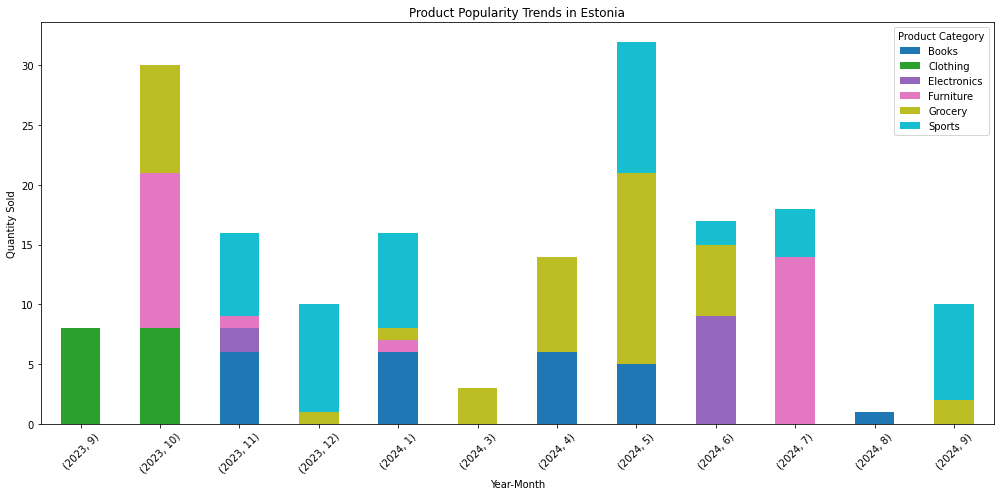

<Figure size 1008x504 with 0 Axes>

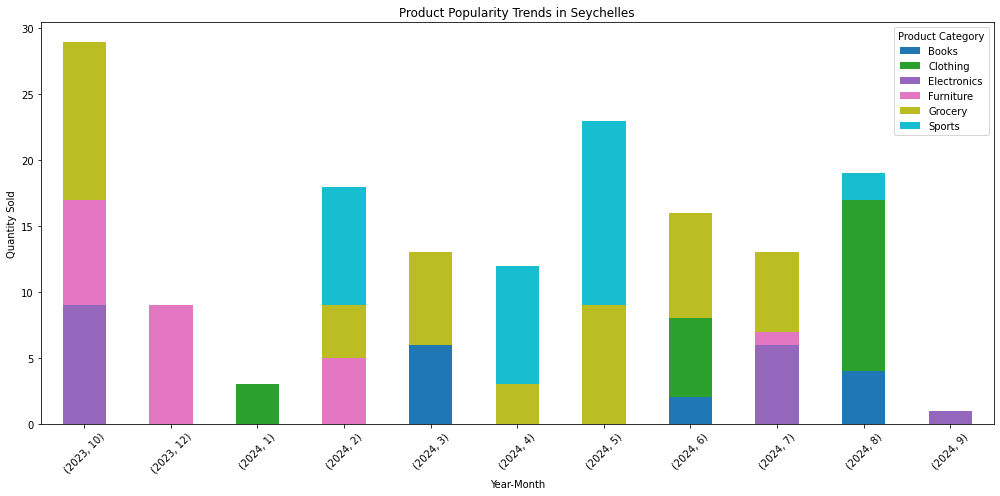

<Figure size 1008x504 with 0 Axes>

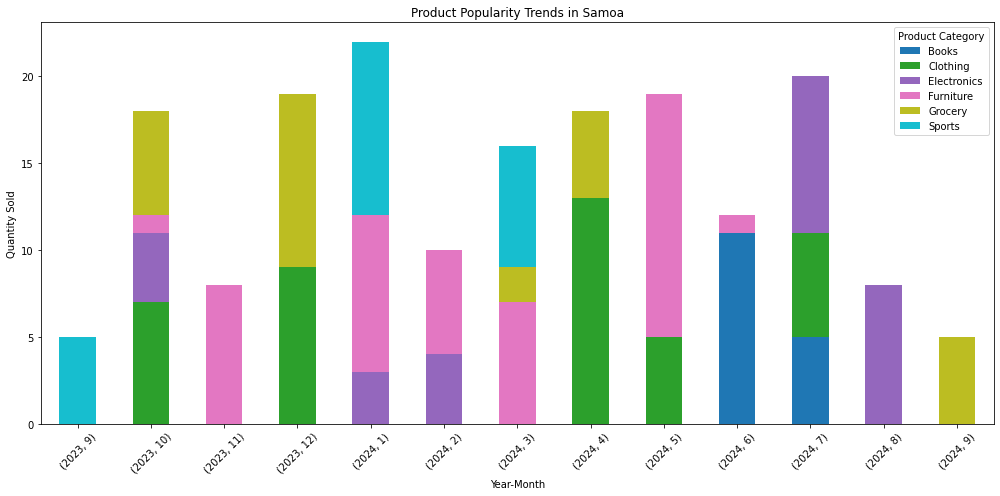

<Figure size 1008x504 with 0 Axes>

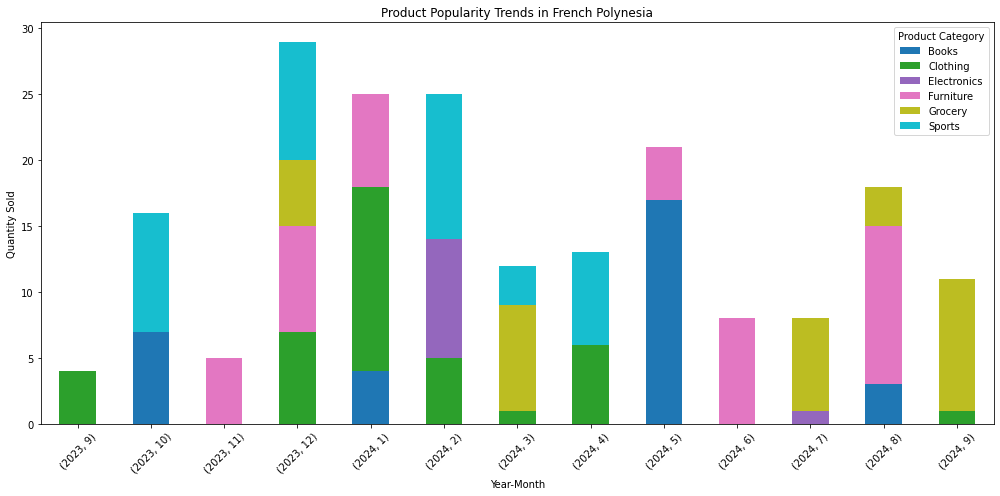

<Figure size 1008x504 with 0 Axes>

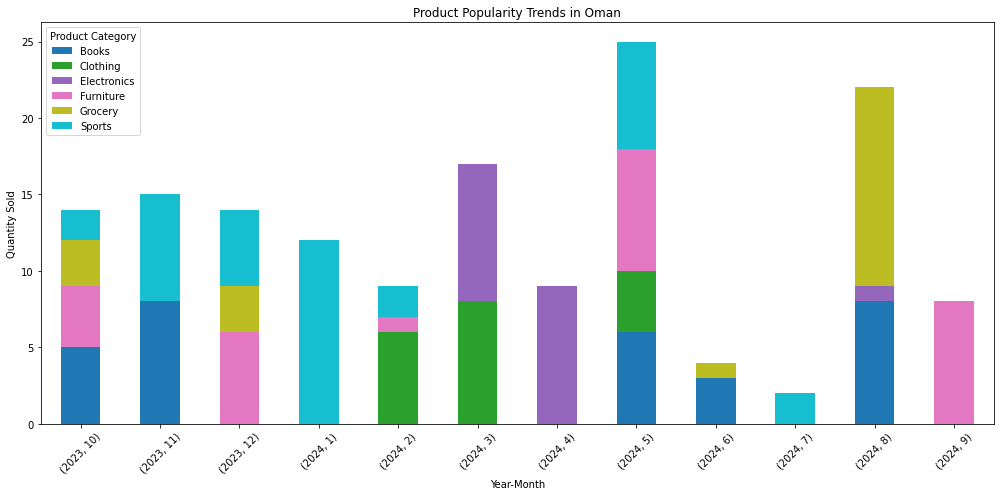

<Figure size 1008x504 with 0 Axes>

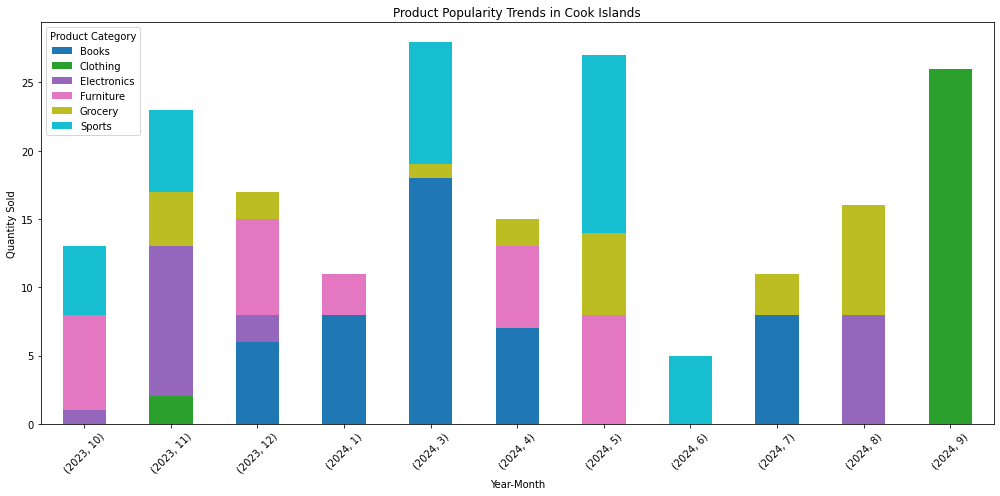

<Figure size 1008x504 with 0 Axes>

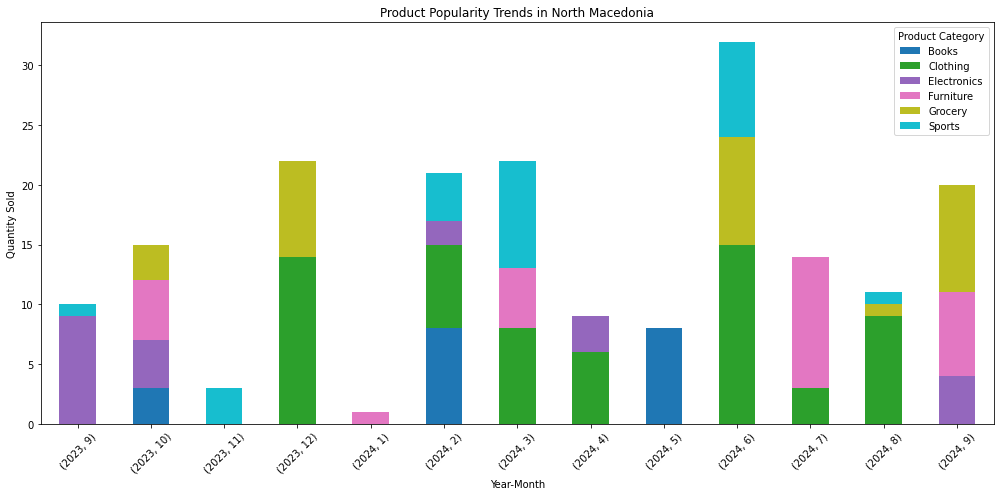

<Figure size 1008x504 with 0 Axes>

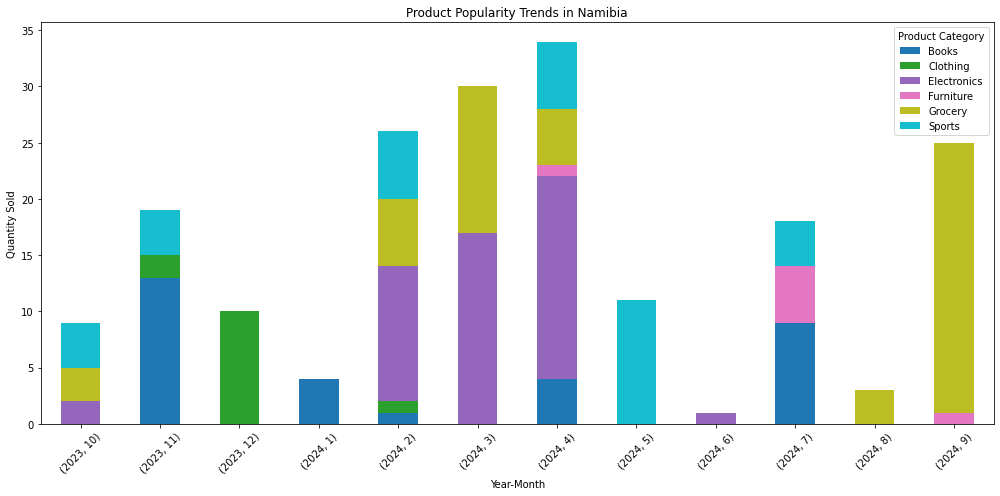

<Figure size 1008x504 with 0 Axes>

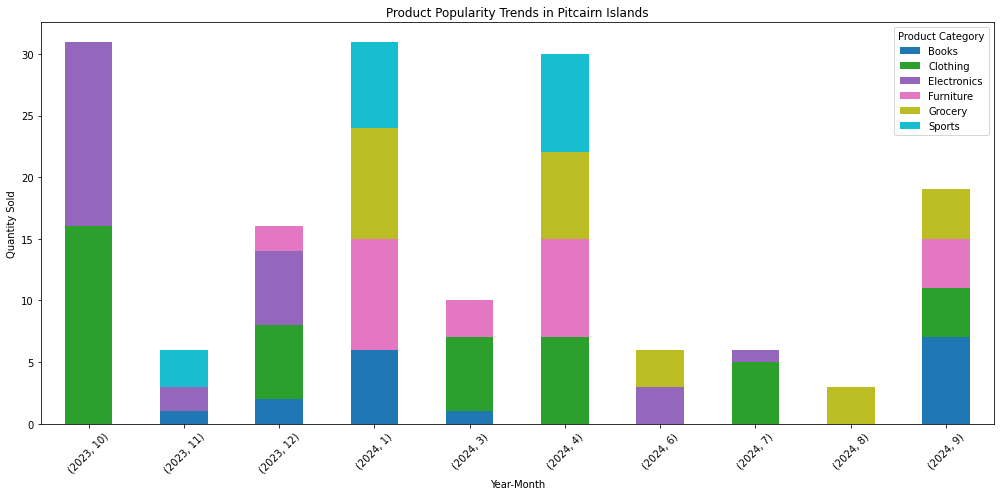

<Figure size 1008x504 with 0 Axes>

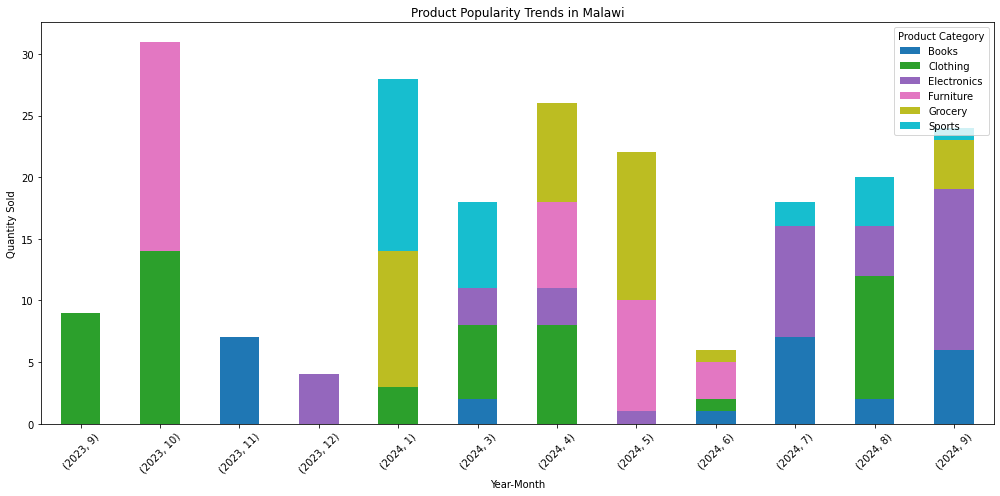

<Figure size 1008x504 with 0 Axes>

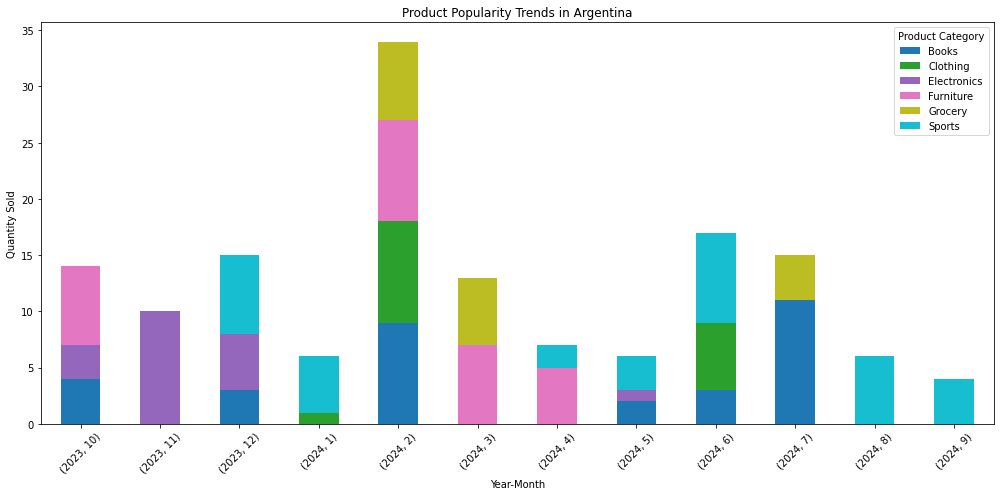

<Figure size 1008x504 with 0 Axes>

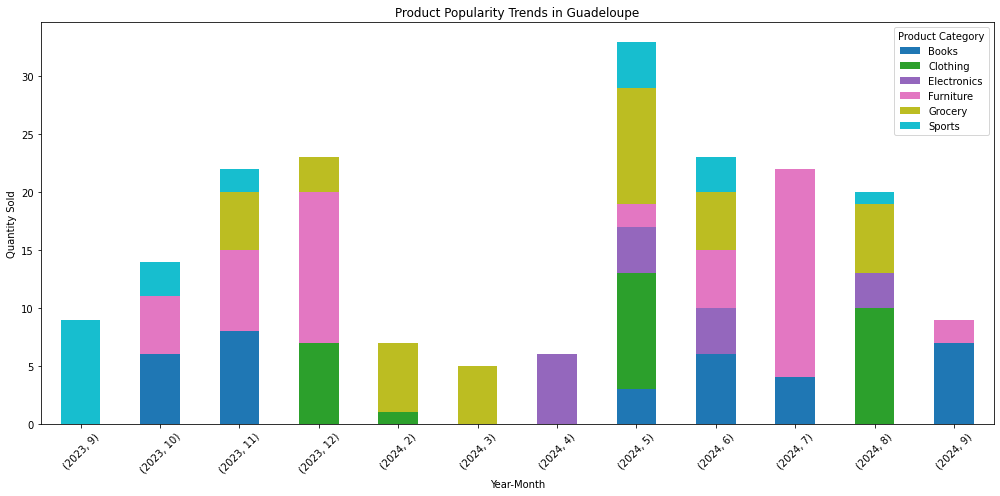

<Figure size 1008x504 with 0 Axes>

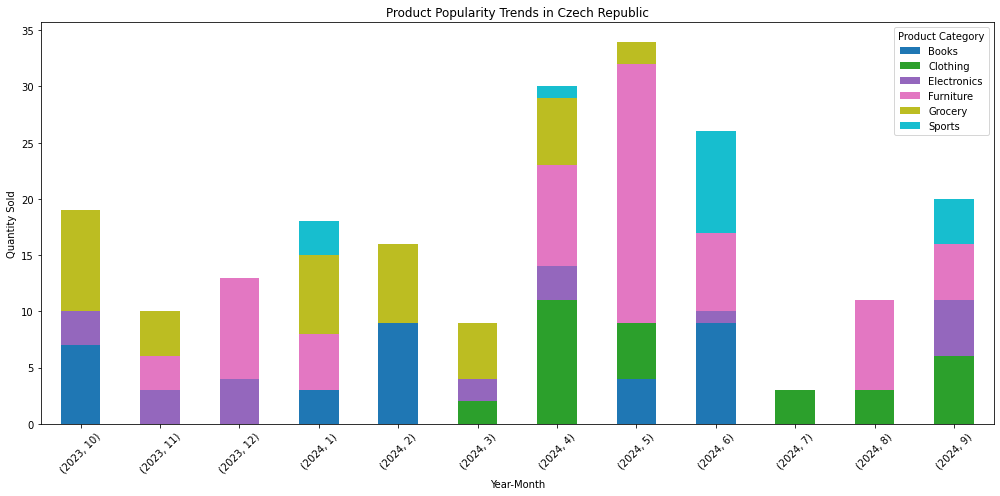

<Figure size 1008x504 with 0 Axes>

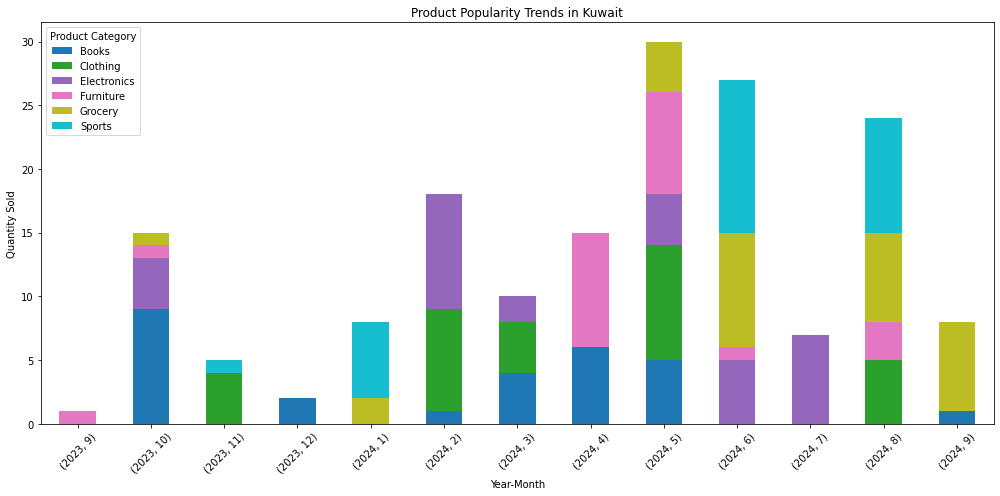

<Figure size 1008x504 with 0 Axes>

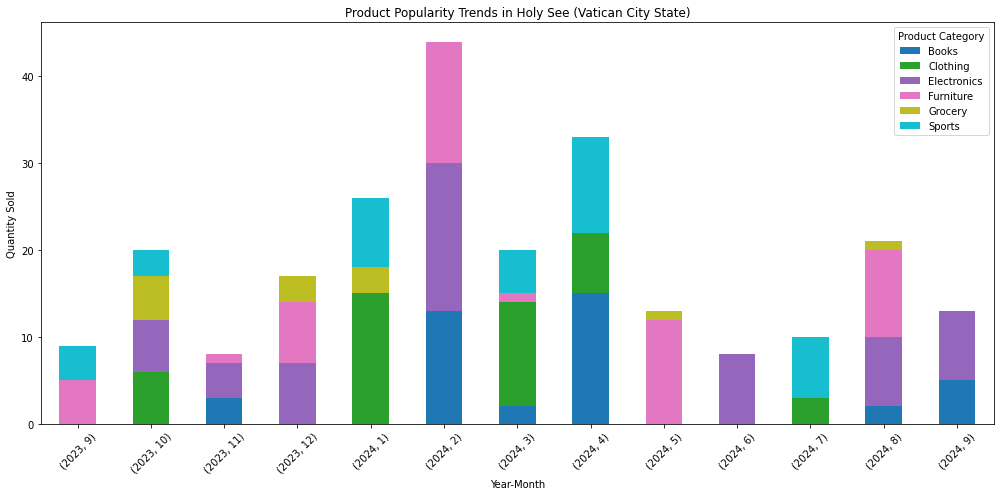

<Figure size 1008x504 with 0 Axes>

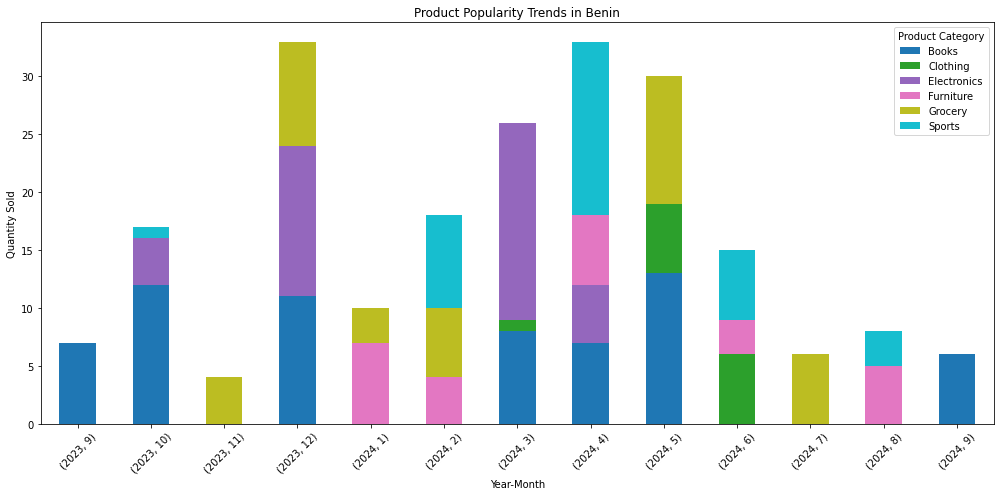

<Figure size 1008x504 with 0 Axes>

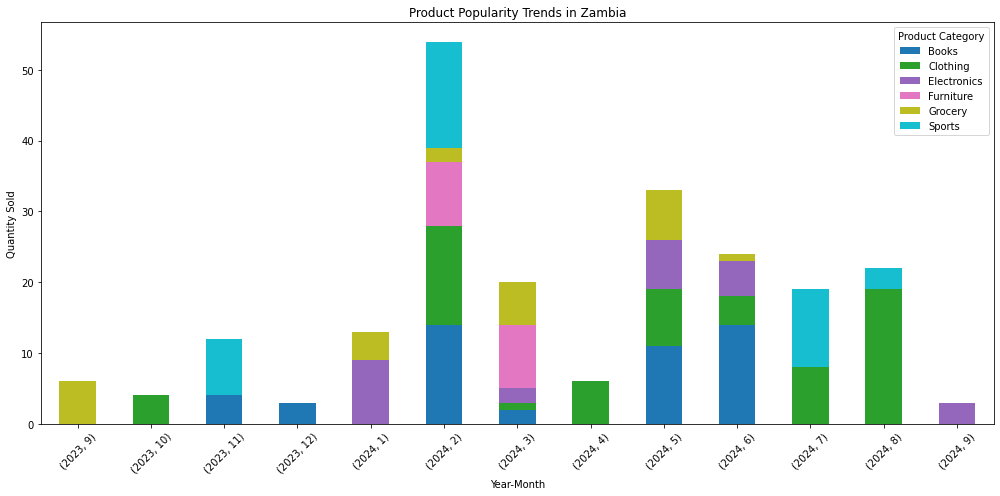

<Figure size 1008x504 with 0 Axes>

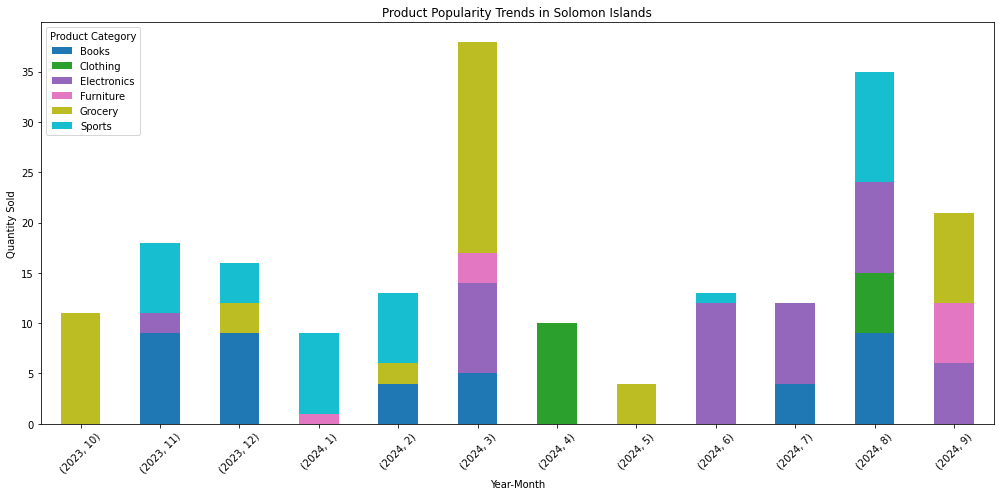

<Figure size 1008x504 with 0 Axes>

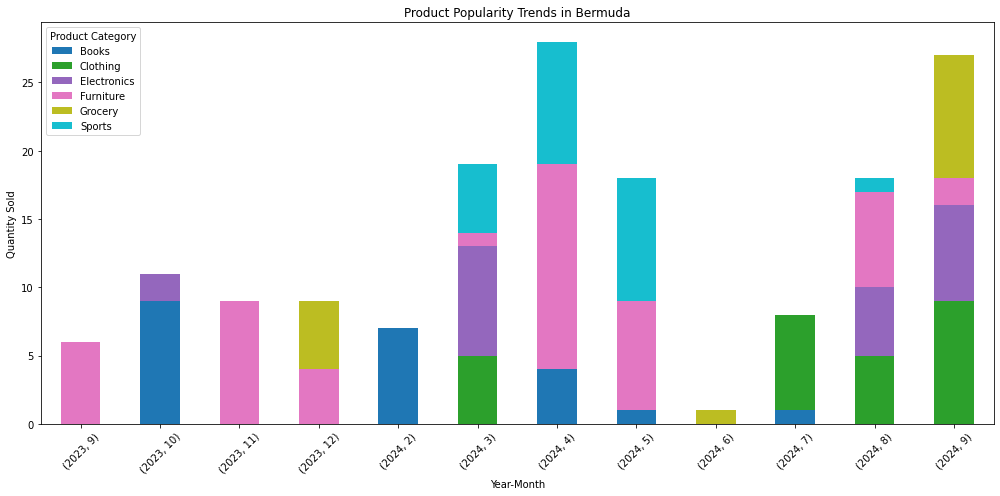

<Figure size 1008x504 with 0 Axes>

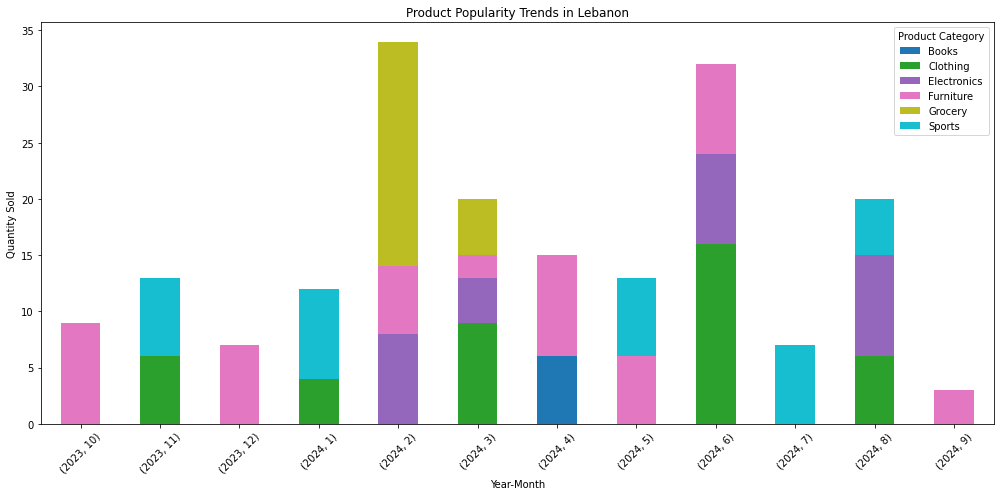

<Figure size 1008x504 with 0 Axes>

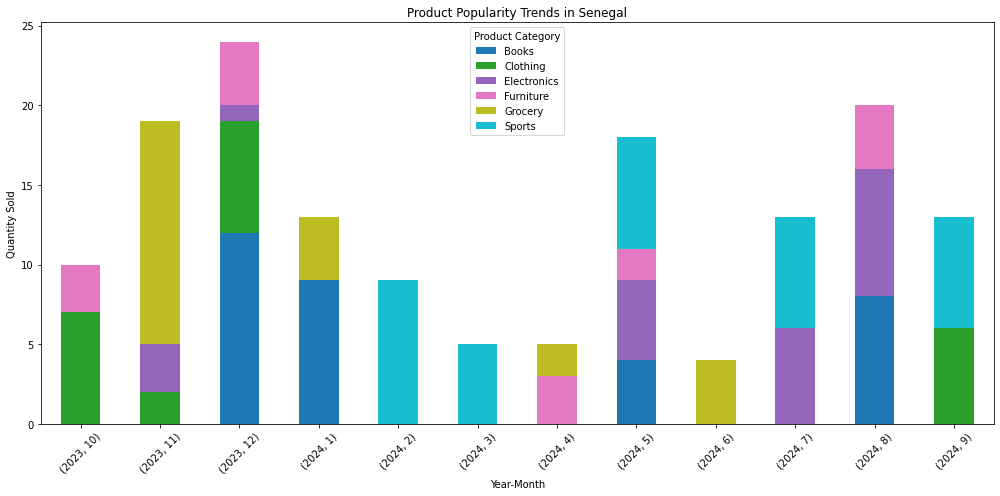

<Figure size 1008x504 with 0 Axes>

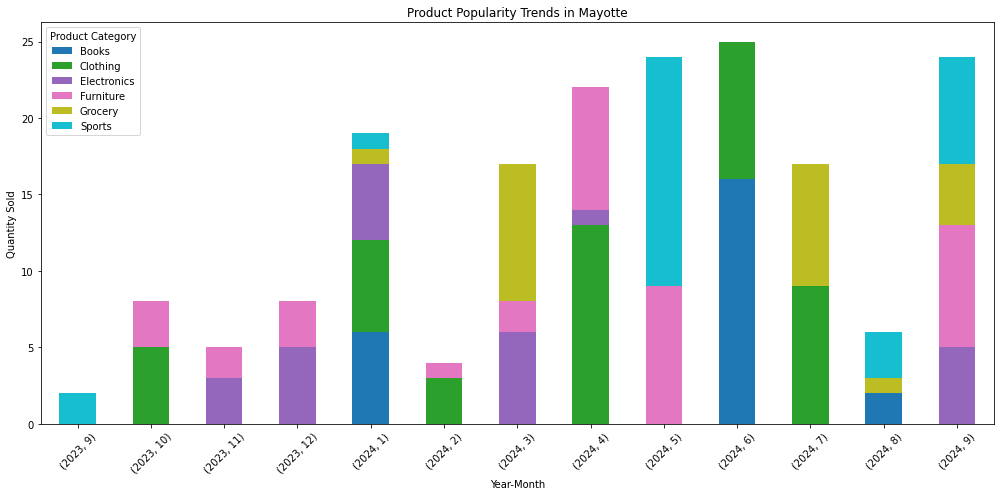

<Figure size 1008x504 with 0 Axes>

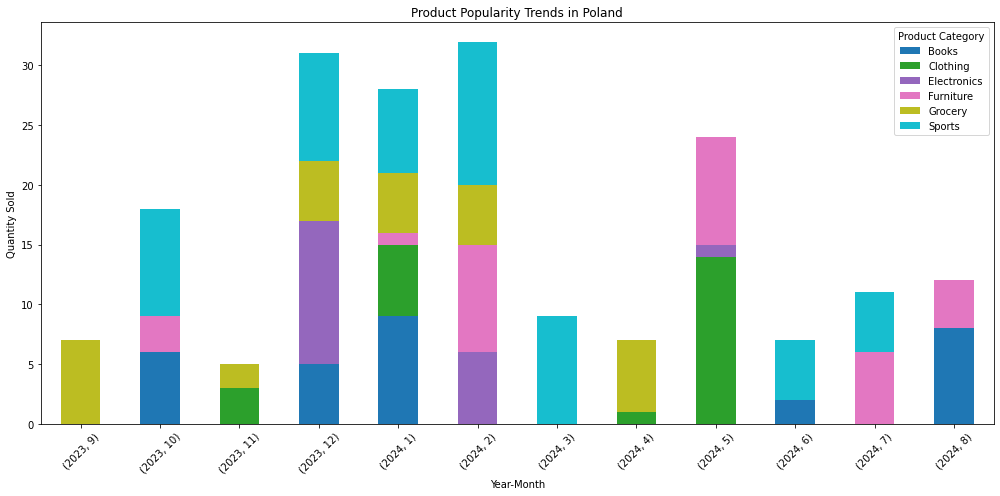

<Figure size 1008x504 with 0 Axes>

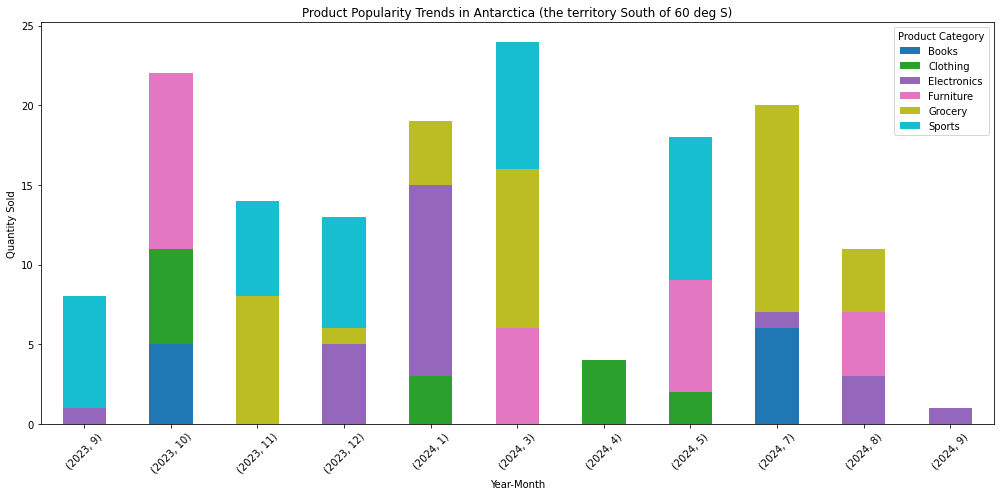

<Figure size 1008x504 with 0 Axes>

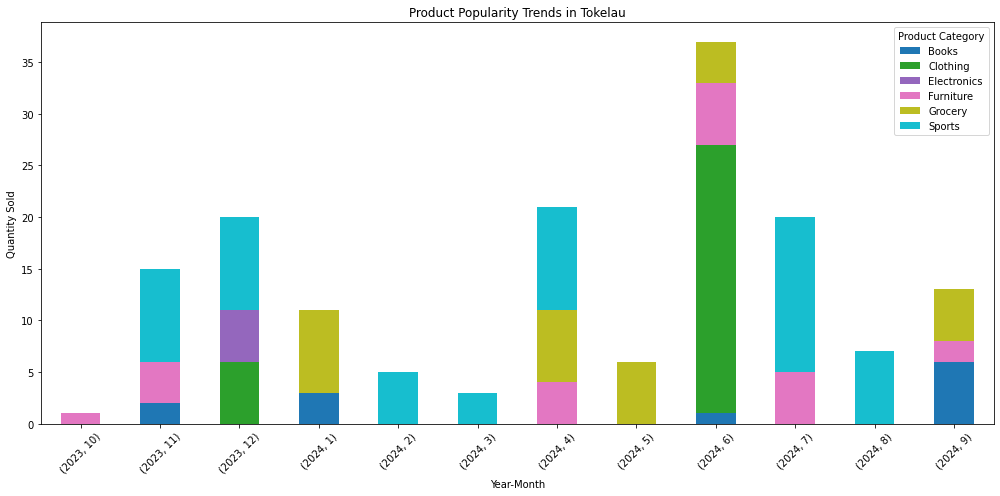

<Figure size 1008x504 with 0 Axes>

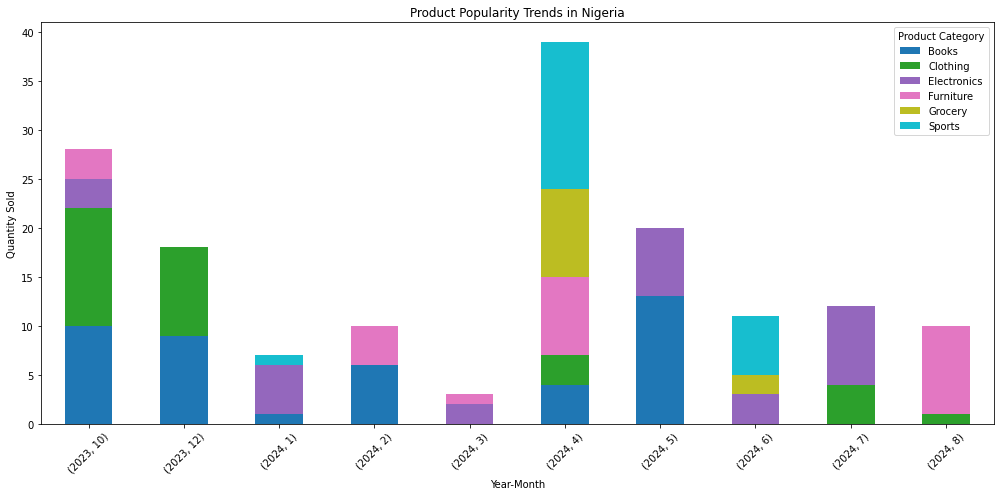

<Figure size 1008x504 with 0 Axes>

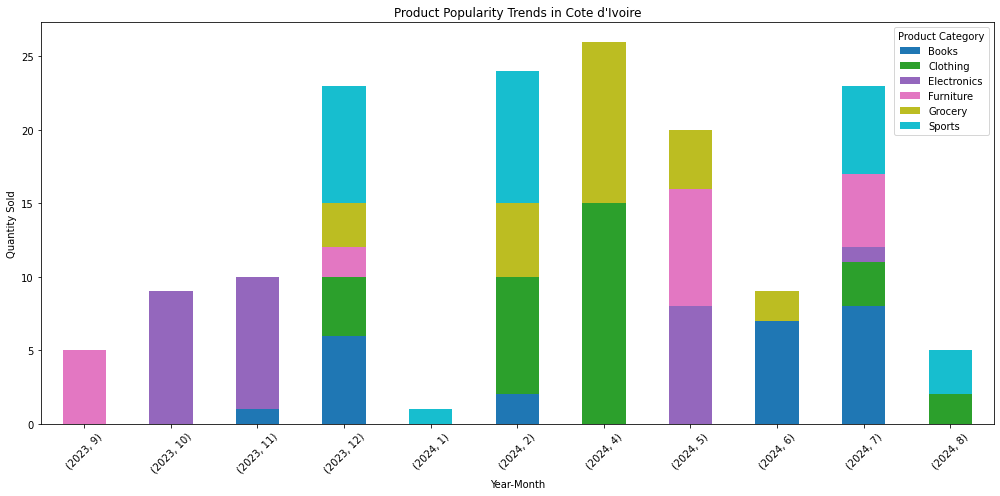

<Figure size 1008x504 with 0 Axes>

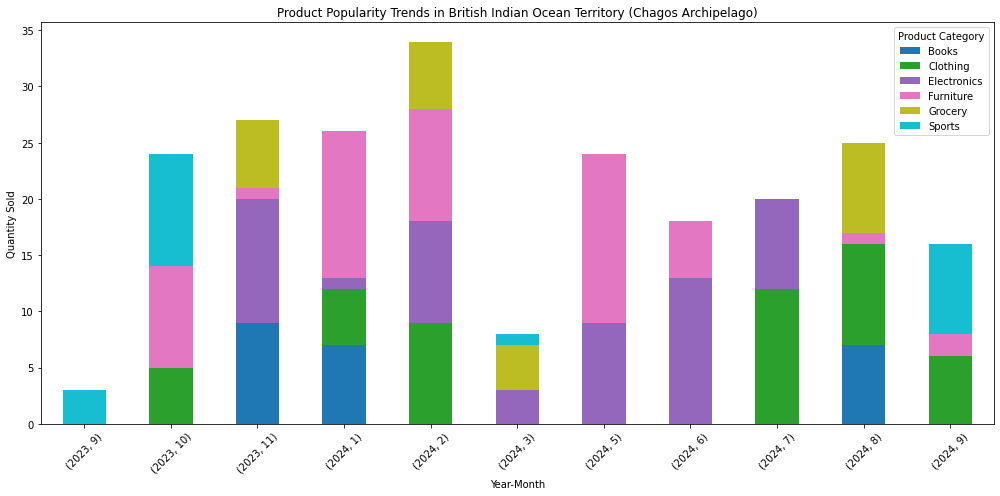

<Figure size 1008x504 with 0 Axes>

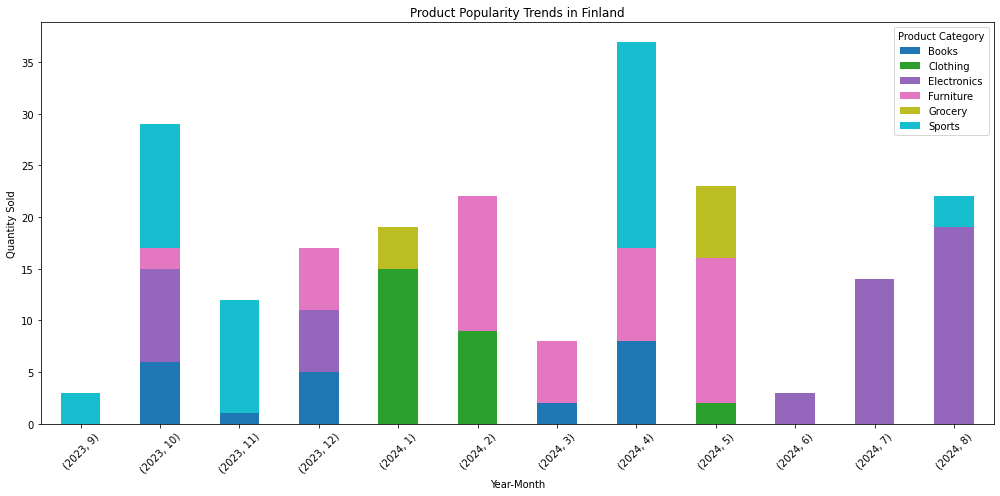

<Figure size 1008x504 with 0 Axes>

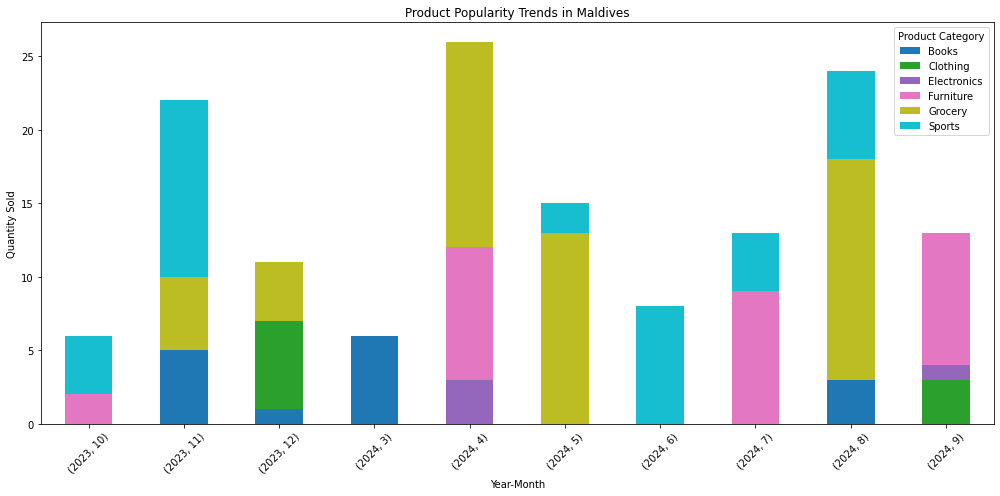

<Figure size 1008x504 with 0 Axes>

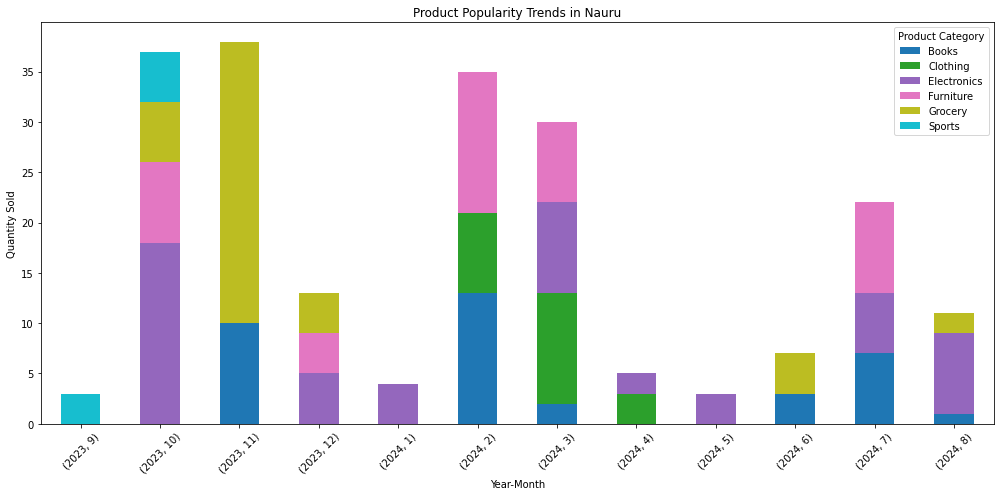

<Figure size 1008x504 with 0 Axes>

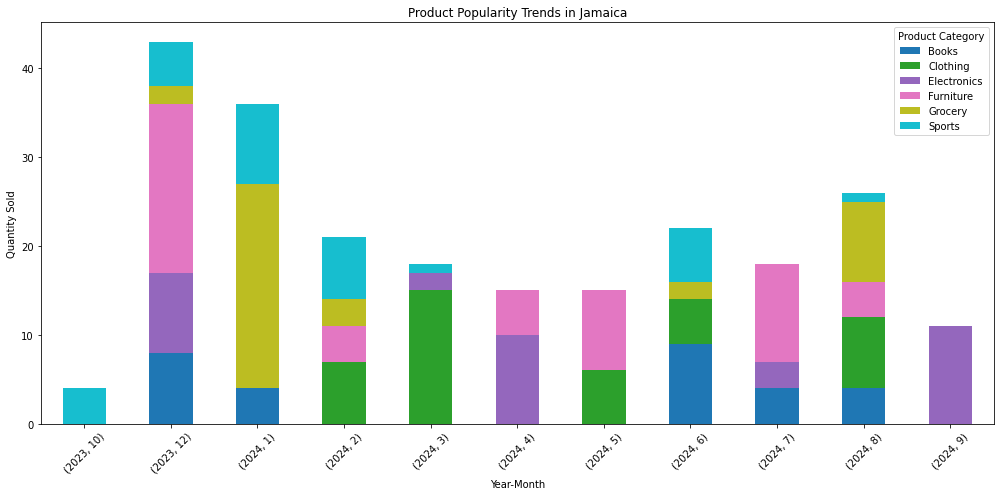

<Figure size 1008x504 with 0 Axes>

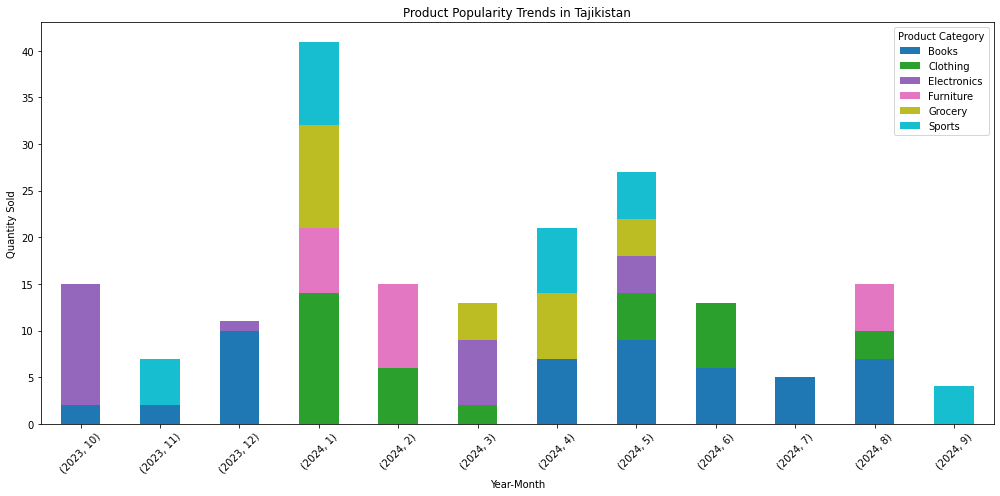

<Figure size 1008x504 with 0 Axes>

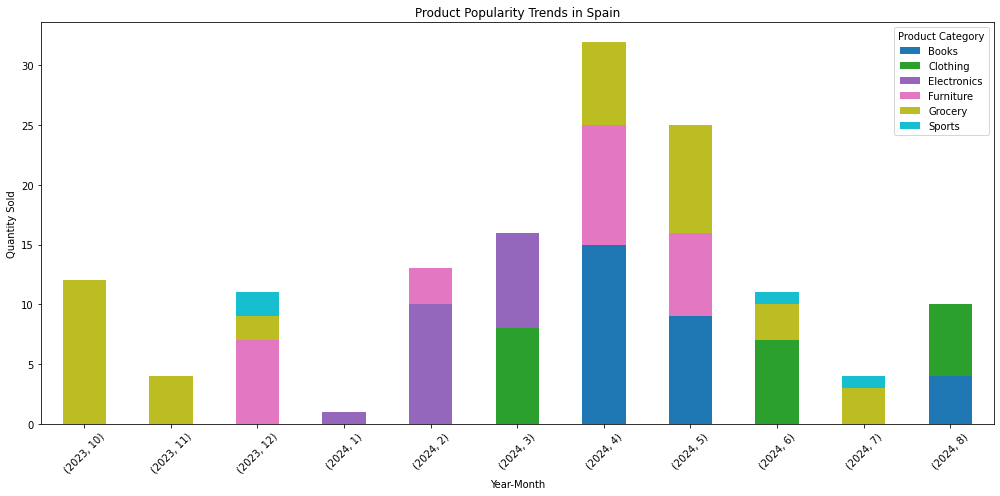

<Figure size 1008x504 with 0 Axes>

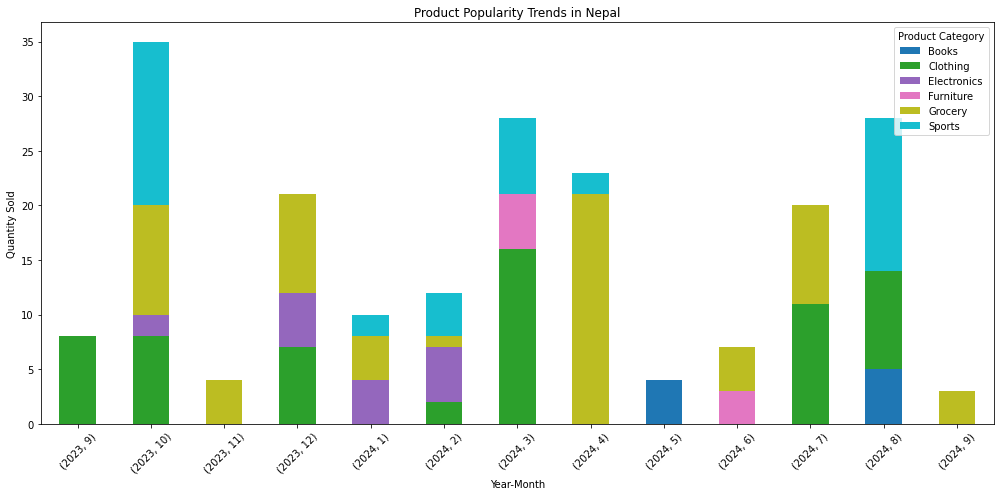

<Figure size 1008x504 with 0 Axes>

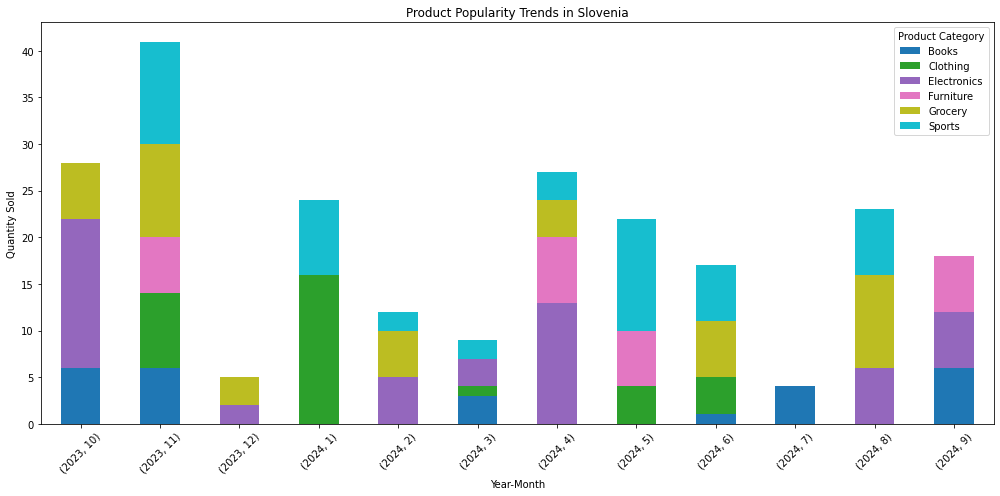

<Figure size 1008x504 with 0 Axes>

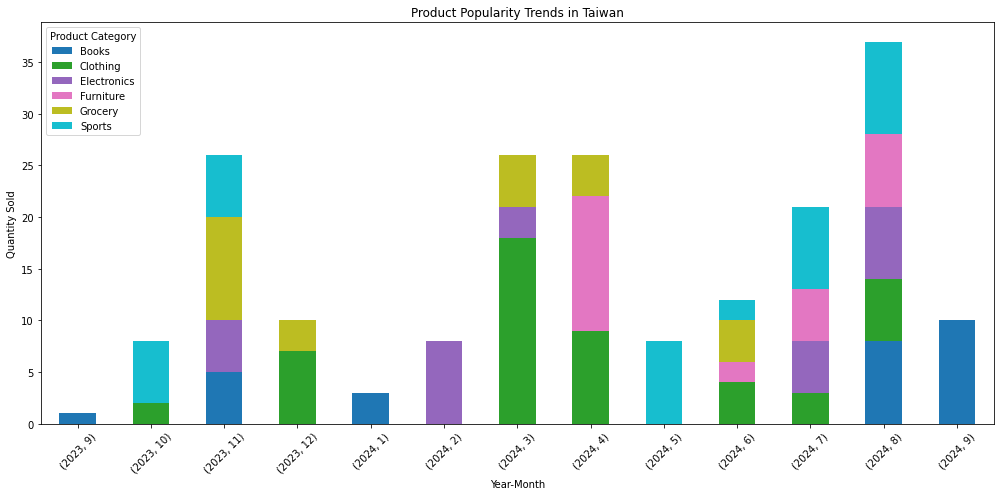

<Figure size 1008x504 with 0 Axes>

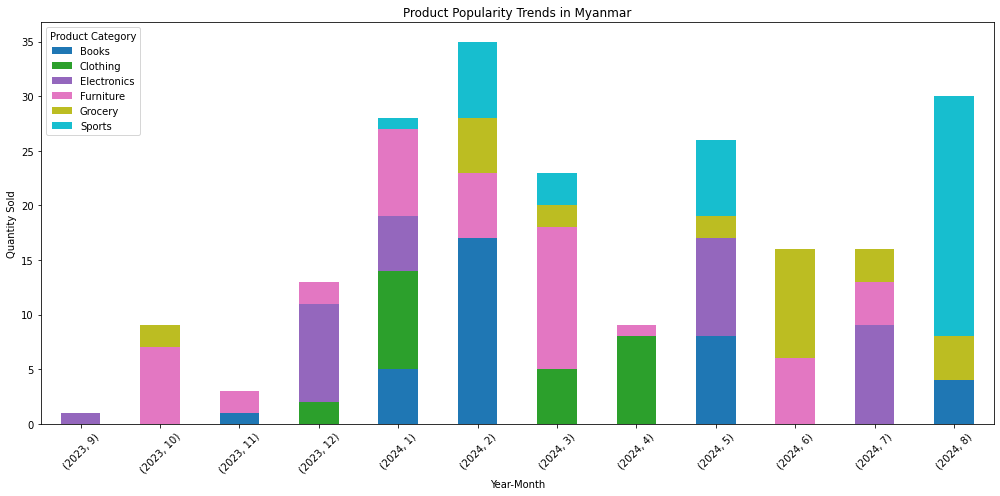

<Figure size 1008x504 with 0 Axes>

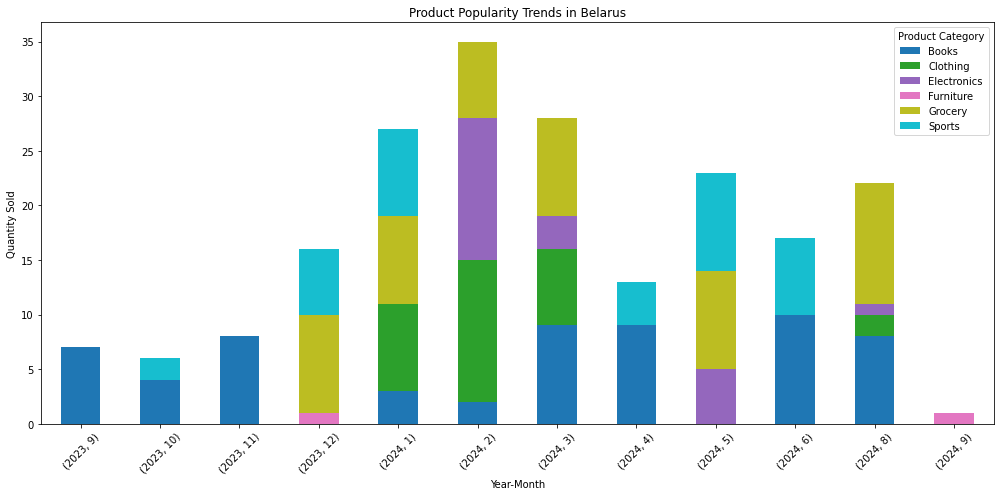

<Figure size 1008x504 with 0 Axes>

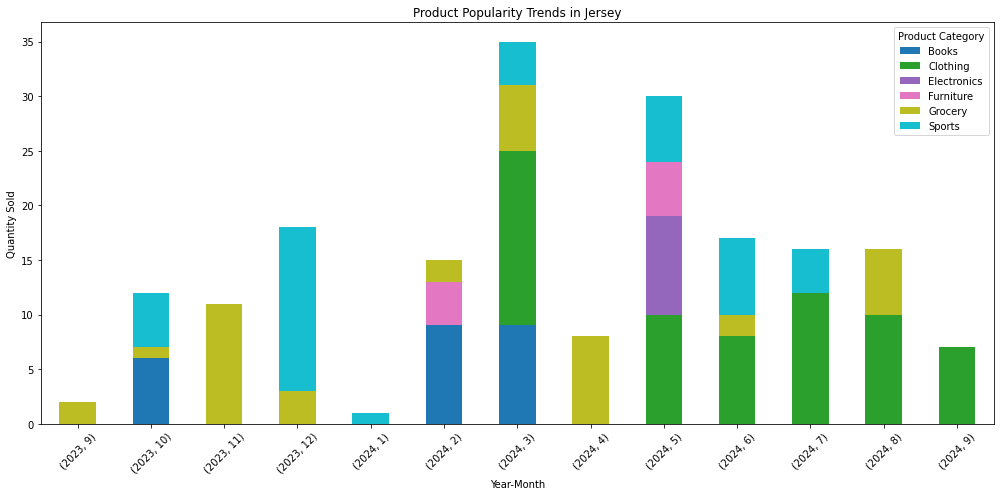

<Figure size 1008x504 with 0 Axes>

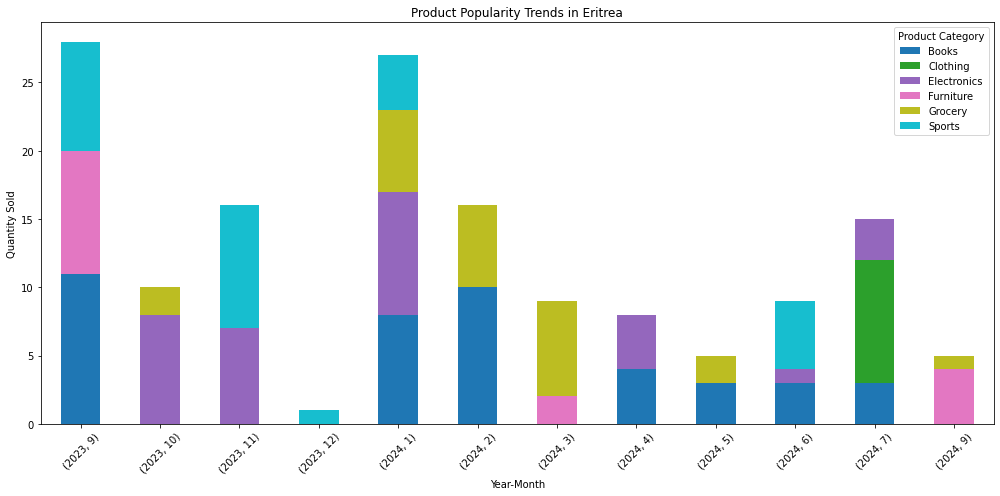

<Figure size 1008x504 with 0 Axes>

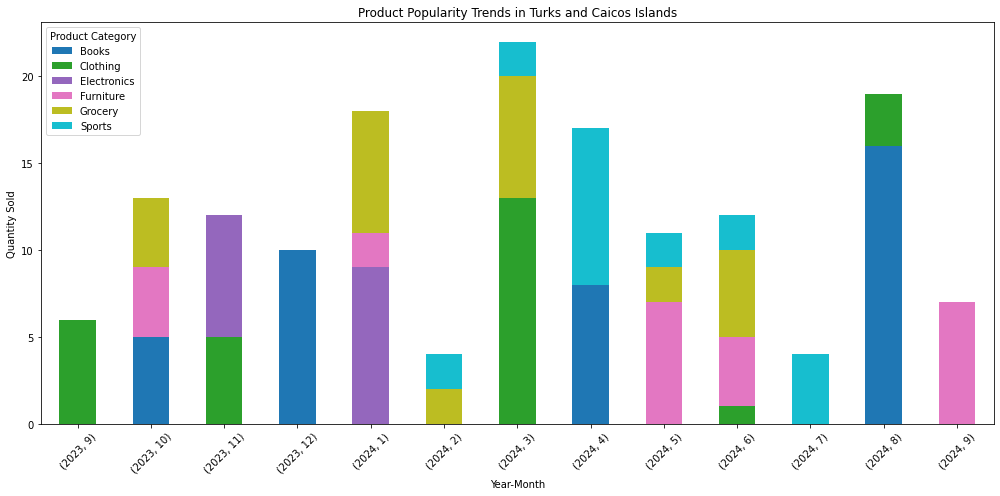

<Figure size 1008x504 with 0 Axes>

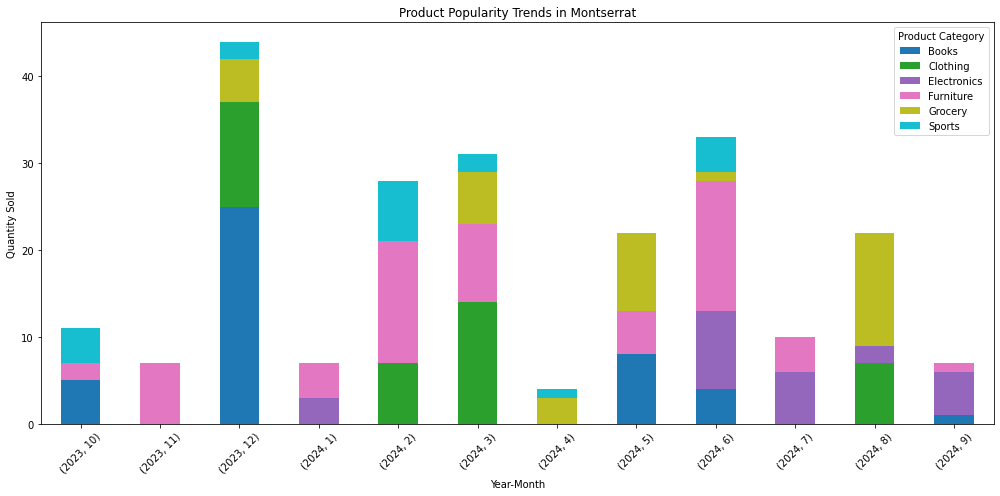

<Figure size 1008x504 with 0 Axes>

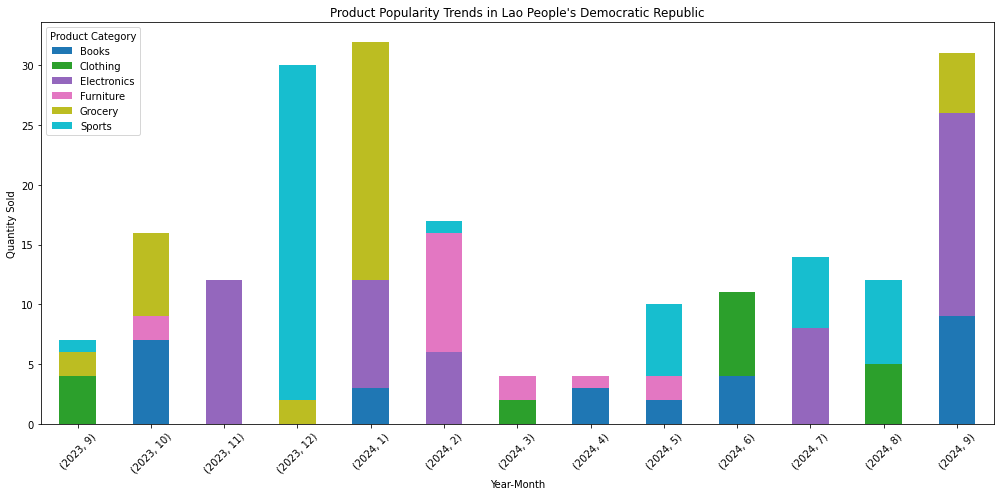

<Figure size 1008x504 with 0 Axes>

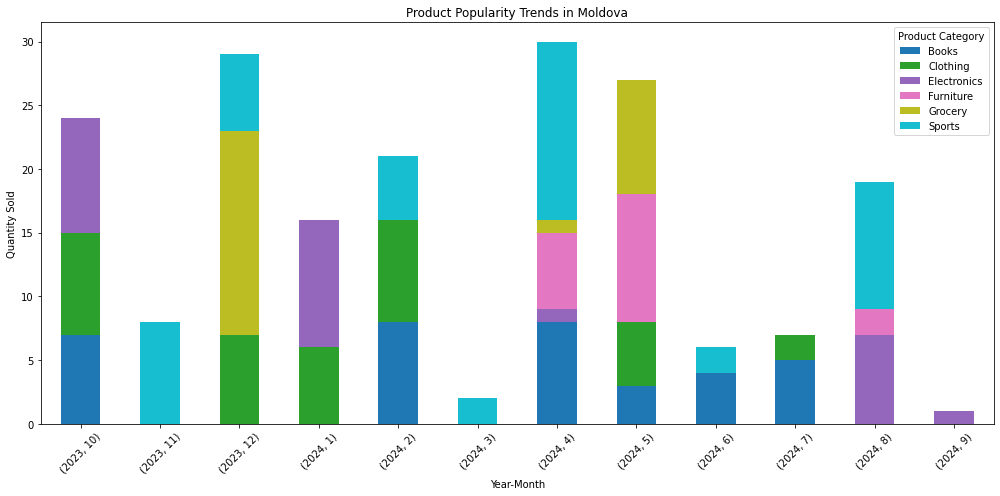

<Figure size 1008x504 with 0 Axes>

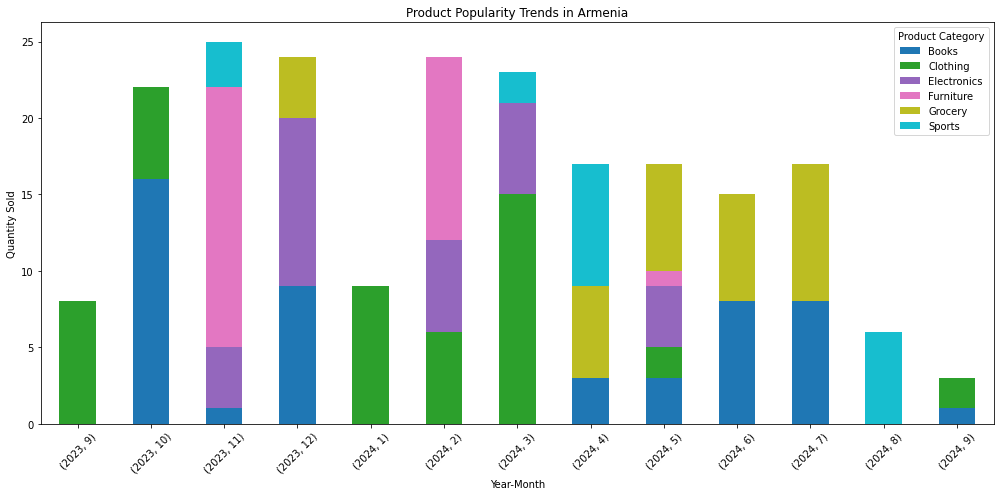

<Figure size 1008x504 with 0 Axes>

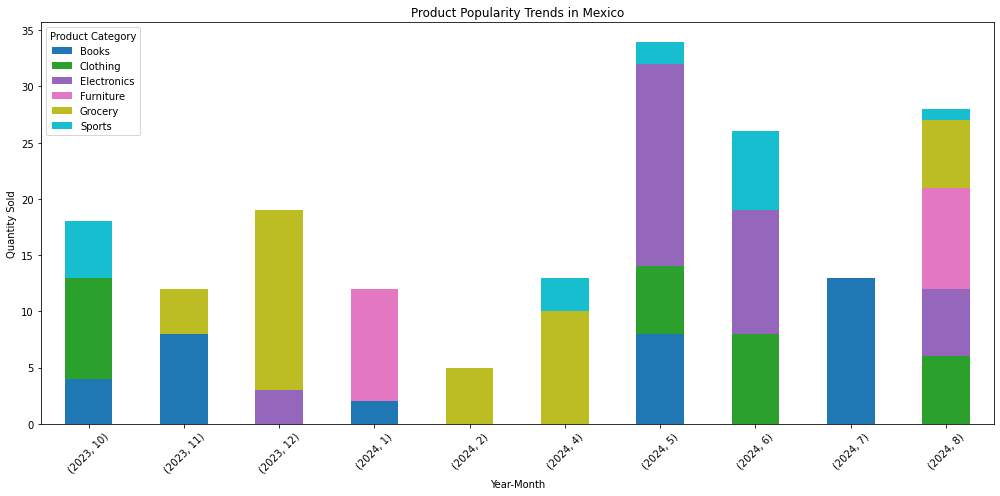

<Figure size 1008x504 with 0 Axes>

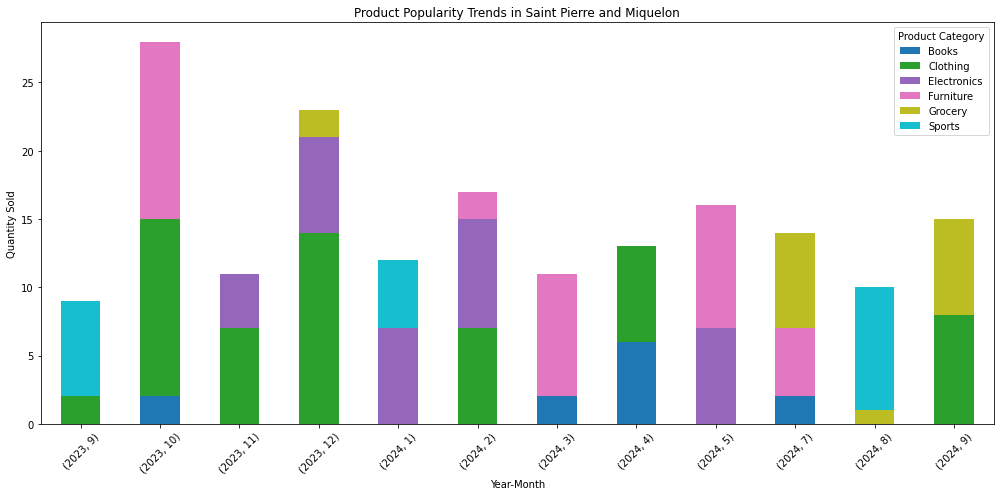

<Figure size 1008x504 with 0 Axes>

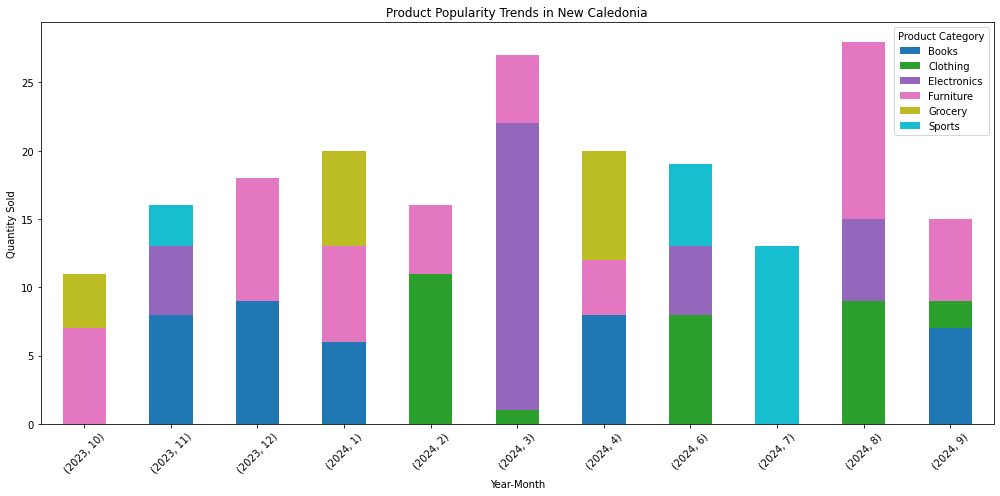

<Figure size 1008x504 with 0 Axes>

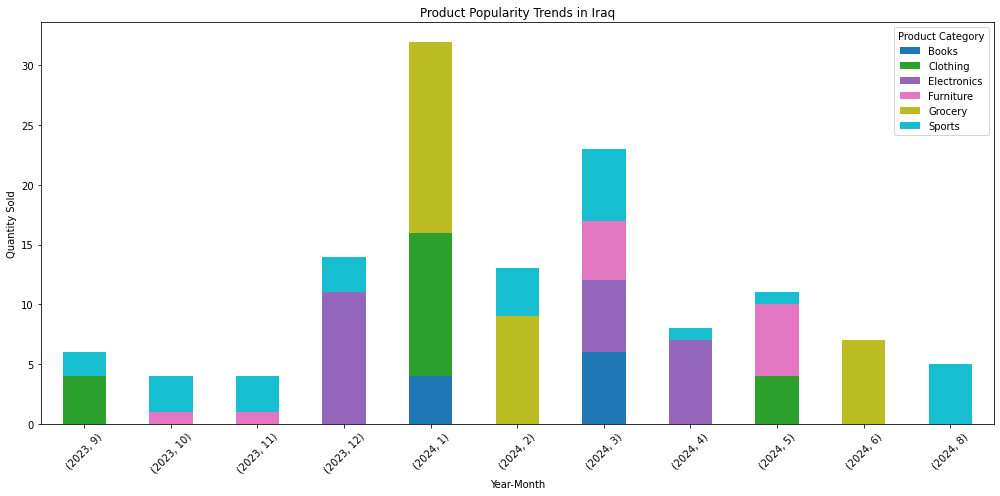

<Figure size 1008x504 with 0 Axes>

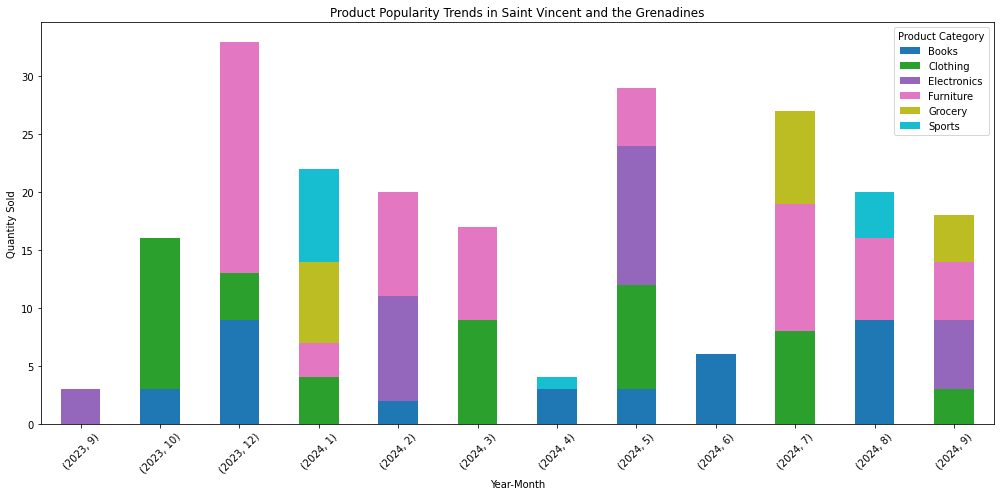

<Figure size 1008x504 with 0 Axes>

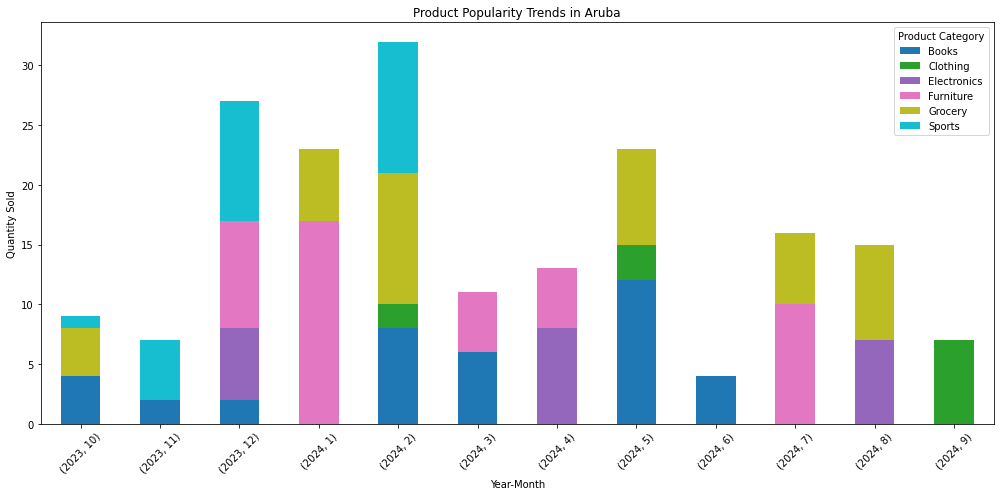

<Figure size 1008x504 with 0 Axes>

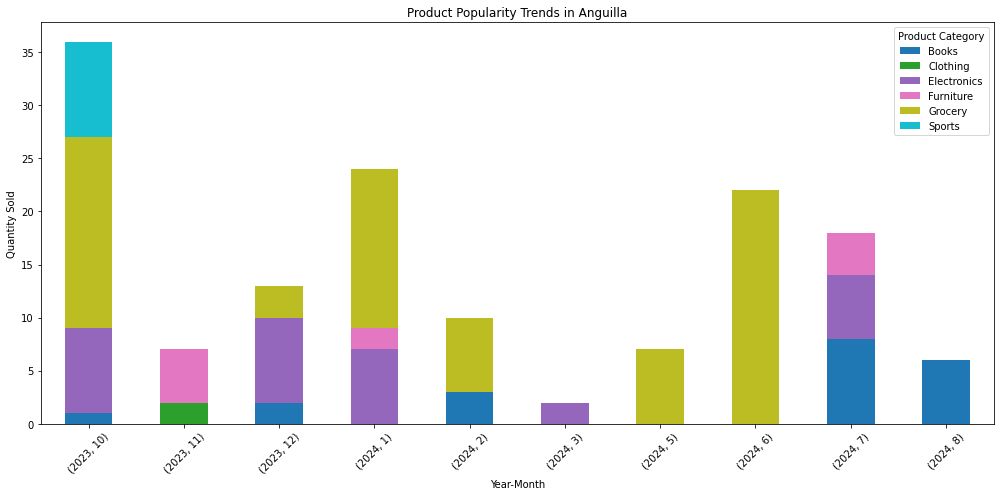

<Figure size 1008x504 with 0 Axes>

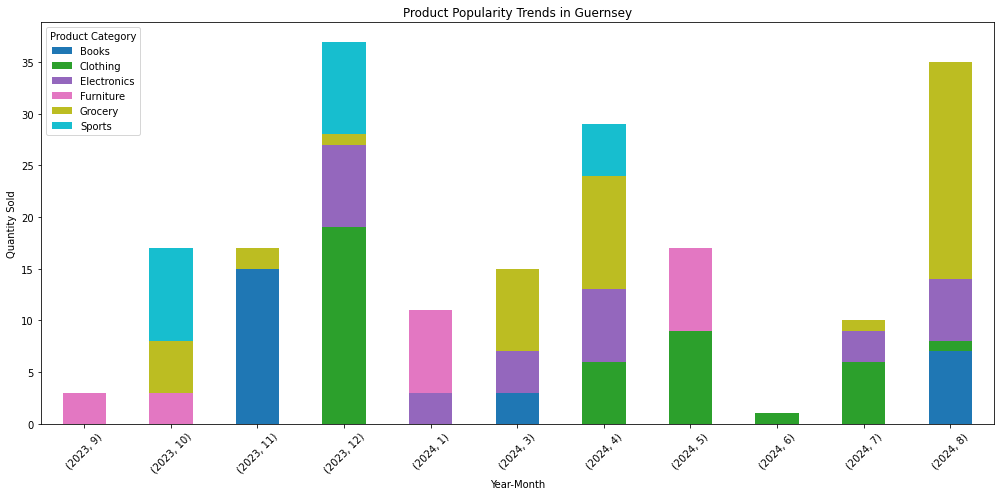

<Figure size 1008x504 with 0 Axes>

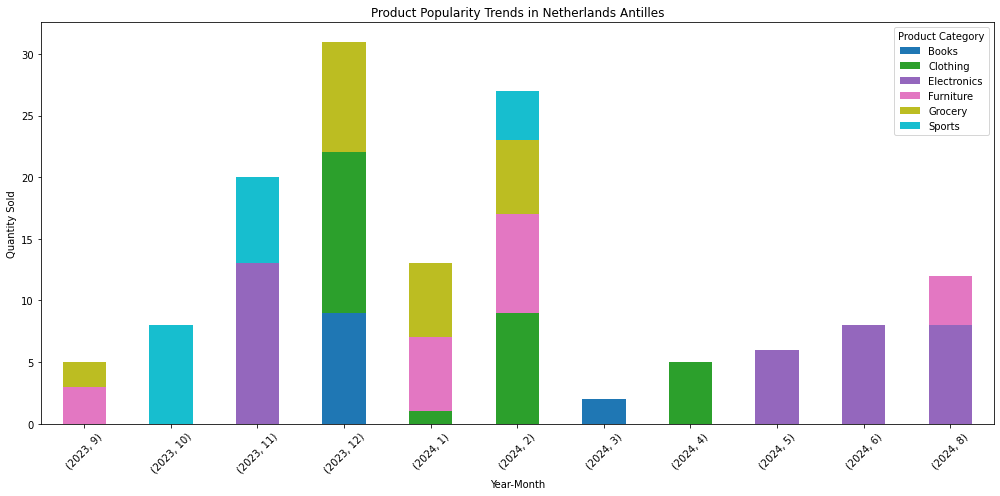

<Figure size 1008x504 with 0 Axes>

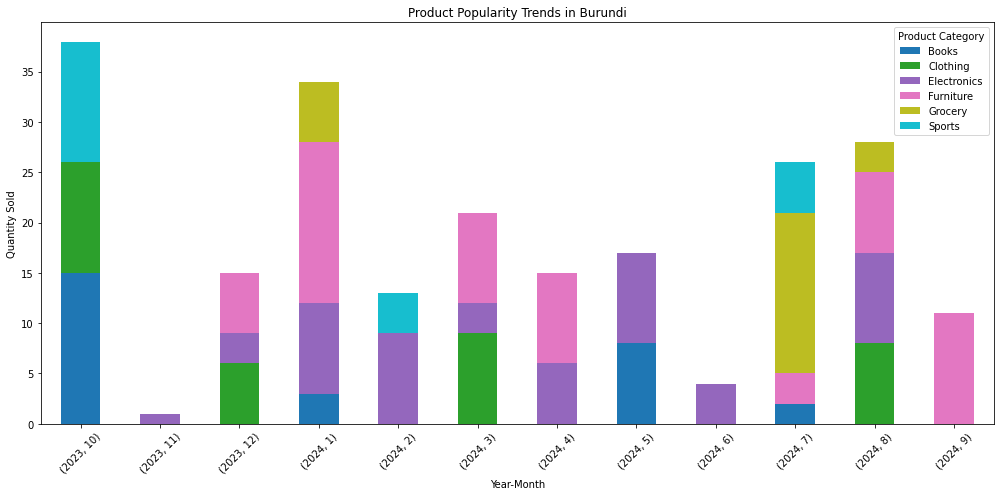

<Figure size 1008x504 with 0 Axes>

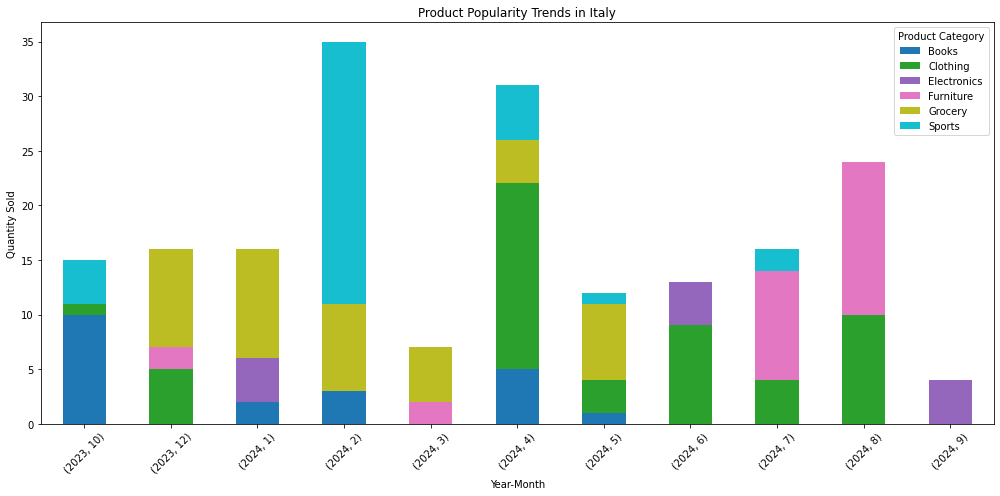

<Figure size 1008x504 with 0 Axes>

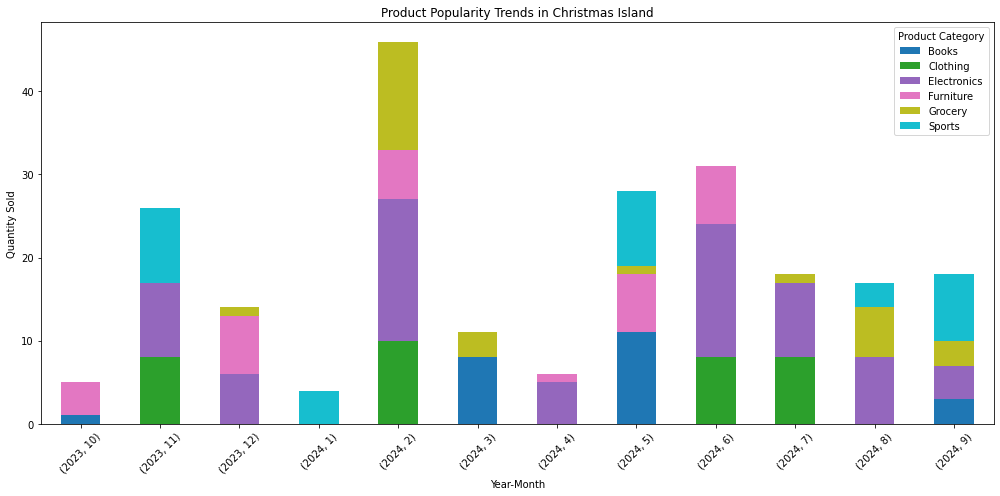

<Figure size 1008x504 with 0 Axes>

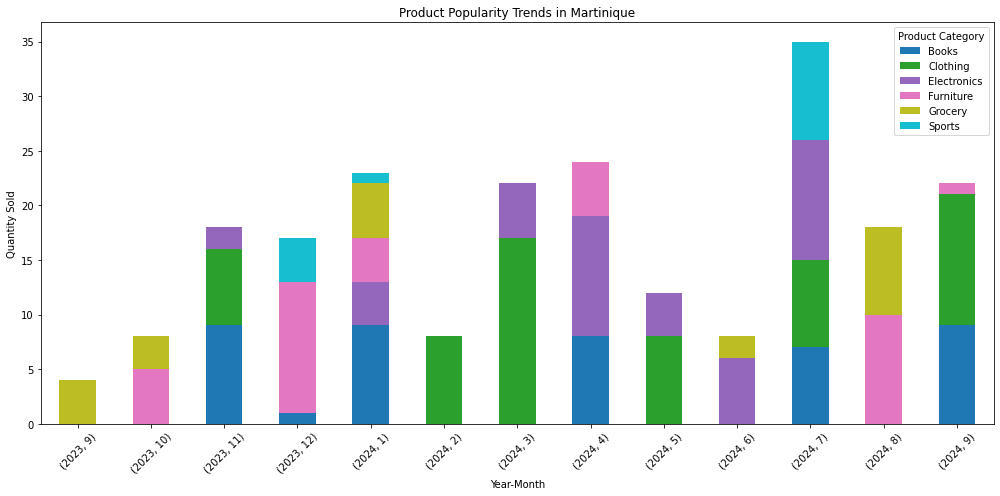

<Figure size 1008x504 with 0 Axes>

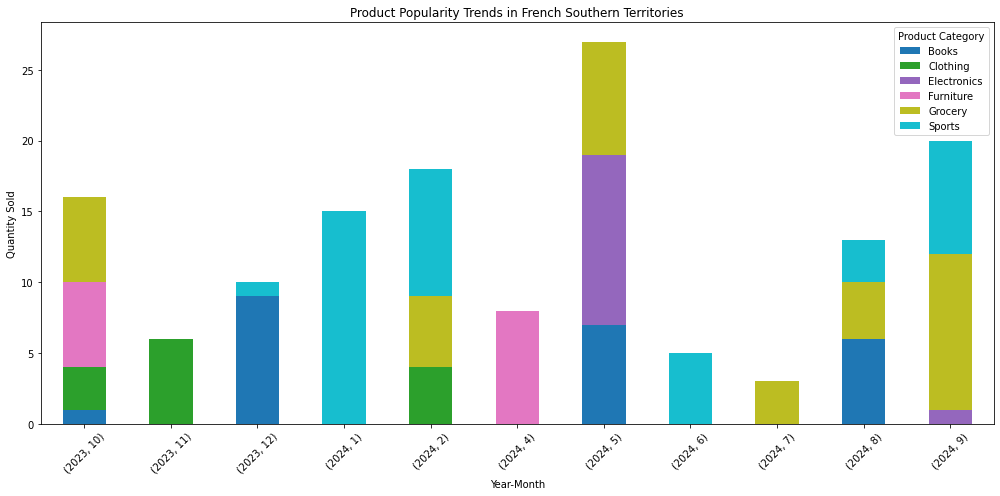

<Figure size 1008x504 with 0 Axes>

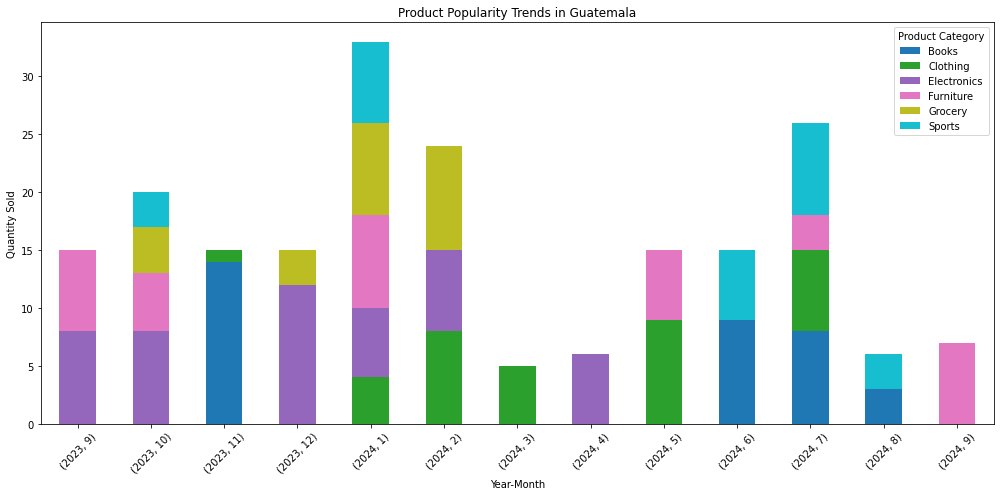

<Figure size 1008x504 with 0 Axes>

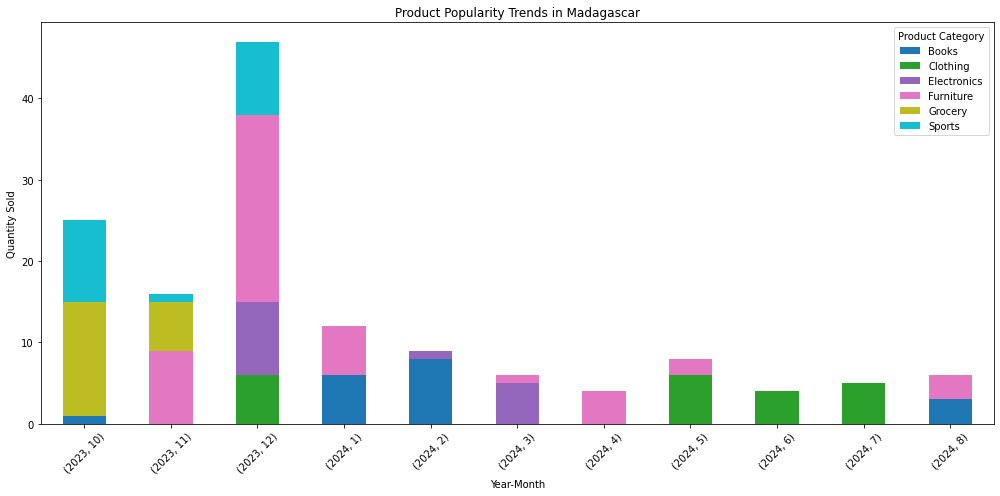

<Figure size 1008x504 with 0 Axes>

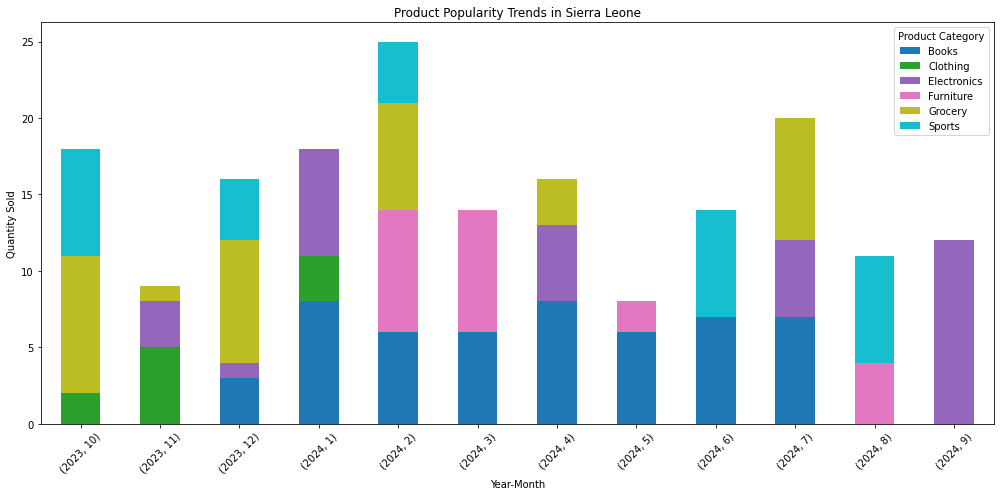

<Figure size 1008x504 with 0 Axes>

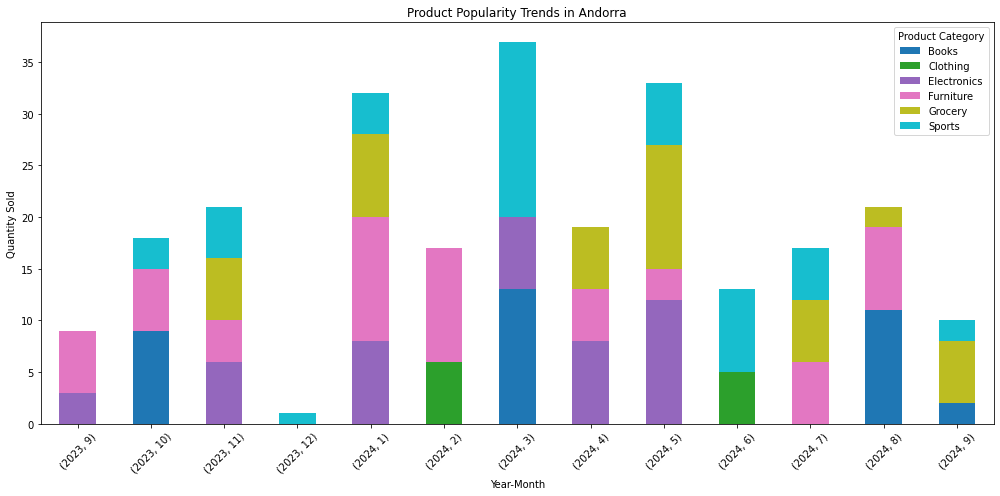

<Figure size 1008x504 with 0 Axes>

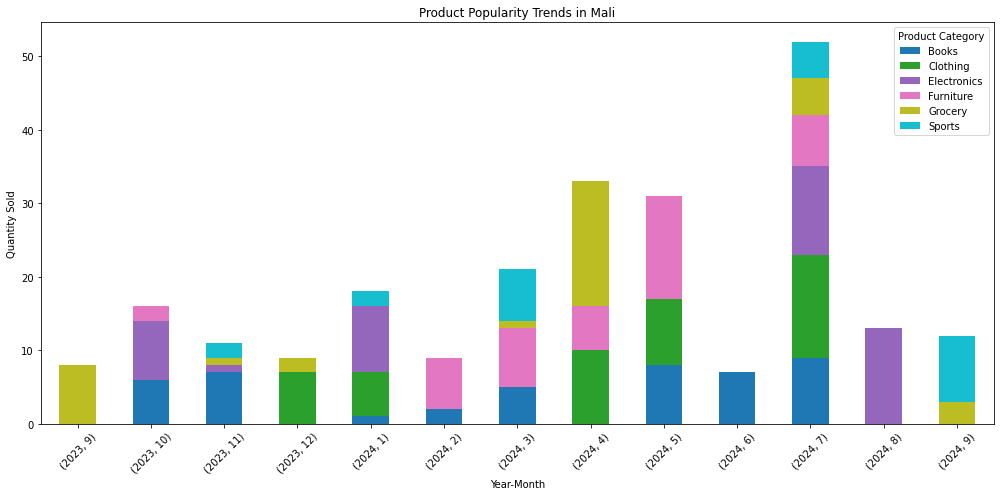

<Figure size 1008x504 with 0 Axes>

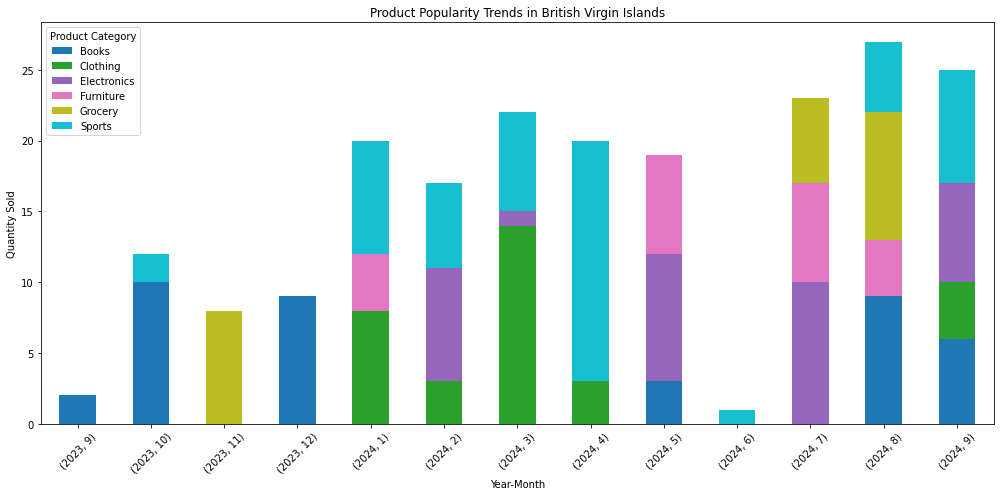

<Figure size 1008x504 with 0 Axes>

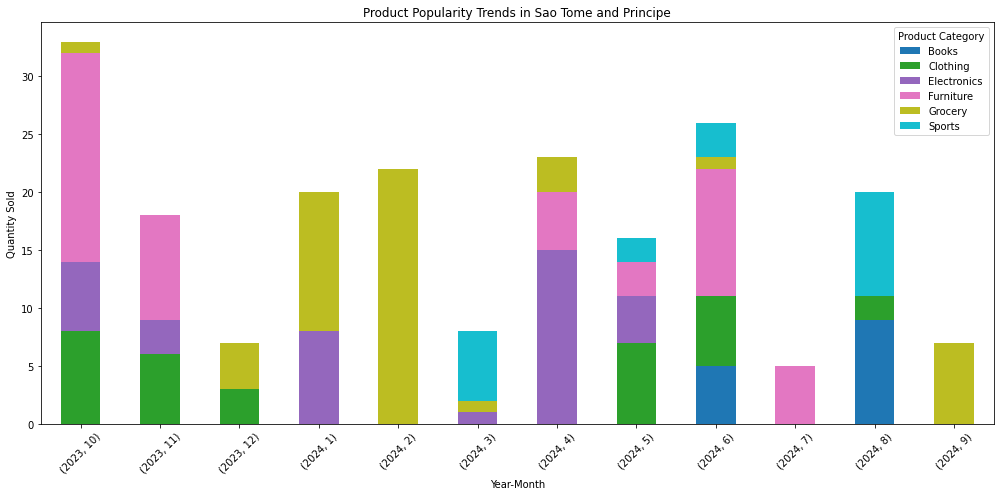

<Figure size 1008x504 with 0 Axes>

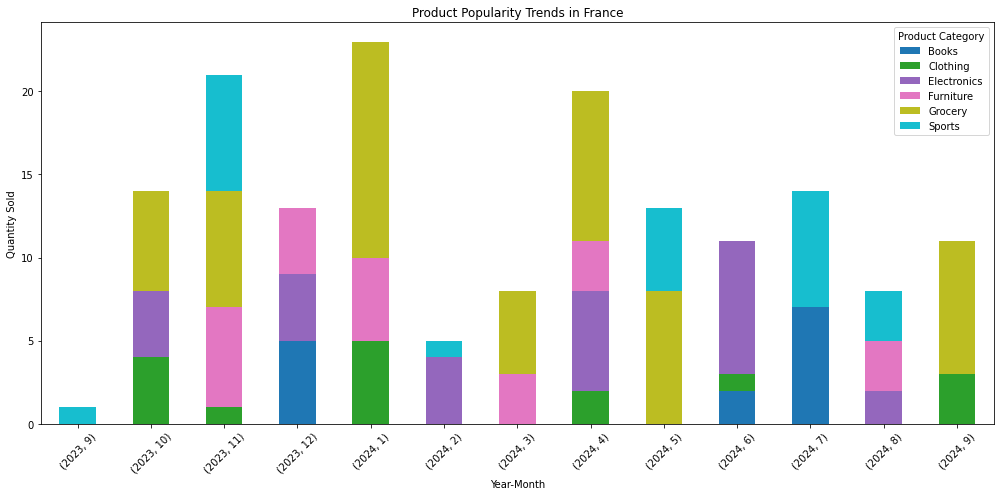

<Figure size 1008x504 with 0 Axes>

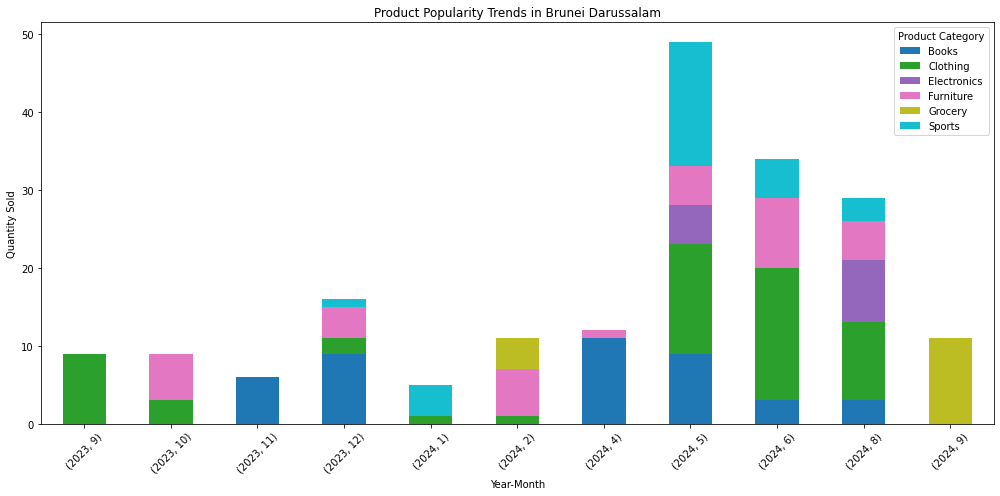

<Figure size 1008x504 with 0 Axes>

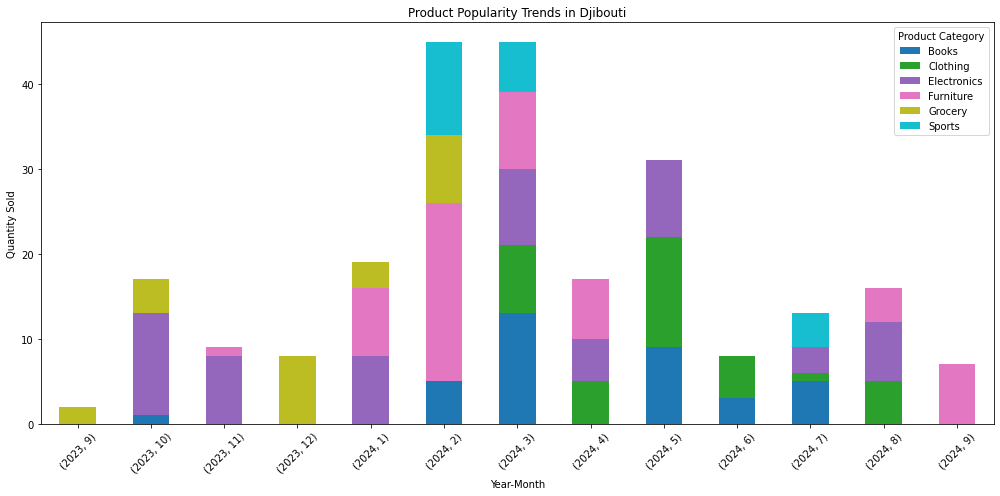

<Figure size 1008x504 with 0 Axes>

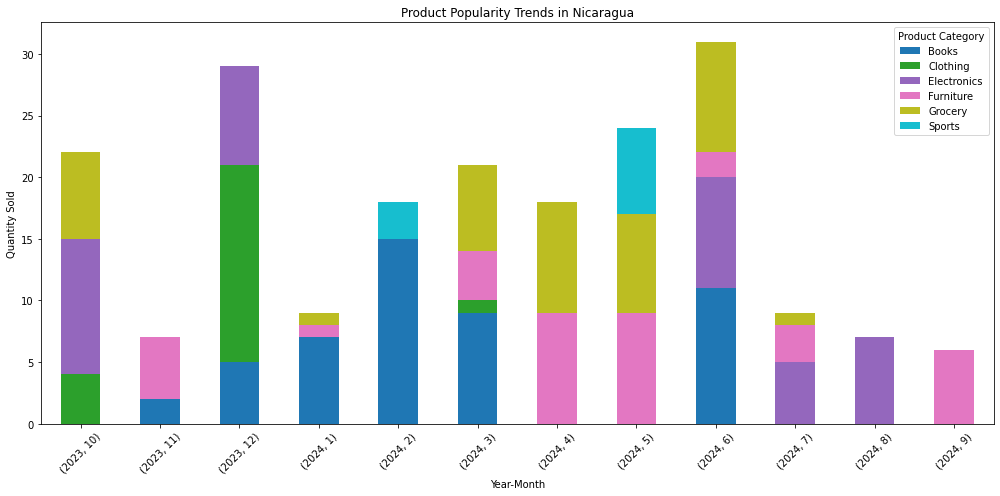

<Figure size 1008x504 with 0 Axes>

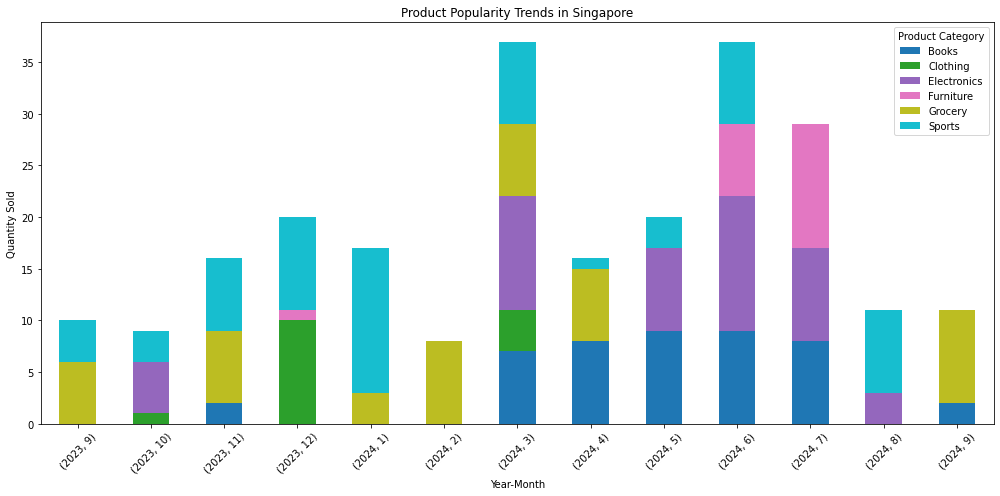

<Figure size 1008x504 with 0 Axes>

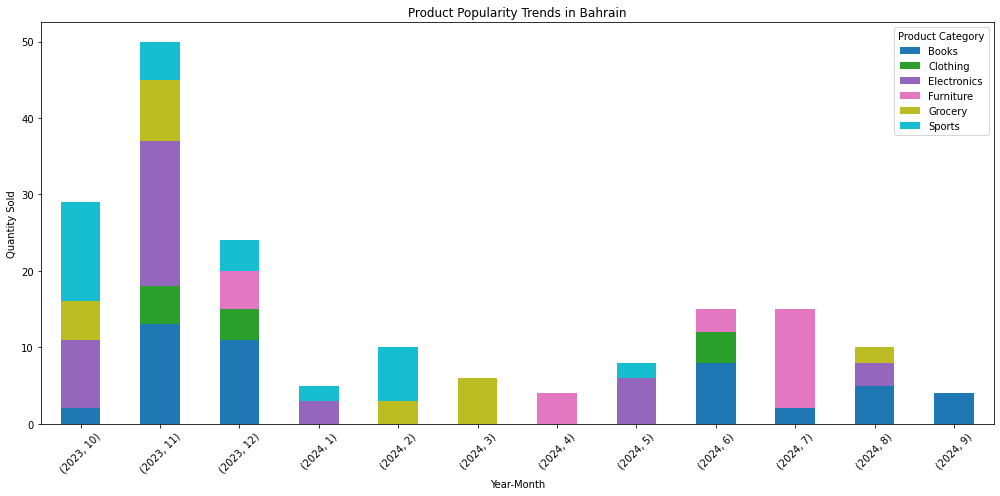

<Figure size 1008x504 with 0 Axes>

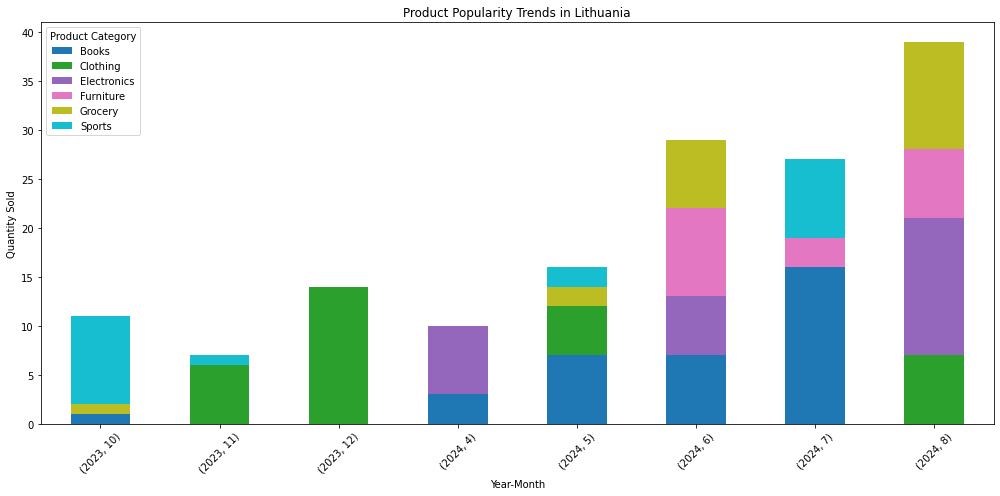

<Figure size 1008x504 with 0 Axes>

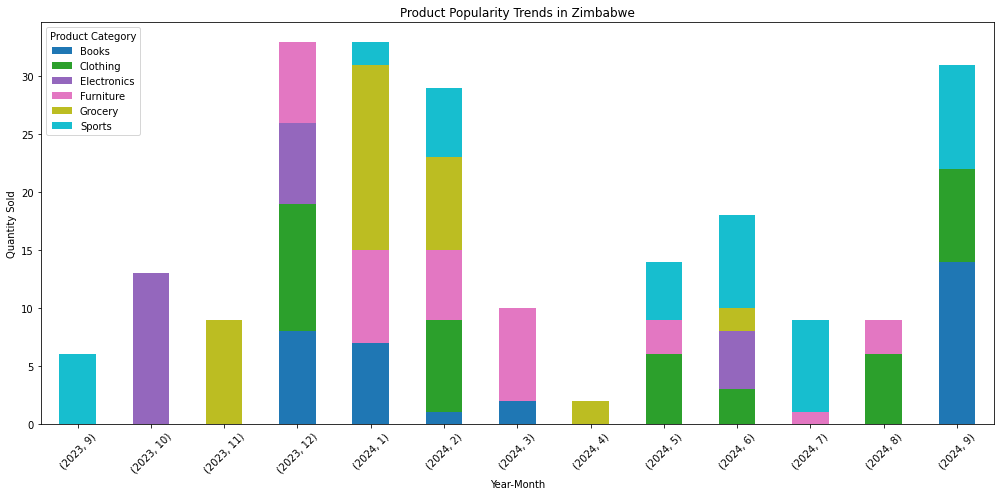

<Figure size 1008x504 with 0 Axes>

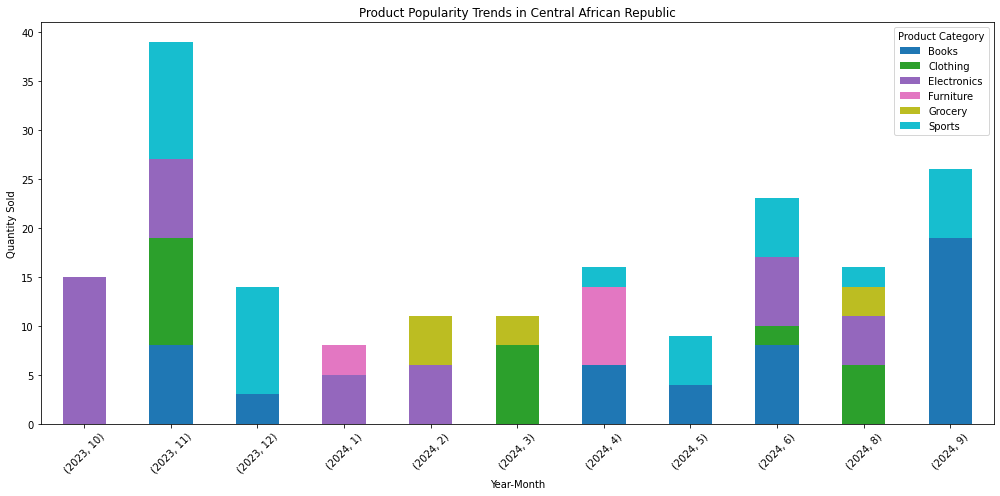

<Figure size 1008x504 with 0 Axes>

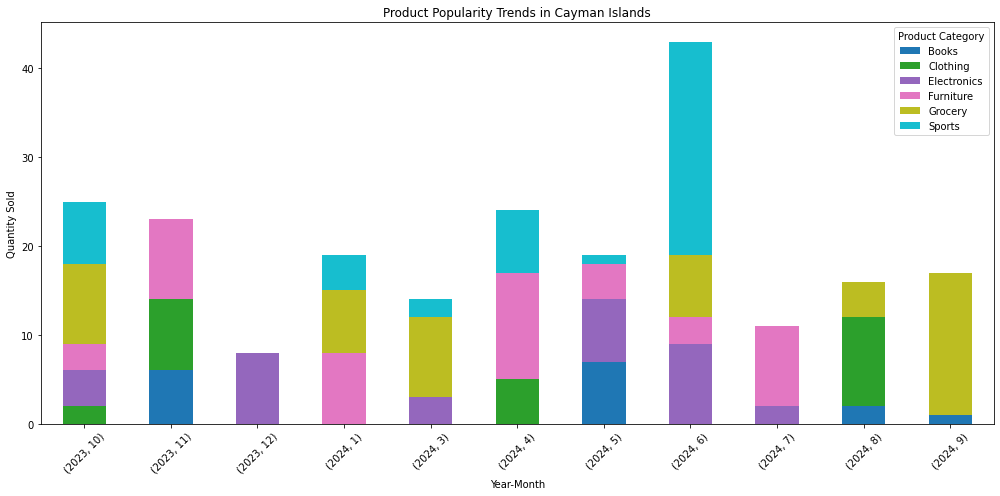

<Figure size 1008x504 with 0 Axes>

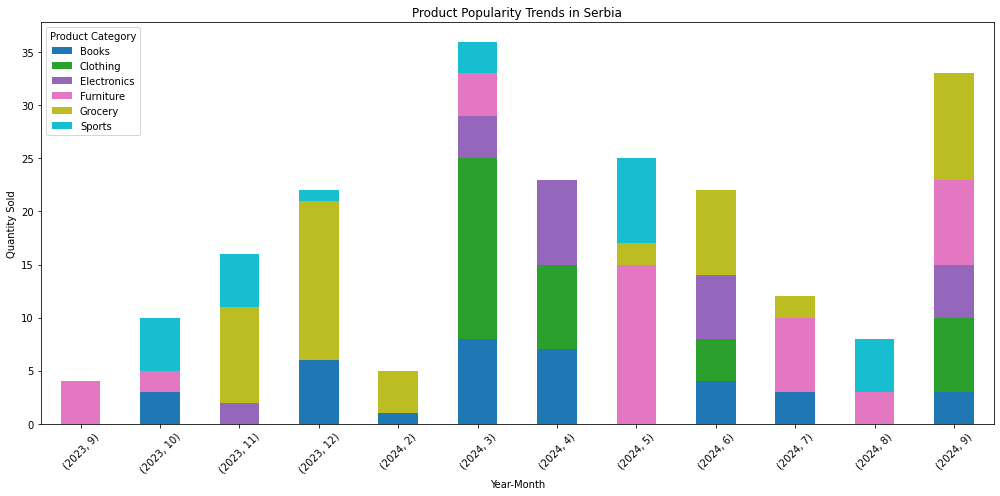

<Figure size 1008x504 with 0 Axes>

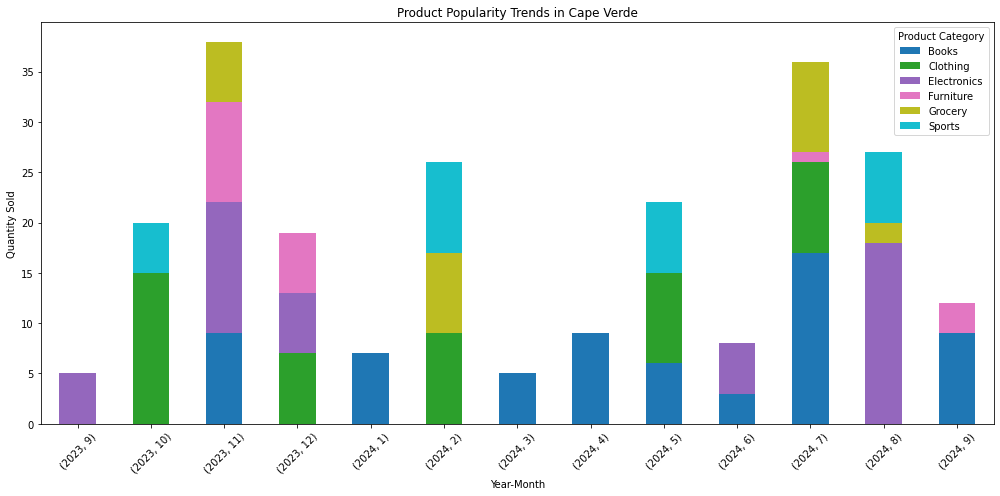

<Figure size 1008x504 with 0 Axes>

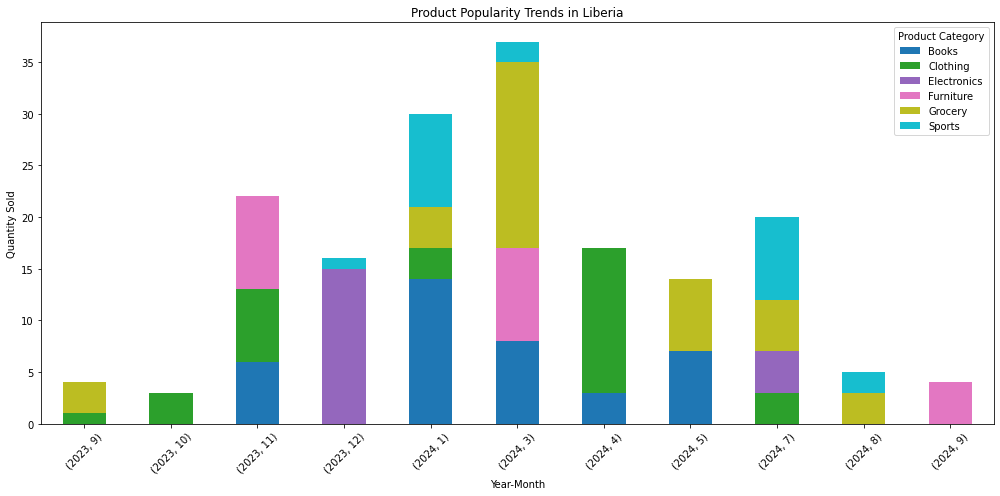

<Figure size 1008x504 with 0 Axes>

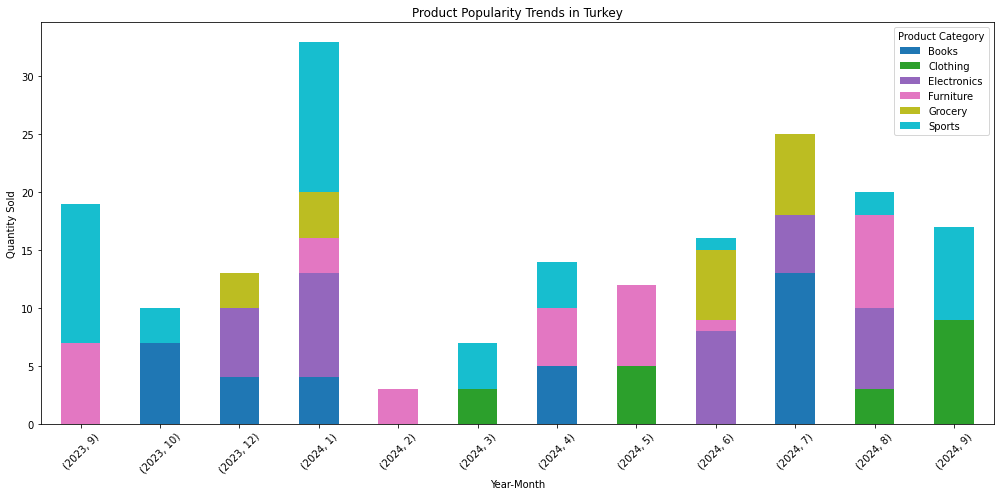

<Figure size 1008x504 with 0 Axes>

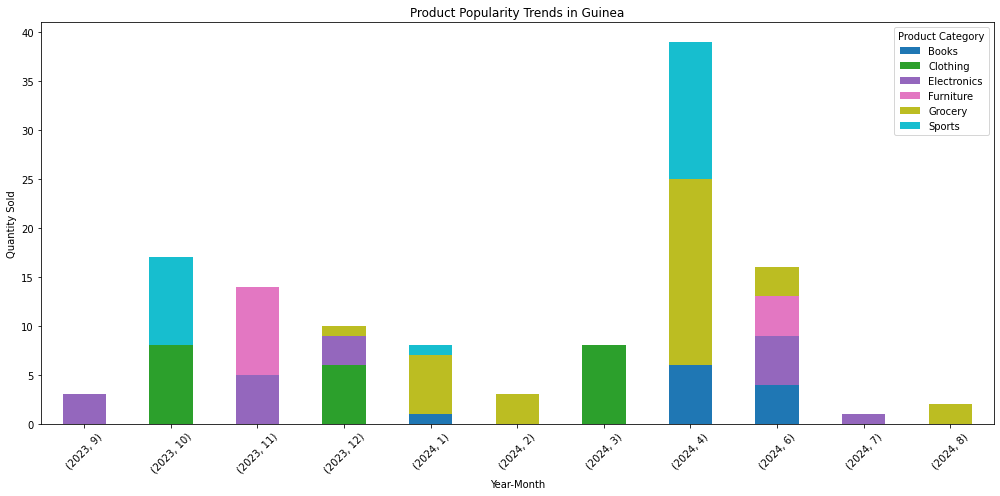

<Figure size 1008x504 with 0 Axes>

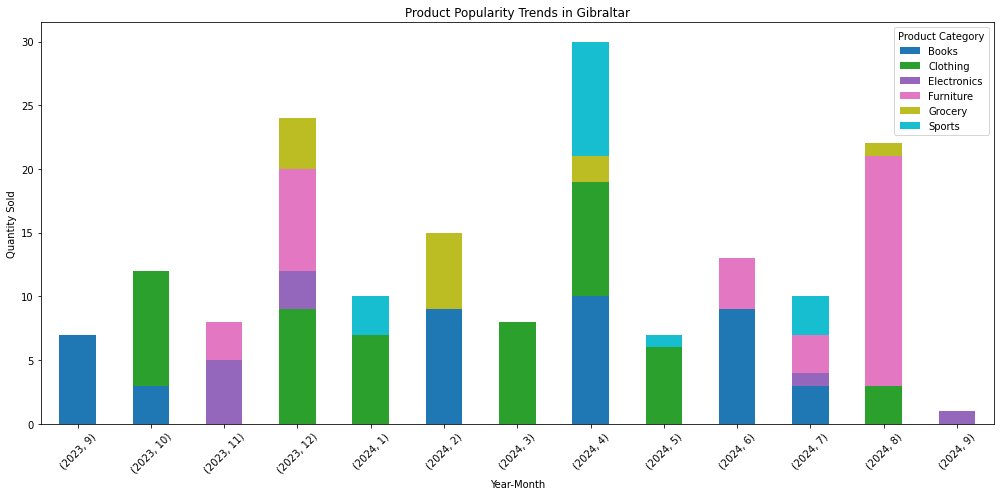

<Figure size 1008x504 with 0 Axes>

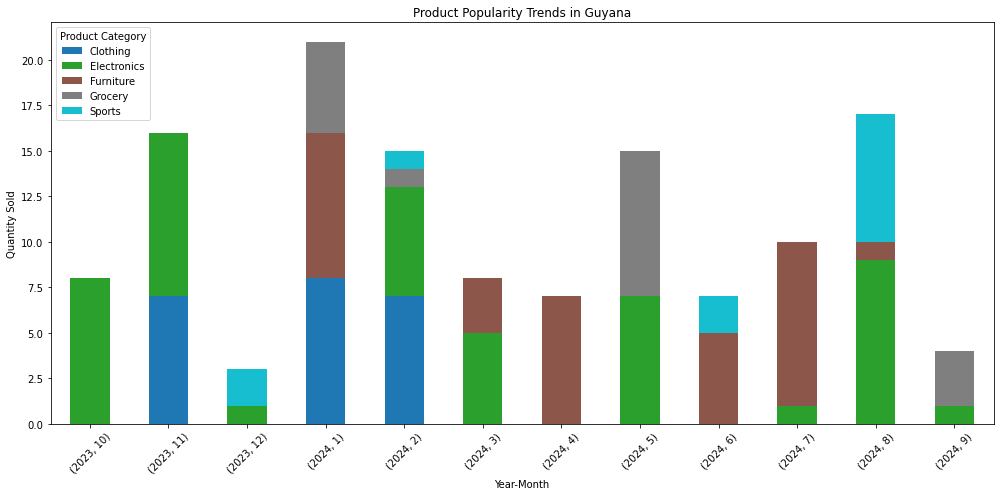

<Figure size 1008x504 with 0 Axes>

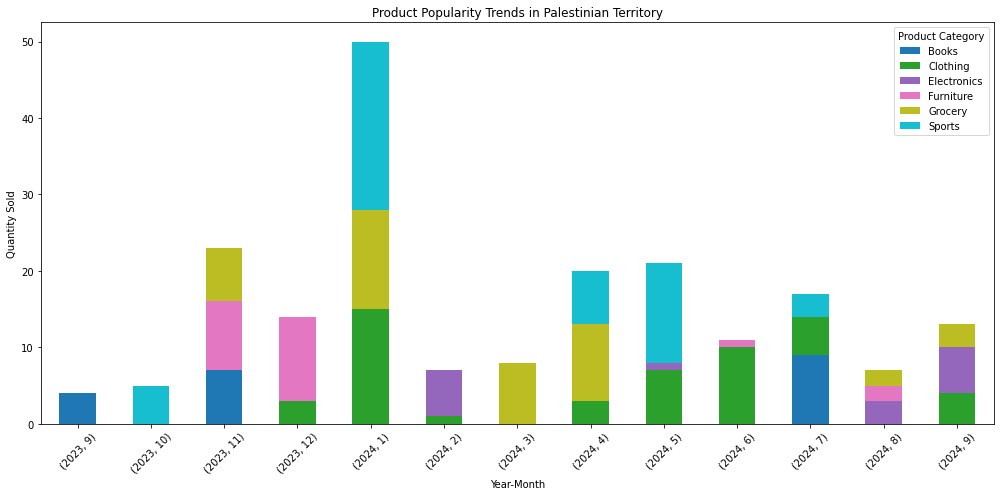

<Figure size 1008x504 with 0 Axes>

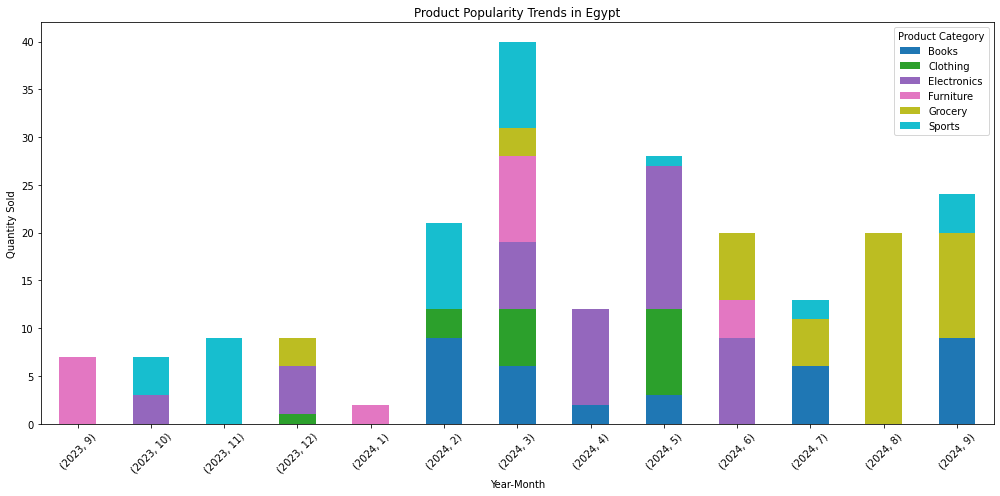

<Figure size 1008x504 with 0 Axes>

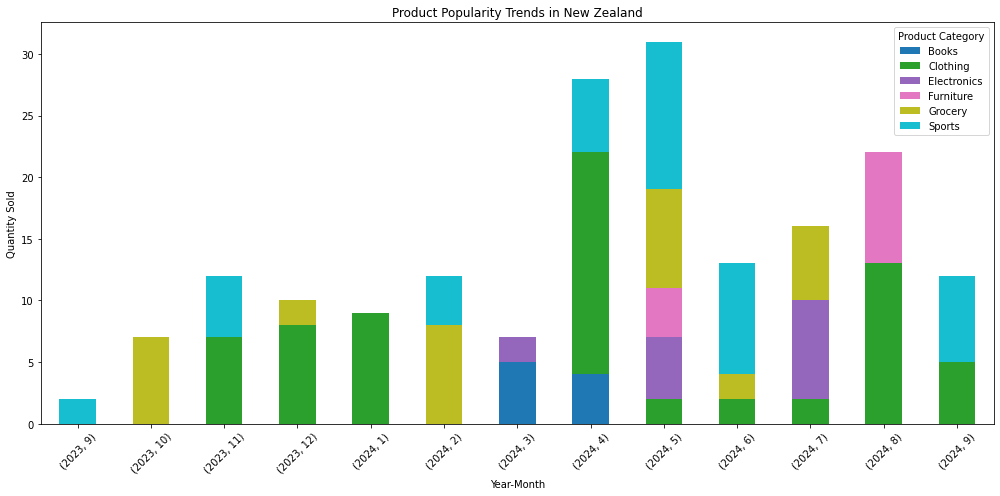

<Figure size 1008x504 with 0 Axes>

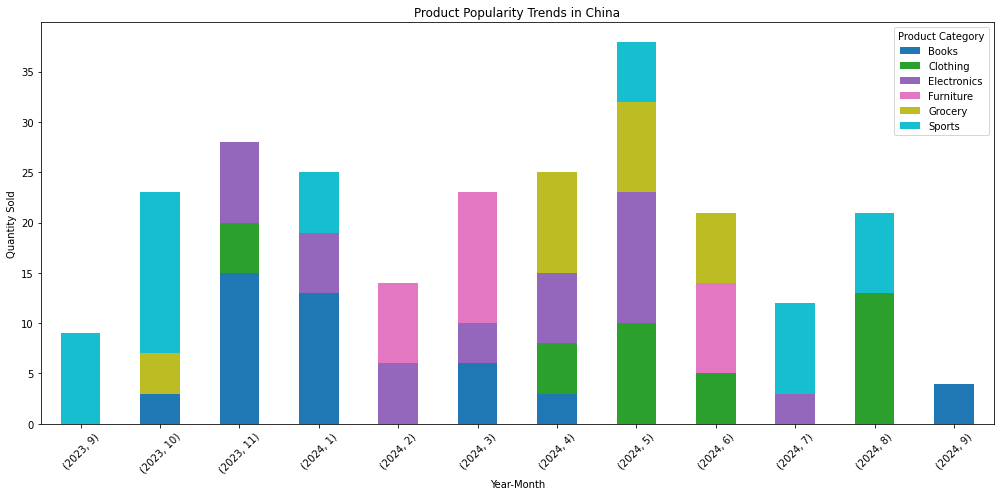

<Figure size 1008x504 with 0 Axes>

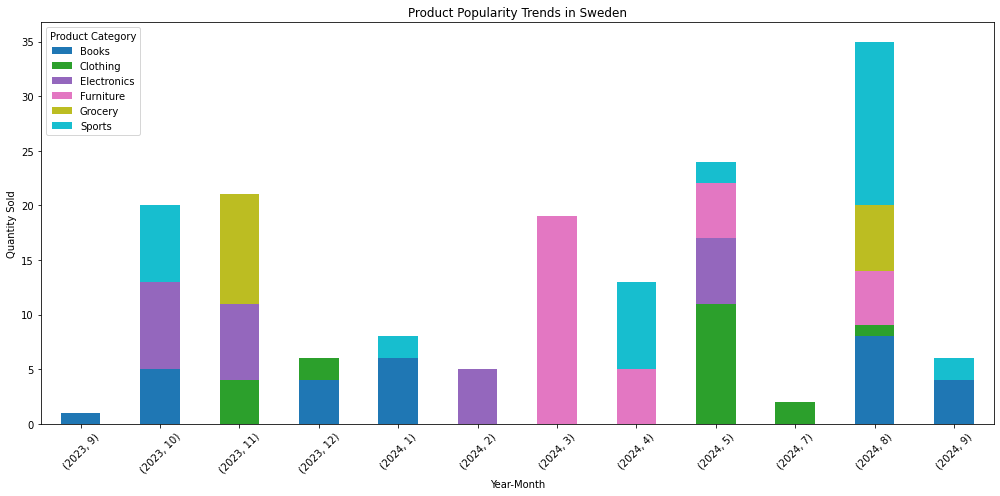

<Figure size 1008x504 with 0 Axes>

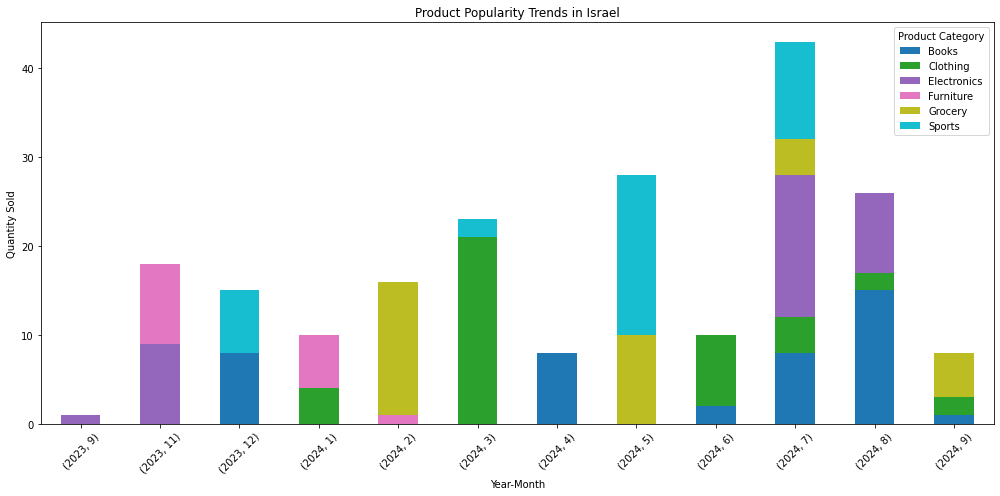

<Figure size 1008x504 with 0 Axes>

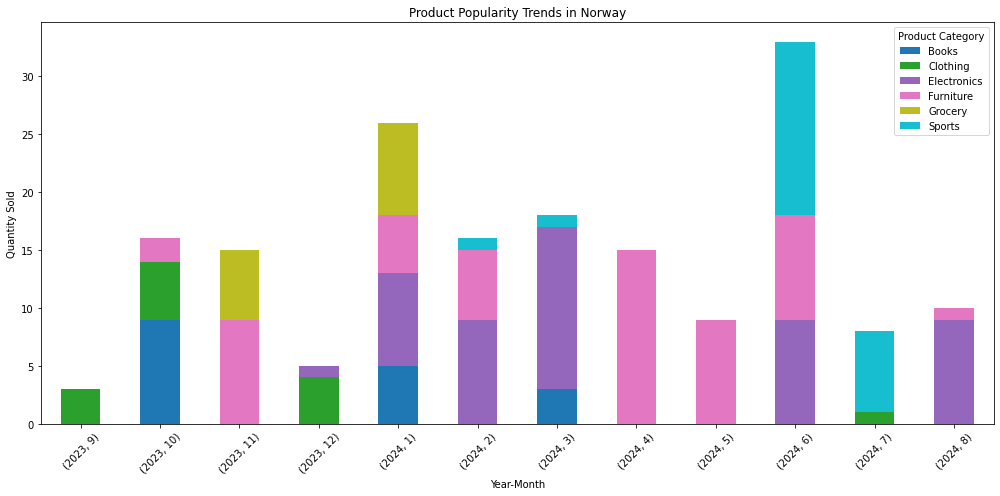

<Figure size 1008x504 with 0 Axes>

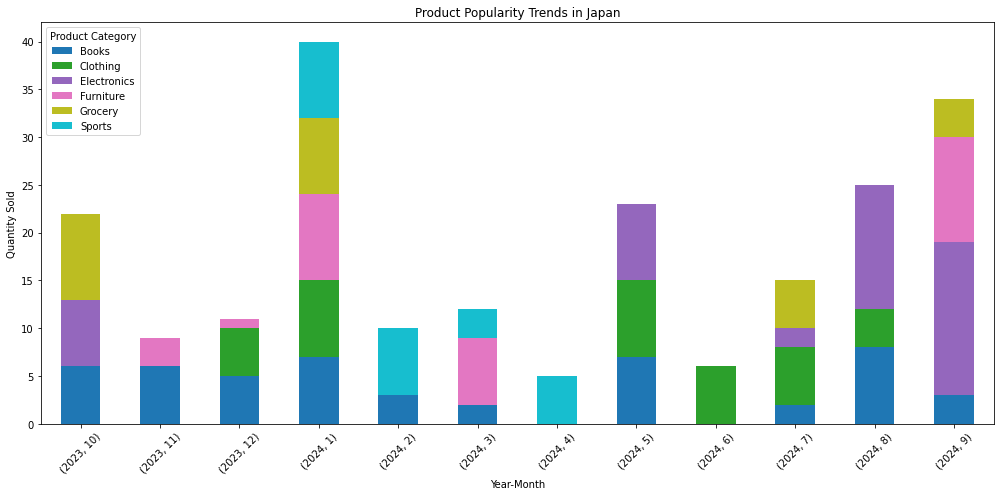

<Figure size 1008x504 with 0 Axes>

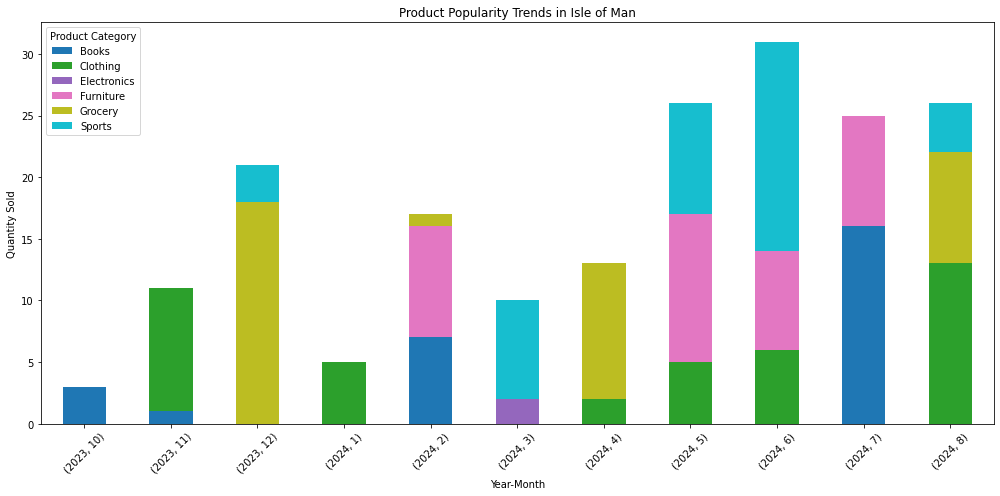

<Figure size 1008x504 with 0 Axes>

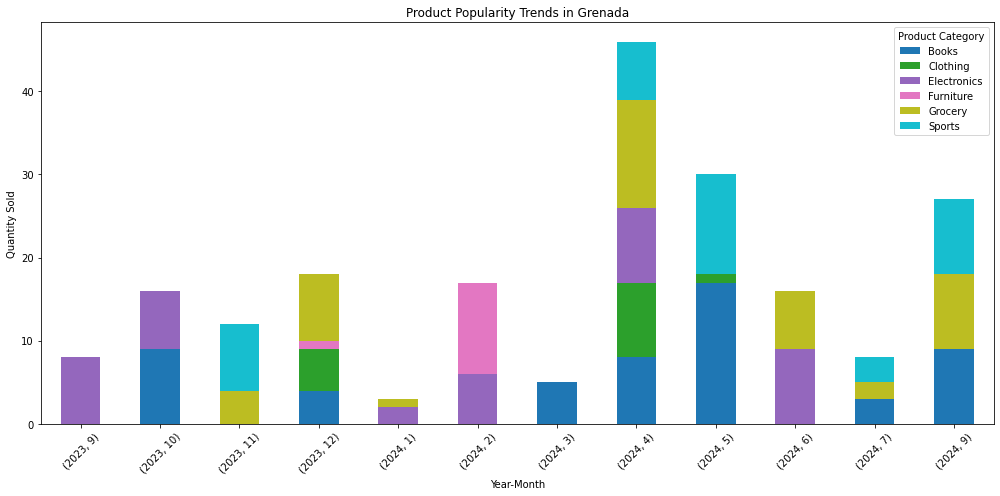

<Figure size 1008x504 with 0 Axes>

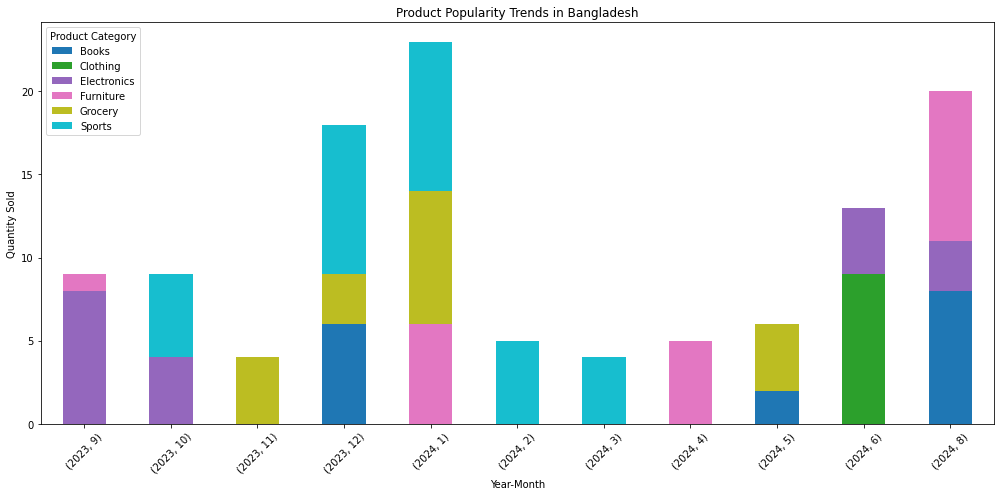

<Figure size 1008x504 with 0 Axes>

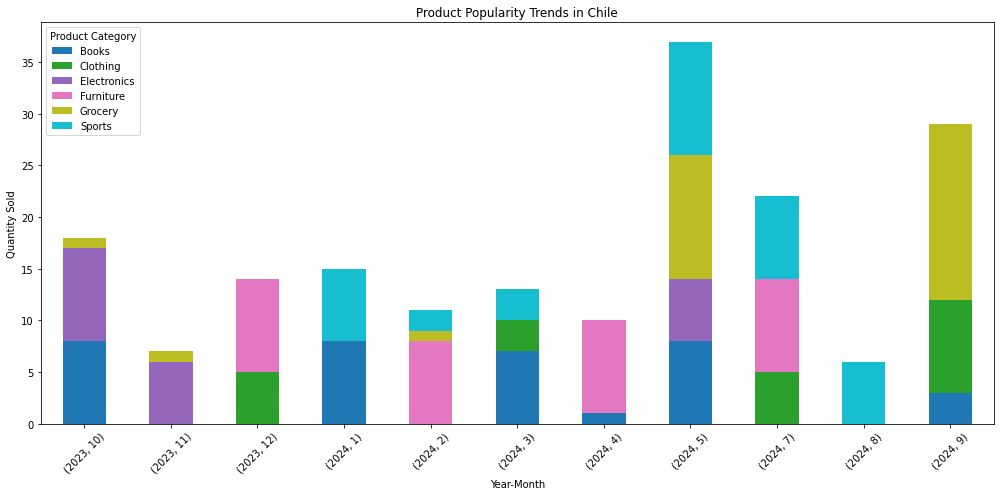

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
# Aggregate quantity by year, month, and country
monthly_sales = df.groupby(['country', 'year', 'month', 'product_category'])['qty'].sum().reset_index()
countries = df['country'].unique()
for country in countries:
    country_data = monthly_sales[monthly_sales['country'] == country]
    
    plt.figure(figsize=(14, 7))
    
    # Pivot data for stacked bar chart
    pivot_data = country_data.pivot_table(index=['year', 'month'], columns='product_category', values='qty', fill_value=0)
    
    # Plot stacked bar chart
    pivot_data.plot(kind='bar', stacked=True, colormap='tab10', figsize=(14, 7))
    
    plt.title(f'Product Popularity Trends in {country}')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.legend(title='Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# For simplicity, let's focus on a single country or specific product categories
# To analyze trends per country, you might want to filter data accordingly

# 3. Which locations see the highest traffic of sales?

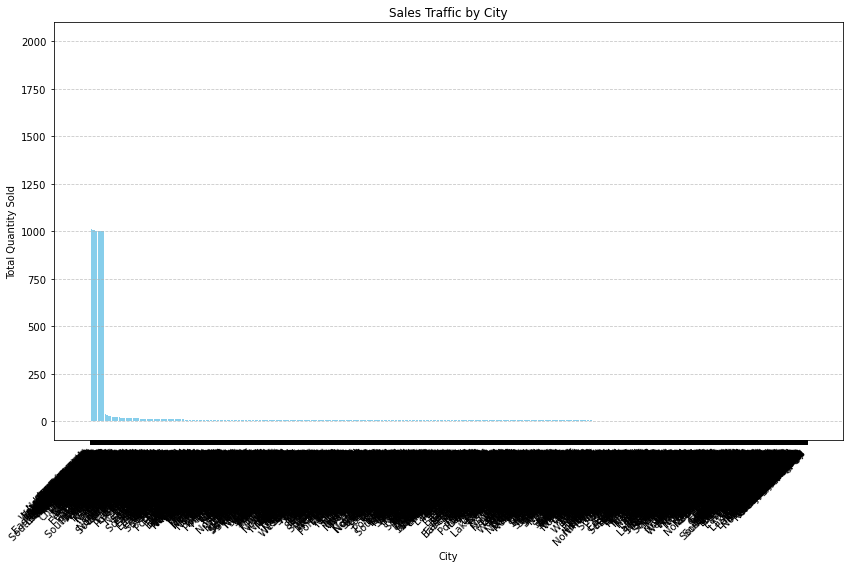

In [11]:
# Aggregate total quantity sold by city
city_sales = df.groupby('city')['qty'].sum().reset_index()

# Sort the cities by total quantity sold in descending order
city_sales_sorted = city_sales.sort_values(by='qty', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.bar(city_sales_sorted['city'], city_sales_sorted['qty'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Traffic by City')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4.What times have the highest traffic of sales? Per Country? 

In [ ]:
# Aggregate total quantity of sales by hour and country

In [12]:
# Extract hour and day of the week
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
hourly_sales = df.groupby(['country', 'hour'])['qty'].sum().reset_index()

# Find the hour with the highest sales for each country
peak_hourly_sales = hourly_sales.loc[hourly_sales.groupby('country')['qty'].idxmax()]

print("\nPeak hour of sales per country:")
print(peak_hourly_sales)


Peak hour of sales per country:
                country  hour  qty
3           Afghanistan     3   36
26              Albania     8   42
40              Algeria     1   33
61       American Samoa     4   48
75              Andorra     0   30
...                 ...   ...  ...
4645  Wallis and Futuna     5   20
4669     Western Sahara    21   29
4685              Yemen    17   20
4704             Zambia    14   19
4720           Zimbabwe     6   24

[244 rows x 3 columns]


In [ ]:
# Aggregate total quantity of sales by day of the week and country

In [ ]:
daily_sales = df.groupby(['country', 'day_of_week'])['qty'].sum().reset_index()

# Find the day with the highest sales for each country
peak_daily_sales = daily_sales.loc[daily_sales.groupby('country')['qty'].idxmax()]

print("\nPeak day of the week for sales per country:")
print(peak_daily_sales)

In [ ]:
# Visualize peak hourly sales
plt.figure(figsize=(12, 6))
for country in hourly_sales['country'].unique():
    country_data = peak_hourly_sales[peak_hourly_sales['country'] == country]
    plt.bar(country_data['hour'], country_data['qty'], label=country)

plt.title('Peak Hourly Sales by Country')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Visualize peak daily sales
plt.figure(figsize=(12, 6))
for country in daily_sales['country'].unique():
    country_data = peak_daily_sales[peak_daily_sales['country'] == country]
    plt.bar(country_data['day_of_week'], country_data['qty'], label=country)

plt.title('Peak Day of the Week Sales by Country')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()